""""       Problem Definition: Predicting MLB Team Wins for the 2015 Season
Objective:
Develop a predictive model that estimates the number of wins for Major League Baseball (MLB) teams in the 2015 season based 
on data from the 2014 season.

Dataset Description:
The dataset contains information from the 2014 MLB season, including various indicators of team performance. The dataset 
will be used to train and test a machine learning model to predict the numberof wins for each team in the 2015 season.

Features (Inputs):
The dataset includes 17 different features, which serve as indicators of team performance:

W (Wins): Number of games where a pitcher was pitching while their team took the lead and went on to win, provided the starter
pitched at least 5 innings of work.

R (Runs): Number of times a player crosses home plate, scored when a player advances around first, second, and third base 
and returns safely to home plate before three outs are recorded.

AB (At Bats): Number of plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or 
obstruction.

H (Hits): Number of times a batter safely reaches or passes first base after hitting the ball into fair territory without the
benefit of an error or a fielder's choice.

2B (Doubles): Number of hits on which the batter reaches second base safely without the contribution of a fielding error.

3B (Triples): Number of hits on which the batter reaches third base safely without the contribution of a fielding error.

HR (Home Runs): Number of hits on which the batter successfully touched all four bases without the contribution of a fielding
error.

BB (Walks): Number of times a batter receives four pitches called balls by the umpire and is awarded first base without the
possibility of being called out.

SO (Strikeouts): Number of batters who received strike three.

SB (Stolen Bases): Number of bases advanced by the runner while the ball is in the possession of the defense.

RA (Run Average): Measures the rate at which runs are allowed or scored.

ER (Earned Runs): Number of runs that did not occur as a result of errors or passed balls.

ERA (Earned Run Average): Average number of earned runs allowed by a pitcher per nine innings pitched, calculated as total
earned runs multiplied by 9, divided by innings pitched.

CG (Complete Games): Number of games where the pitcher pitched the entire game without the benefit of
Output (Target):

Number of Wins in 2015 (W): The number of games won by the team in the 2015 season.
Machine Learning Task:



Type of Problem: Regression
Goal: Predict the number of wins (W) based on the 16 features from the 2014 season.
Steps to Develop the Predictive Model:

Data Collection: Gather and preprocess the dataset from the 2014 MLB season.

Exploratory Data Analysis (EDA): Understand the data distribution, identify missing values, and determine the relationships 
between features and the target variable.

Feature Engineering: Create new features if necessary, and select the most relevant features for prediction.
Model Selection: Choose appropriate regression algorithms (e.g., Linear Regression, Random Forest, Gradient Boosting).
Model Training: Train the models using the training dataset.

Model Evaluation: Evaluate the models using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and 
R-squared. Model Tuning: Optimize model parameters to improve performance.

Prediction: Use the best-performing model to predict the number of wins for the 2015 season.

Validation: Validate the model using a test set or cross-validation techniques.


Expected Outcome:
The developed model will accurately predict the number of wins for MLB teams in the 2015 season, providing insights 
into which features most significantly impact team success. This model could potentially be used by analysts and team
managers to make informed decisions based on team performance indicators.     """""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import csv dataset from the url
url="https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv"
df=pd.read_csv(url,header=0,names=['WinsPitcher','Runscored','AtBat','BaseHit','2Base','3Base','HomeRuns','Baseonballs','StrikeOut','StolenBase','RunAverage','EarnedRun','EarnedRunAverage','CompleteGame','ShutOut','Save','Errors'])
df

WinsPitcher  Runscored  AtBat  BaseHit  2Base  3Base  HomeRuns  \
0            95        724   5575     1497    300     42       139   
1            83        696   5467     1349    277     44       156   
2            81        669   5439     1395    303     29       141   
3            76        622   5533     1381    260     27       136   
4            74        689   5605     1515    289     49       151   
5            93        891   5509     1480    308     17       232   
6            87        764   5567     1397    272     19       212   
7            81        713   5485     1370    246     20       217   
8            80        644   5485     1383    278     32       167   
9            78        748   5640     1495    294     33       161   
10           88        751   5511     1419    279     32       172   
11           86        729   5459     1363    278     26       230   
12           85        661   5417     1331    243     21       176   
13           76        656   5544     1379    262     22       198   
14           68        694   5600     1405    277     46       146   
15          100        647   5484     1386    288     39       137   
16           98        697   5631     1462    292     27       140   
17           97        689   5491     1341    272     30       171   
18           68        655   5480     1378    274     34       145   
19           64        640   5571     1382    257     27       167   
20           90        683   5527     1351    295     17       177   
21           83        703   5428     1363    265     13       177   
22           71        613   5463     1420    236     40       120   
23           67        573   5420     1361    251     18       100   
24           63        626   5529     1374    272     37       130   
25           92        667   5385     1346    263     26       187   
26           84        696   5565     1486    288     39       136   
27           79        720   5649     1494    289     48       154   
28           74        650   5457     1324    260     36       148   
29           68        737   5572     1479    274     49       186   

    Baseonballs  StrikeOut  StolenBase  RunAverage  EarnedRun  \
0           383        973         104         641        601   
1           439       1264          70         700        653   
2           533       1157          86         640        584   
3           404       1231          68         701        643   
4           455       1259          83         803        746   
5           570       1151          88         670        609   
6           554       1227          63         698        652   
7           418       1331          44         693        646   
8           436       1310          87         642        604   
9           478       1148          71         753        694   
10          503       1233         101         733        680   
11          486       1392         121         618        572   
12          435       1150          52         675        630   
13          478       1336          69         726        677   
14          475       1119          78         729        664   
15          506       1267          69         525        478   
16          461       1322          98         596        532   
17          567       1518          95         608        546   
18          412       1299          84         737        682   
19          496       1255         134         754        700   
20          488       1290          51         613        557   
21          539       1344          57         635        577   
22          375       1150         112         678        638   
23          471       1107          69         760        698   
24          387       1274          88         809        749   
25          563       1258          59         595        553   
26          457       1159          93         627        597   
27          4

# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(30, 17)

The table contains 30 rows and 17 columns

In [6]:
df.columns.tolist()

['WinsPitcher',
 'Runscored',
 'AtBat',
 'BaseHit',
 '2Base',
 '3Base',
 'HomeRuns',
 'Baseonballs',
 'StrikeOut',
 'StolenBase',
 'RunAverage',
 'EarnedRun',
 'EarnedRunAverage',
 'CompleteGame',
 'ShutOut',
 'Save',
 'Errors']

In [7]:
df.dtypes

WinsPitcher           int64
Runscored             int64
AtBat                 int64
BaseHit               int64
2Base                 int64
3Base                 int64
HomeRuns              int64
Baseonballs           int64
StrikeOut             int64
StolenBase            int64
RunAverage            int64
EarnedRun             int64
EarnedRunAverage    float64
CompleteGame          int64
ShutOut               int64
Save                  int64
Errors                int64
dtype: object

In [8]:
#Checking np.nan,None,NaN,others

df.isnull().sum()

WinsPitcher         0
Runscored           0
AtBat               0
BaseHit             0
2Base               0
3Base               0
HomeRuns            0
Baseonballs         0
StrikeOut           0
StolenBase          0
RunAverage          0
EarnedRun           0
EarnedRunAverage    0
CompleteGame        0
ShutOut             0
Save                0
Errors              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WinsPitcher       30 non-null     int64  
 1   Runscored         30 non-null     int64  
 2   AtBat             30 non-null     int64  
 3   BaseHit           30 non-null     int64  
 4   2Base             30 non-null     int64  
 5   3Base             30 non-null     int64  
 6   HomeRuns          30 non-null     int64  
 7   Baseonballs       30 non-null     int64  
 8   StrikeOut         30 non-null     int64  
 9   StolenBase        30 non-null     int64  
 10  RunAverage        30 non-null     int64  
 11  EarnedRun         30 non-null     int64  
 12  EarnedRunAverage  30 non-null     float64
 13  CompleteGame      30 non-null     int64  
 14  ShutOut           30 non-null     int64  
 15  Save              30 non-null     int64  
 16  Errors            30 non-null     int64  
dtyp

<Axes: >

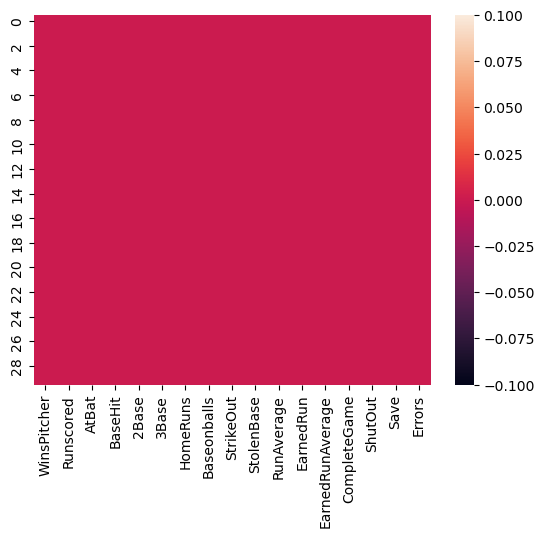

In [10]:
sns.heatmap(df.isnull())

In [11]:
# # Statistical summary of numerical columns of baseball  Dataset
df.describe()

WinsPitcher   Runscored        AtBat      BaseHit       2Base  \
count    30.000000   30.000000    30.000000    30.000000   30.000000   
mean     80.966667  688.233333  5516.266667  1403.533333  274.733333   
std      10.453455   58.761754    70.467372    57.140923   18.095405   
min      63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%      74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%      81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%      87.750000  718.250000  5570.000000  1451.500000  288.750000   
max     100.000000  891.000000  5649.000000  1515.000000  308.000000   

           3Base    HomeRuns  Baseonballs   StrikeOut  StolenBase  RunAverage  \
count  30.000000   30.000000    30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333   469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309    57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000   375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000   428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000   473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000   501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000   570.000000  1518.00000  134.000000  844.000000   

        EarnedRun  EarnedRunAverage  CompleteGame    ShutOut       Save  \
count   30.000000         30.000000     30.000000  30.000000  30.000000   
mean   635.833333          3.956333      3.466667  11.300000  43.066667   
std     70.140786          0.454089      2.763473   4.120177   7.869335   
min    478.000000          2.940000      0.000000   4.000000  28.000000   
25%    587.250000          3.682500      1.000000   9.000000  37.250000   
50%    644.500000          4.025000      3.000000  12.000000  42.000000   
75%    679.250000          4.220000      5.750000  13.000000  46.750000   
max    799.000000          5.040000     11.000000  21.000000  62.000000   

           Errors  
count   30.000000  
mean    94.333333  
std     13.958889  
min     75.000000  
25%     86.000000  
50%     91.000000  
75%     96.750000  
max    126.000000

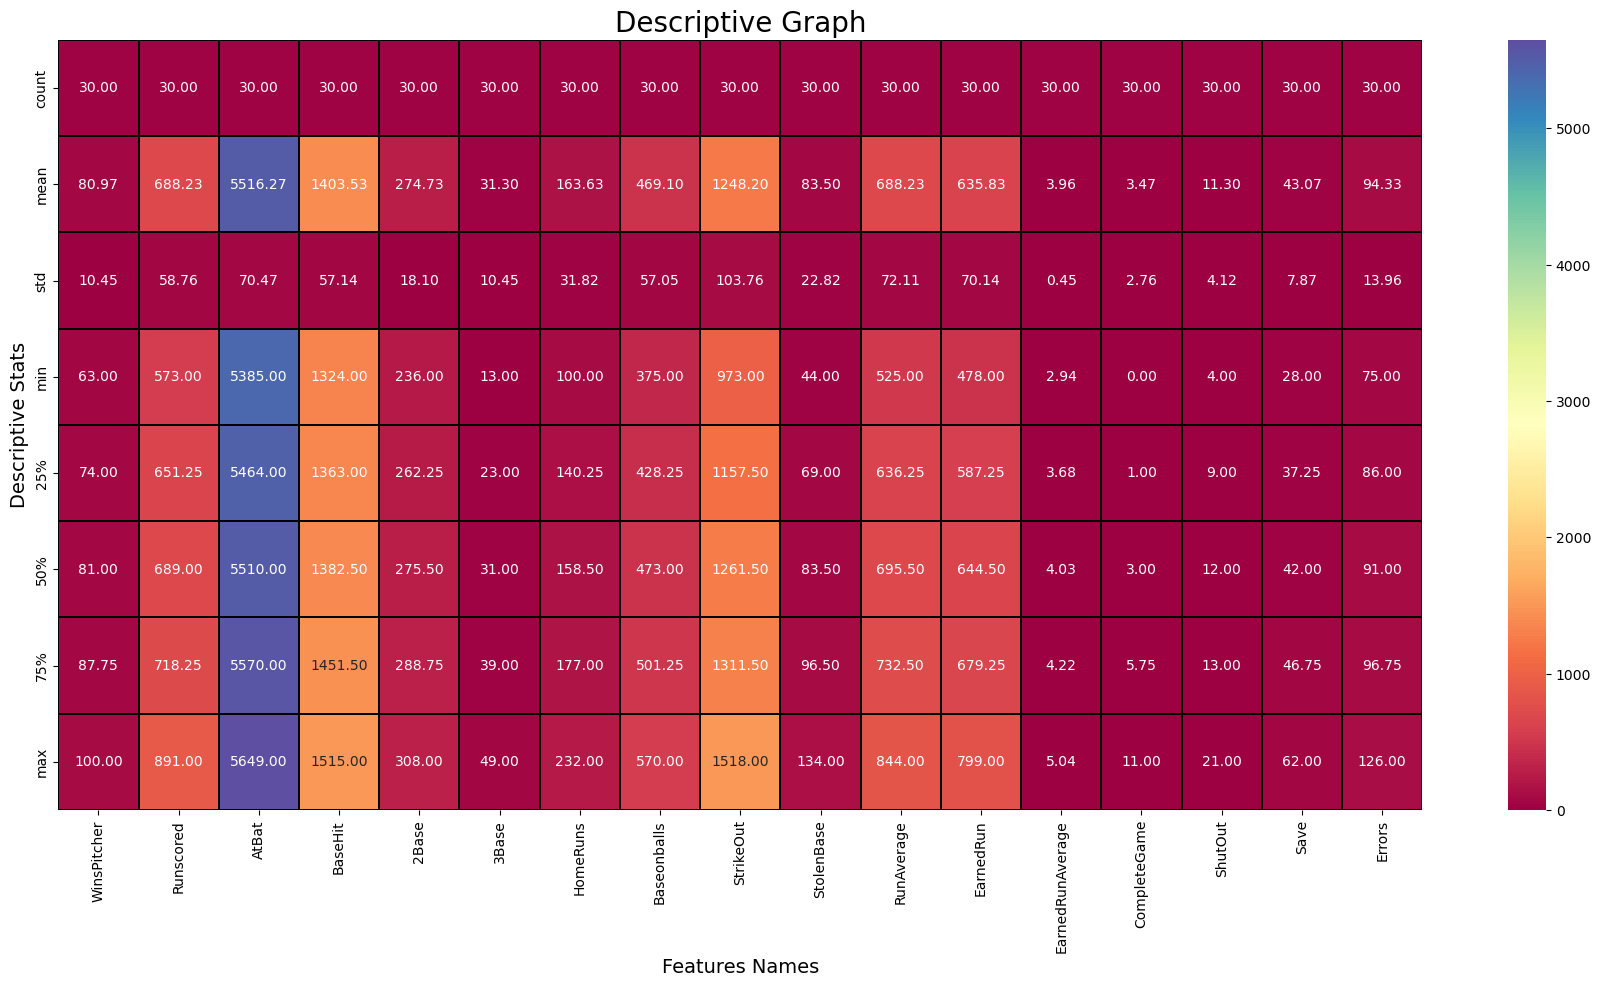

In [12]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Features Names",fontsize=14)
plt.ylabel("Descriptive Stats",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

From this above table we can analyse the descriptive statistics of all the feature and Target label. This shows data is uniformly distributed as there mean median value is approx similar without outliers

In [13]:
#checking the  unique value count for each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")
 

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: WinsPitcher, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: Runscored, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AtBat, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    

In [14]:
#checking number of unique values in x dataset
df.nunique().to_frame("No.of unique value")


No.of unique value
WinsPitcher                       24
Runscored                         28
AtBat                             29
BaseHit                           29
2Base                             22
3Base                             23
HomeRuns                          27
Baseonballs                       29
StrikeOut                         29
StolenBase                        27
RunAverage                        30
EarnedRun                         30
EarnedRunAverage                  30
CompleteGame                       9
ShutOut                           12
Save                              20
Errors                            21

# Data Visualization/ Feature Engineering
Univariate Analysis

<Axes: xlabel='WinsPitcher', ylabel='count'>

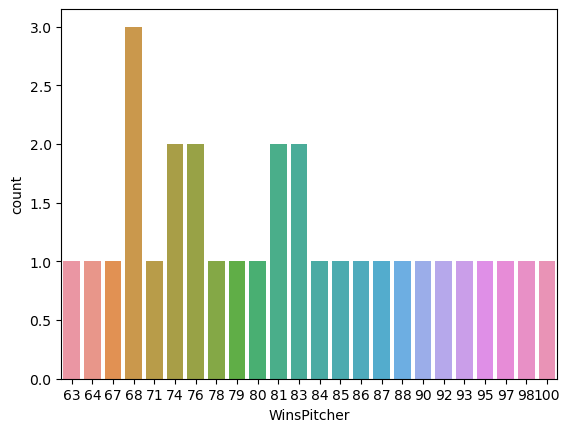

In [15]:
#Visualize the number of label target as 

sns.countplot(x="WinsPitcher",data=df)

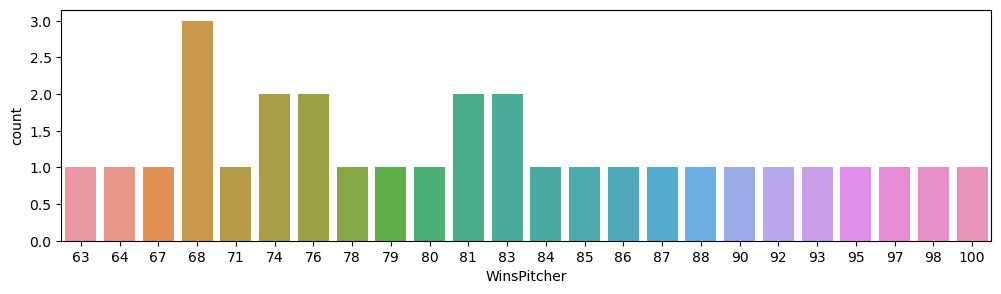

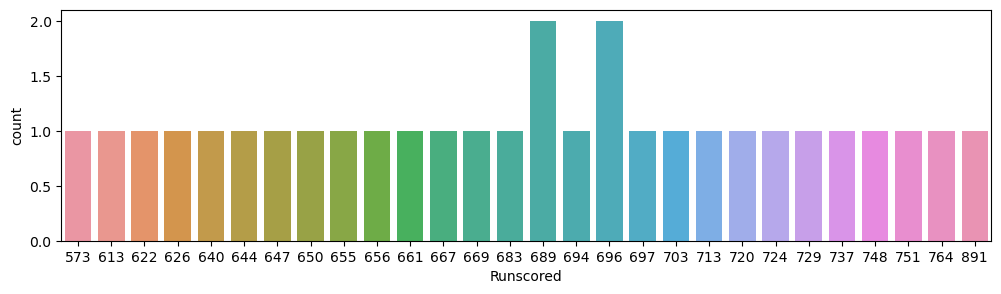

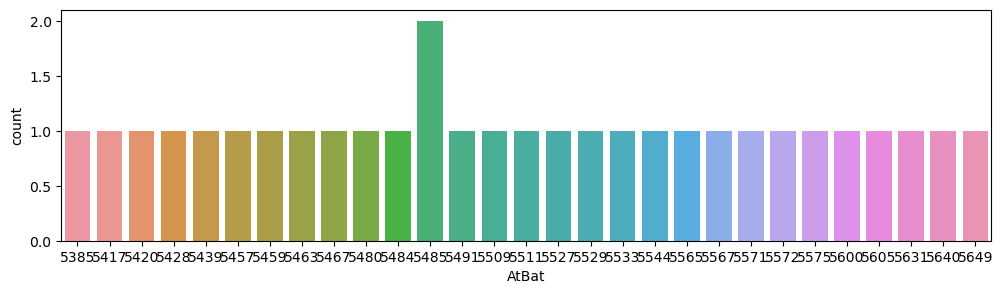

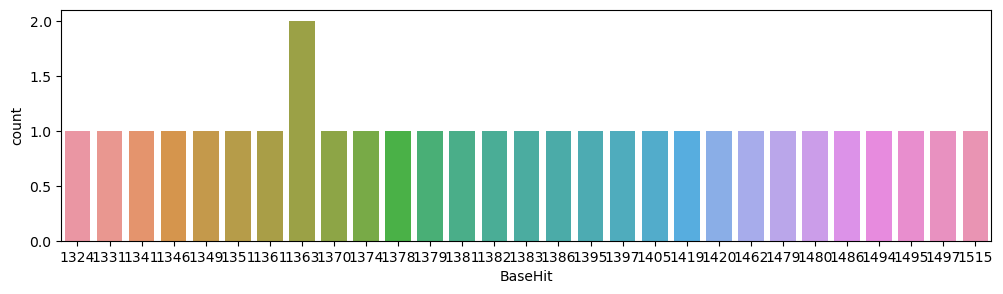

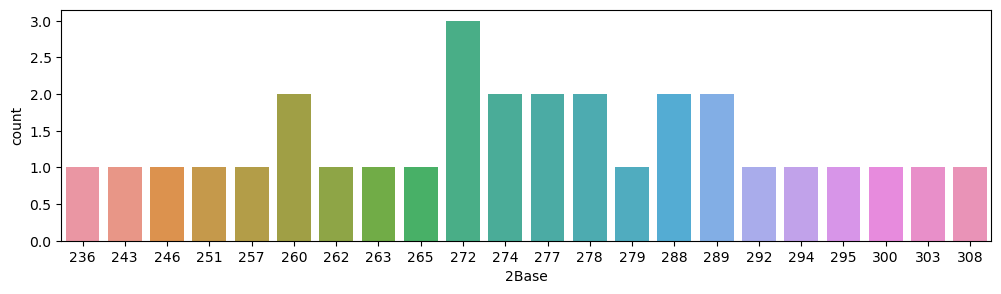

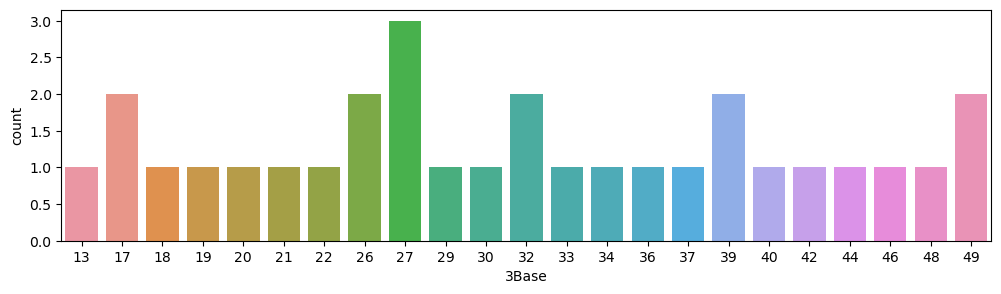

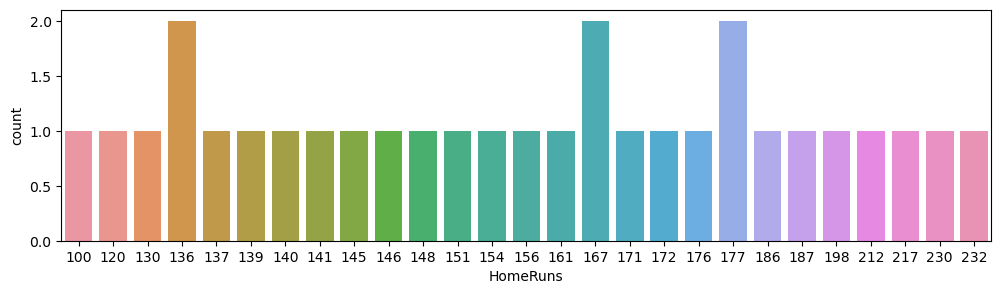

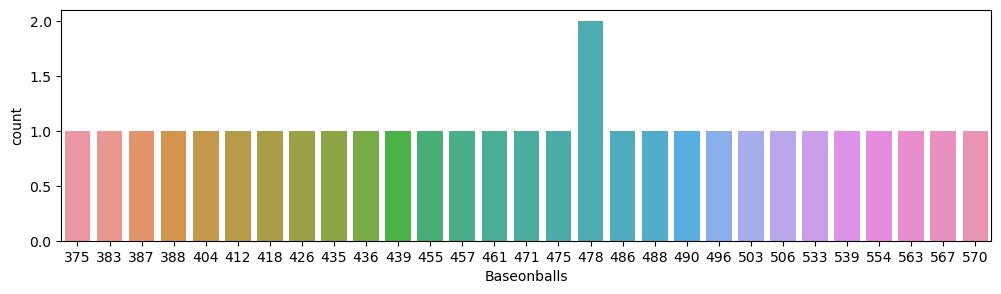

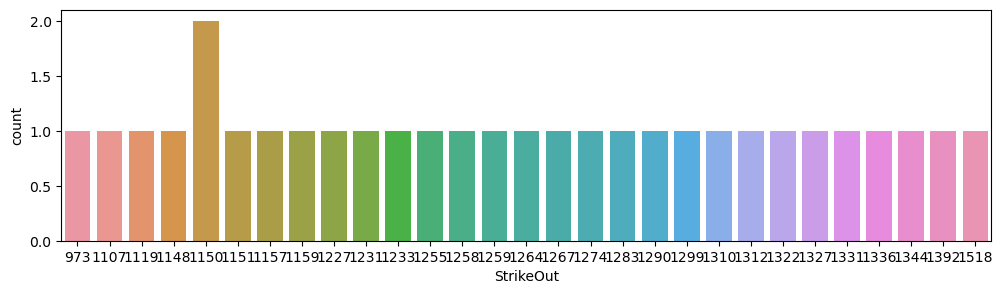

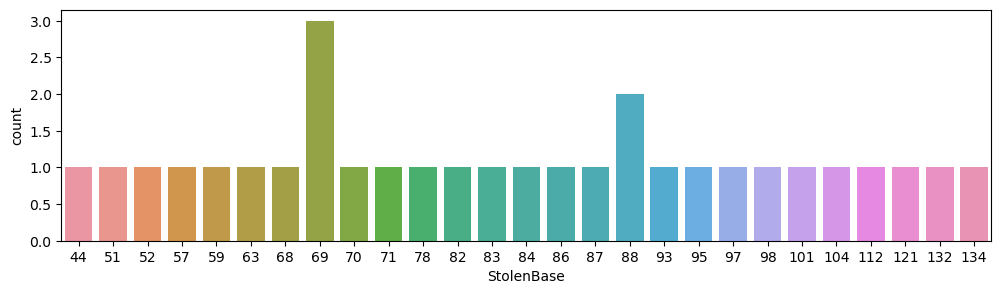

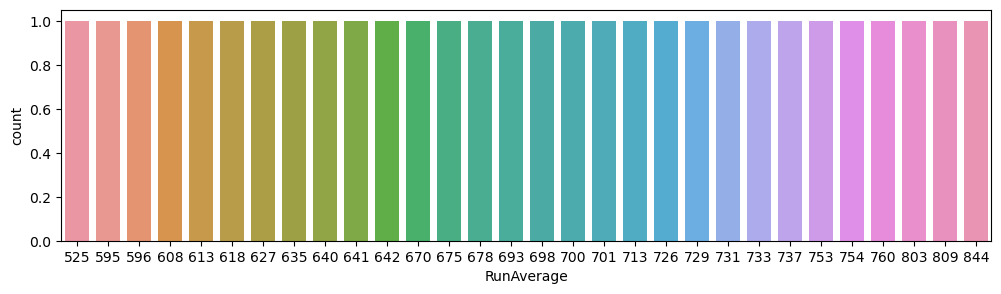

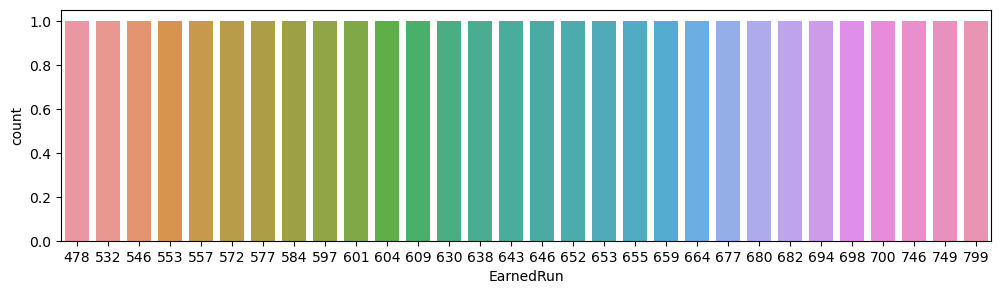

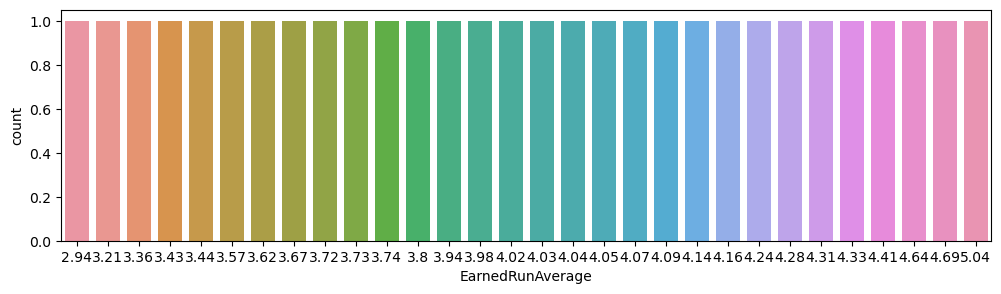

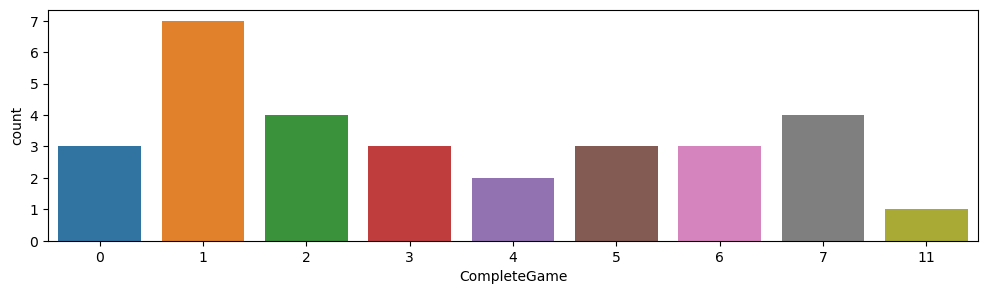

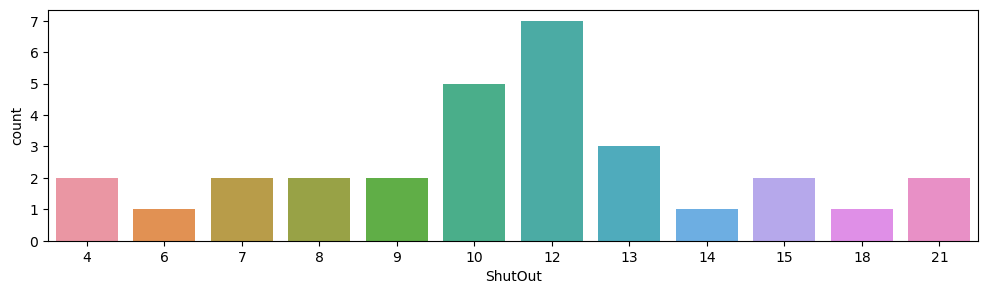

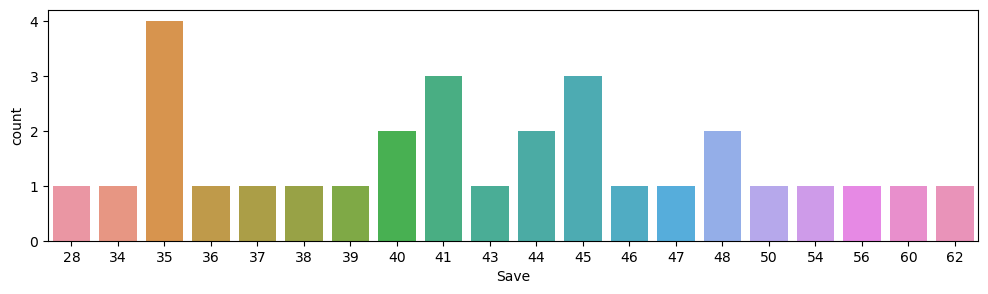

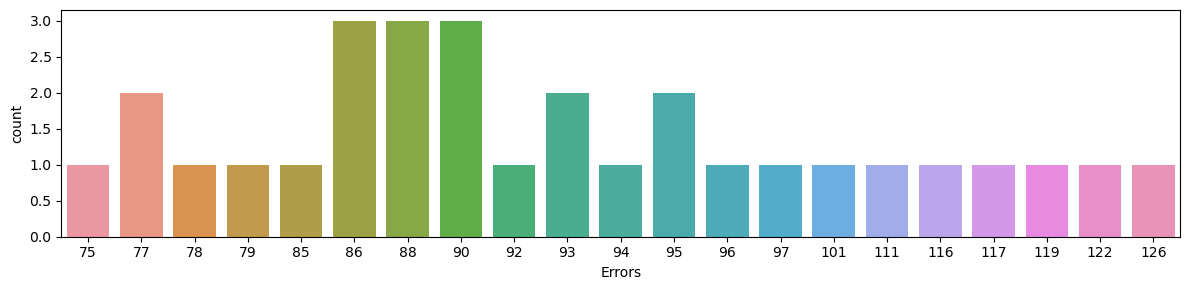

In [16]:
# Checking the count of each feature and target variable

for i in df:
    plt.figure(figsize=(12,3),facecolor="white")
    sns.countplot(x=i,data=df)
plt.tight_layout()
plt.show()

# Checking the distribution of the data by using distplot

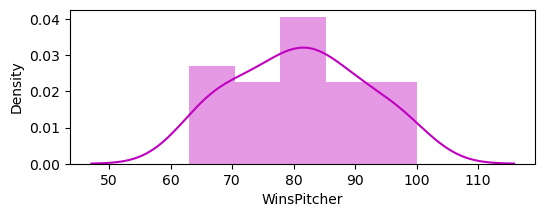

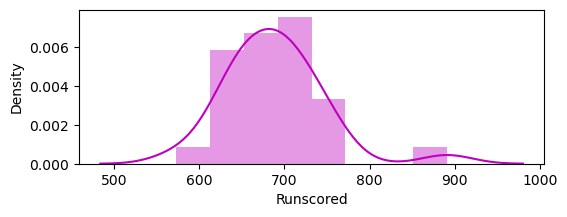

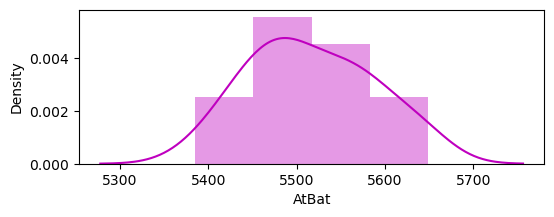

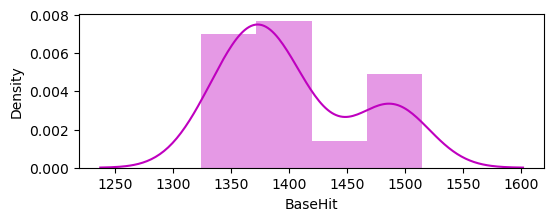

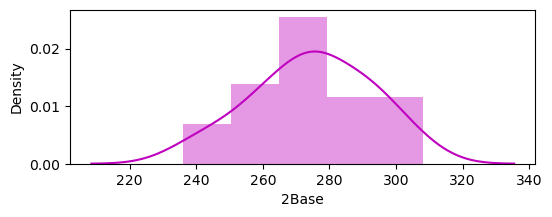

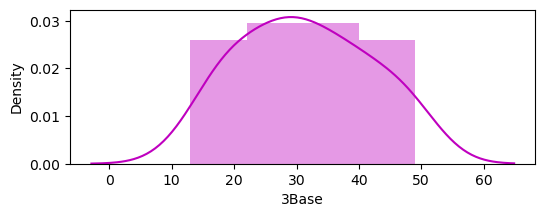

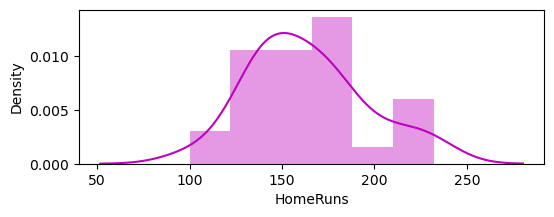

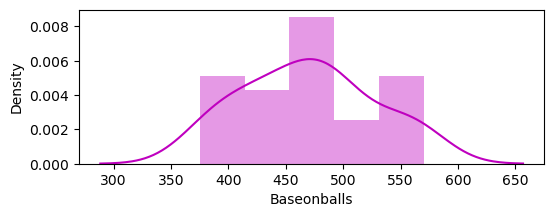

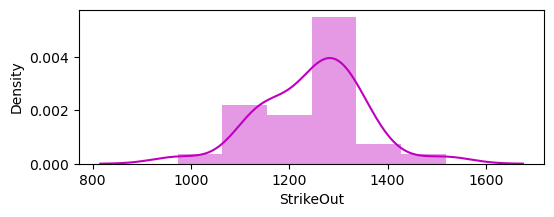

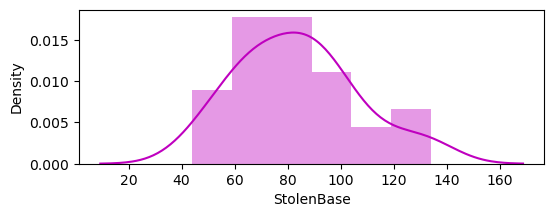

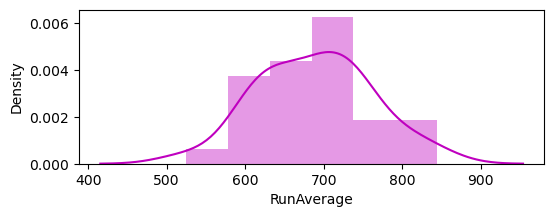

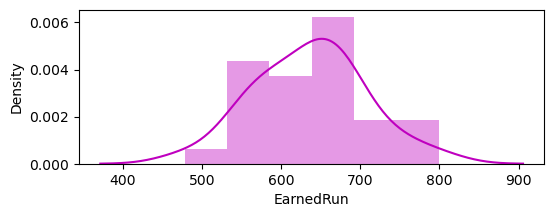

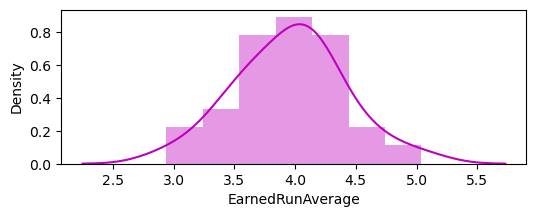

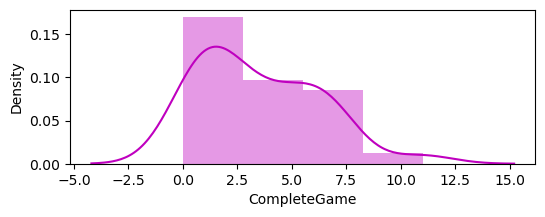

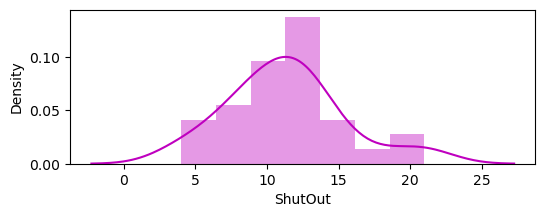

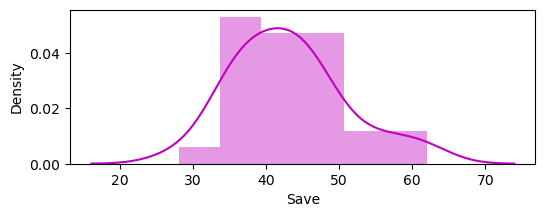

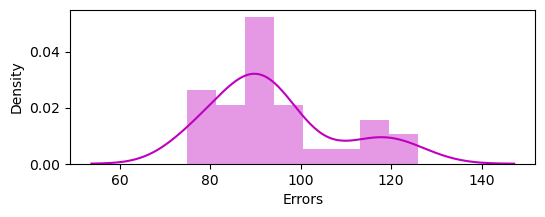

In [17]:
#Checking the distribution of the data of numerical column  by using distplot

for i in df.columns:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.distplot(df[i],color="m")

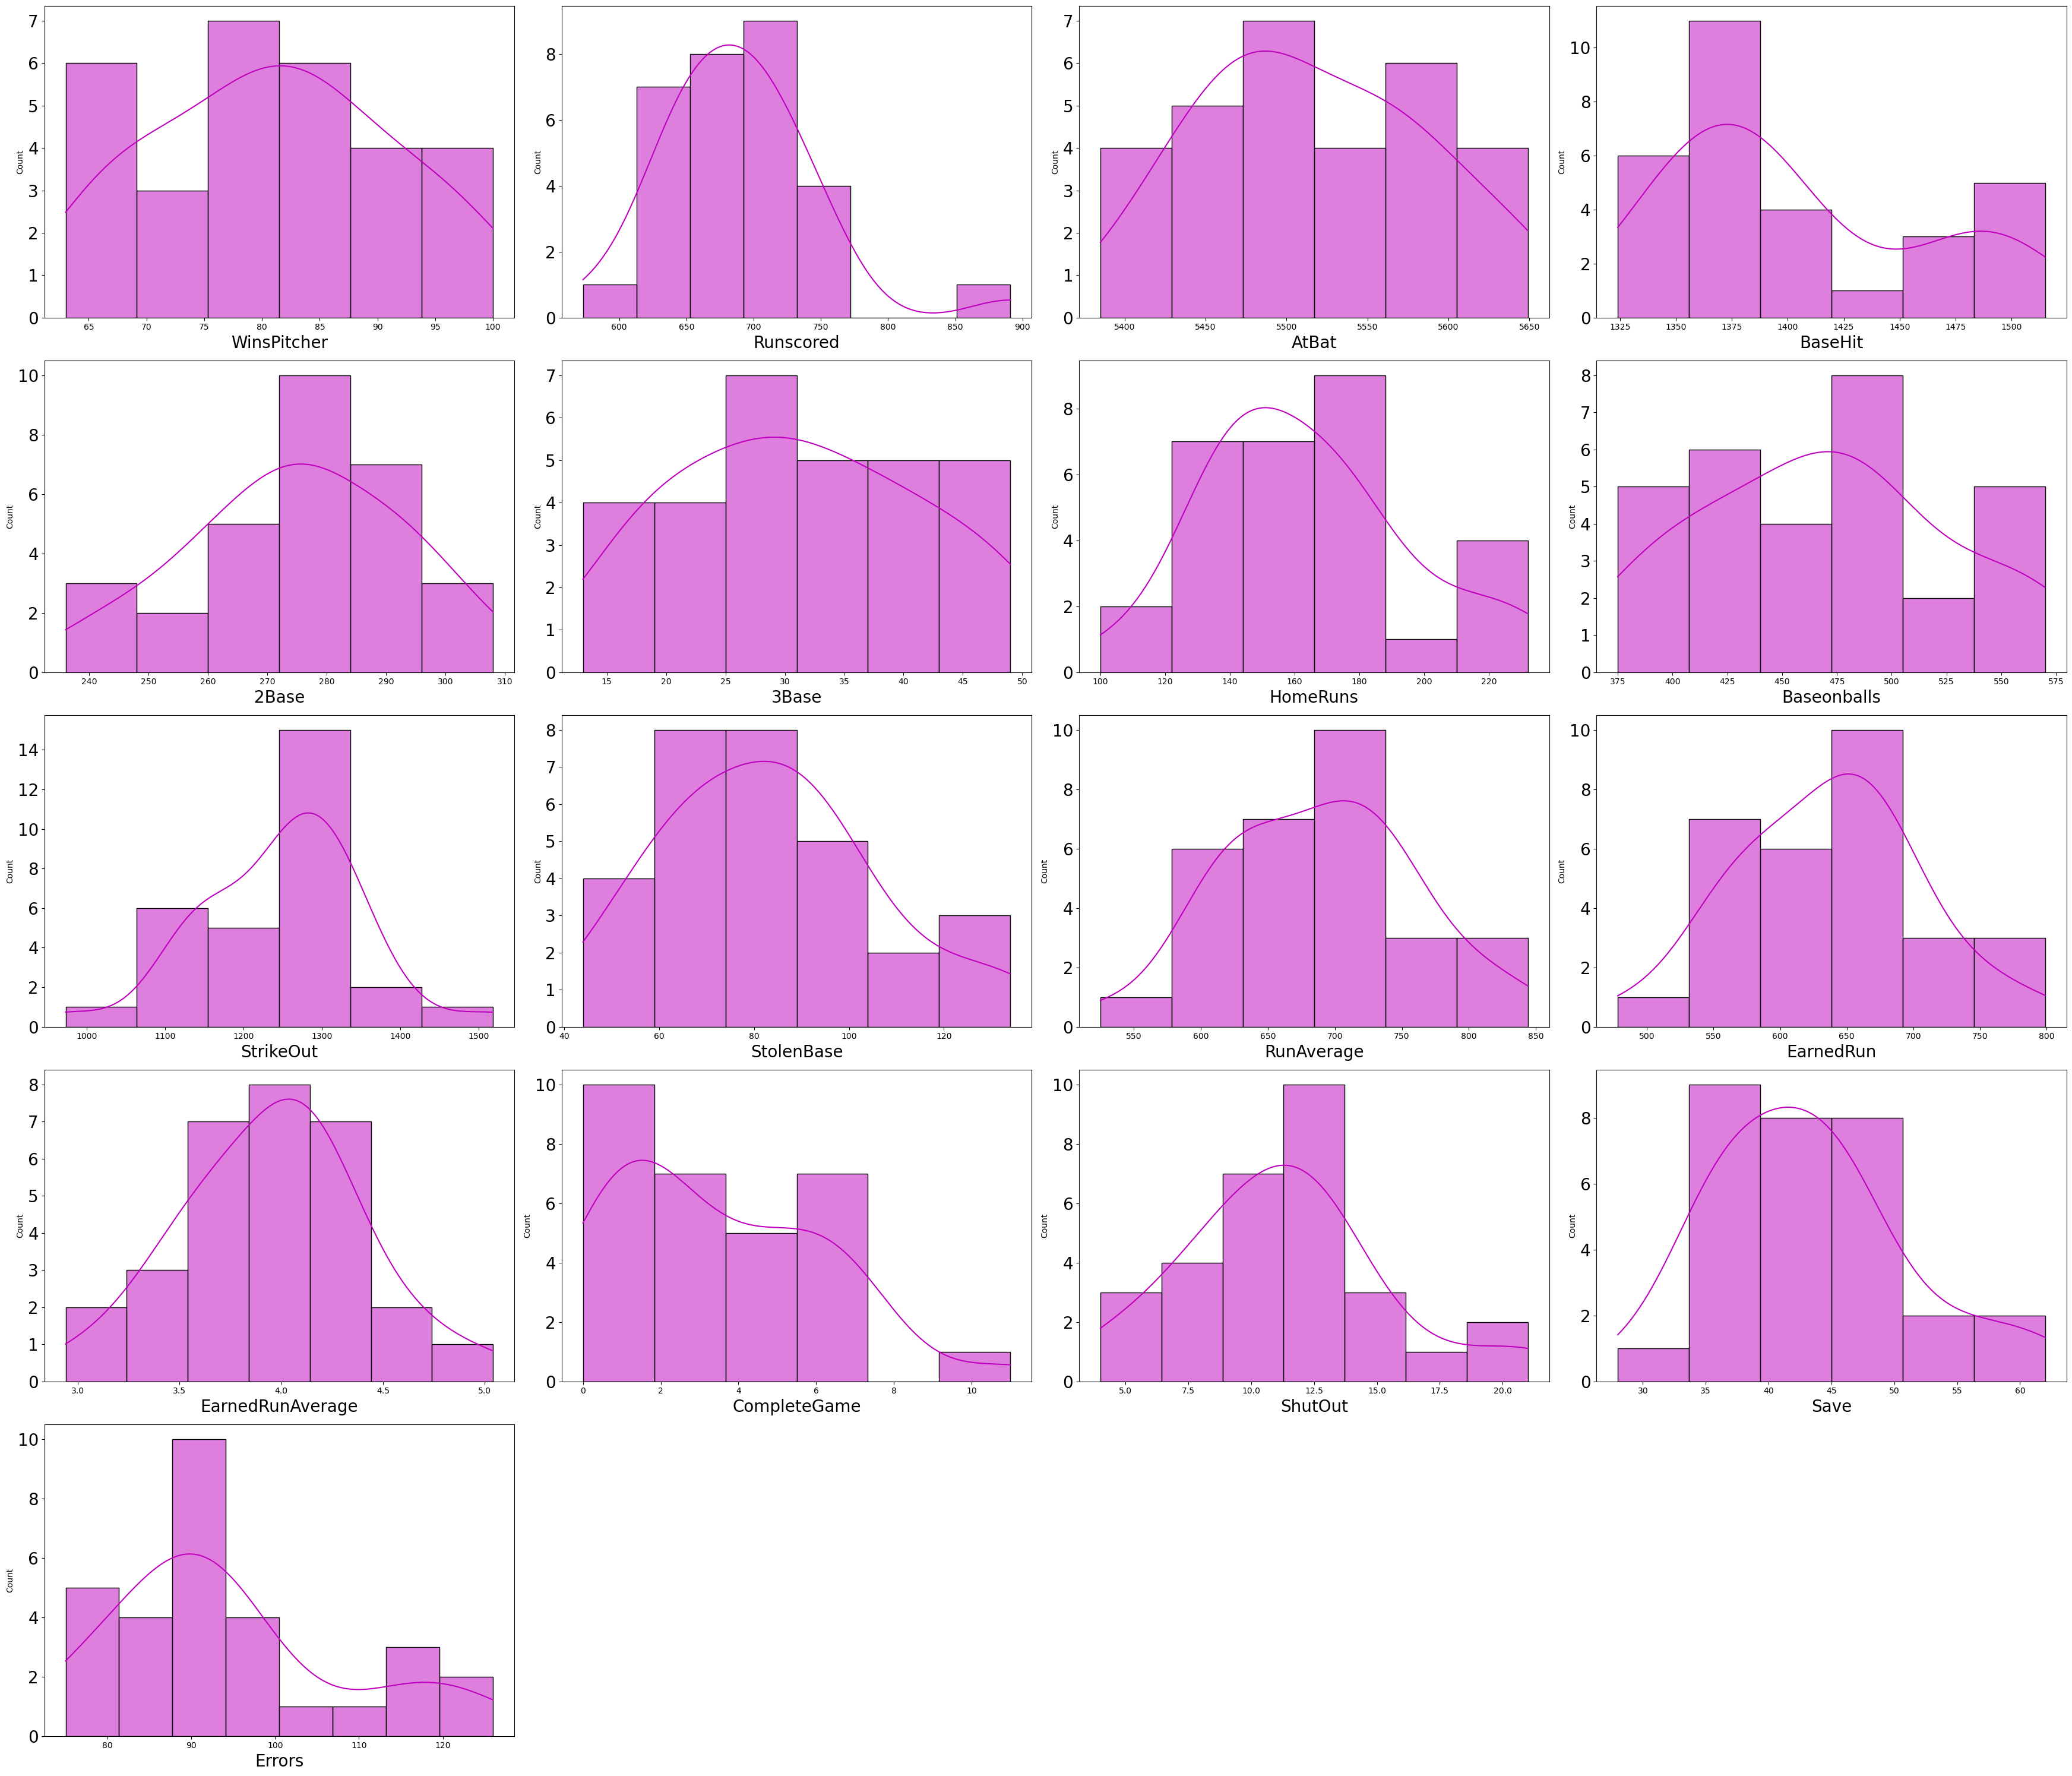

In [18]:
# Checking the data distribution in numerical columns

plt.figure(figsize=(35, 30), facecolor="white")
plotnum = 1

for col in df.columns:
    if plotnum <= 17:
        plt.subplot(5, 4, plotnum)
        sns.histplot(df[col], kde=True, color="m")
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation=0, fontsize=20)
        plotnum += 1

    
        
plt.tight_layout()
plt.show()

Observation Data in each variable is  uniformly distributed except for BaseHit,CompleteGame 

# Bivariate Analysis

<Figure size 400x200 with 0 Axes>

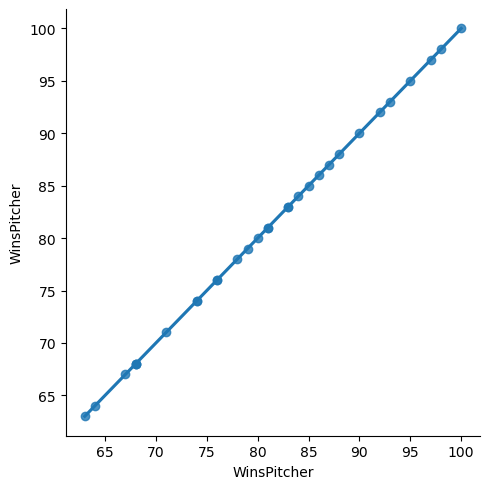

<Figure size 400x200 with 0 Axes>

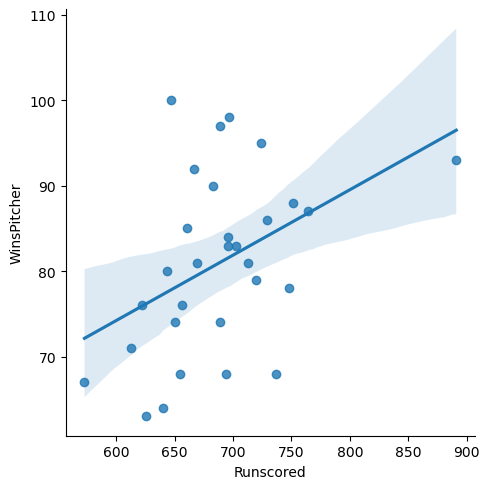

<Figure size 400x200 with 0 Axes>

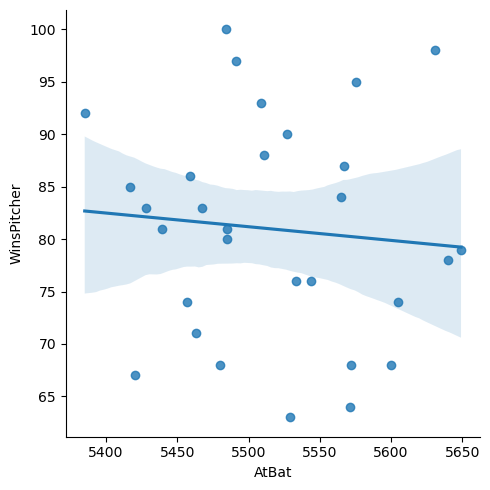

<Figure size 400x200 with 0 Axes>

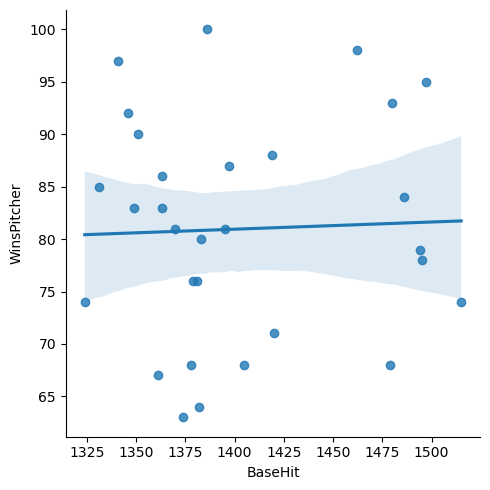

<Figure size 400x200 with 0 Axes>

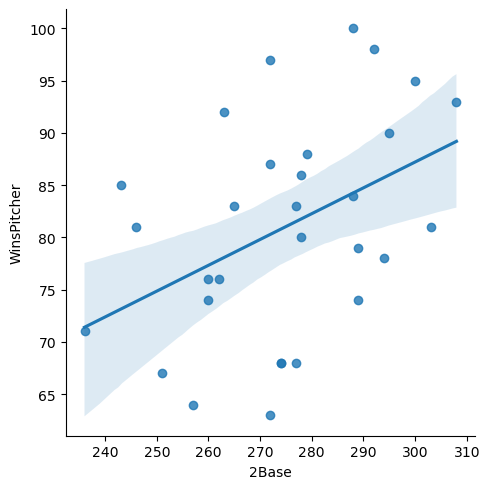

<Figure size 400x200 with 0 Axes>

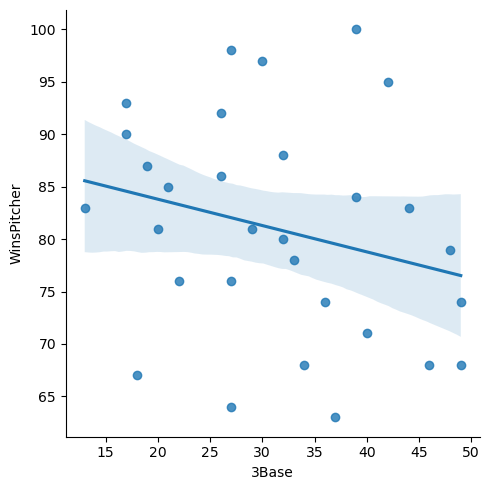

<Figure size 400x200 with 0 Axes>

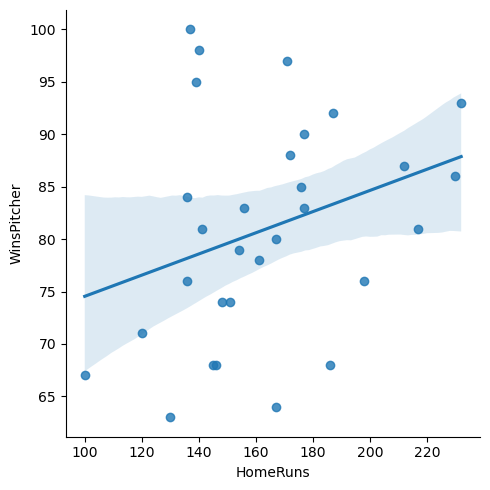

<Figure size 400x200 with 0 Axes>

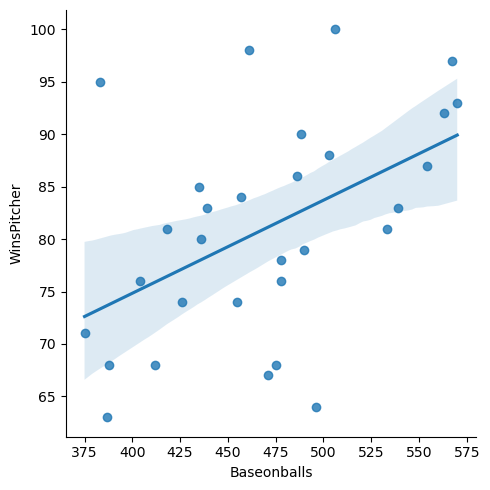

<Figure size 400x200 with 0 Axes>

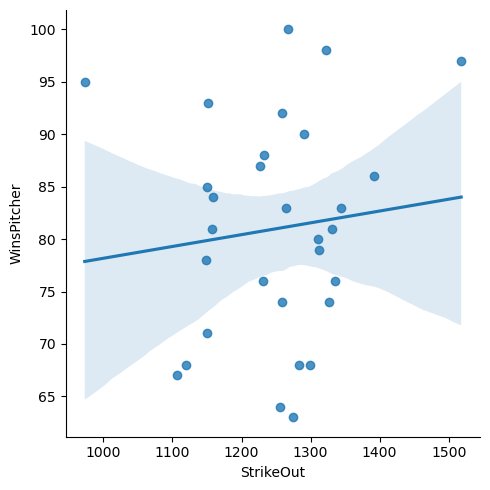

<Figure size 400x200 with 0 Axes>

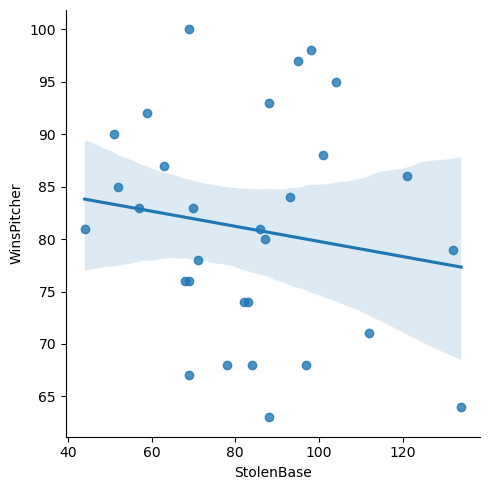

<Figure size 400x200 with 0 Axes>

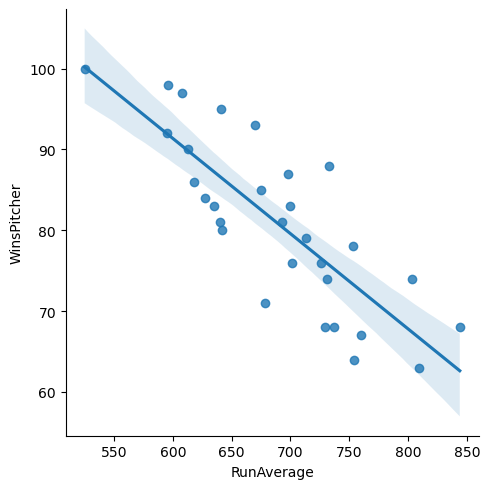

<Figure size 400x200 with 0 Axes>

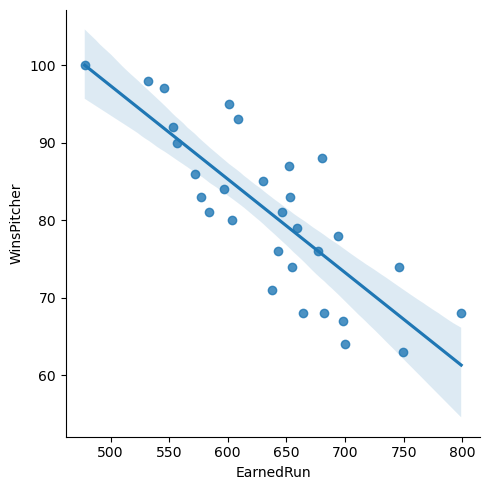

<Figure size 400x200 with 0 Axes>

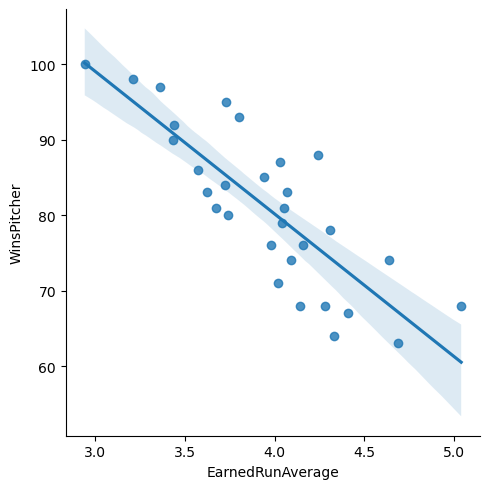

<Figure size 400x200 with 0 Axes>

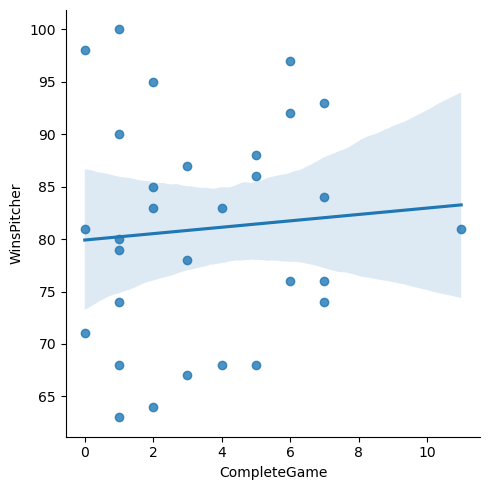

<Figure size 400x200 with 0 Axes>

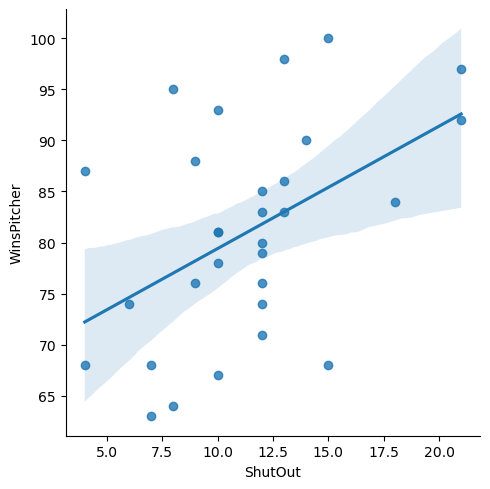

<Figure size 400x200 with 0 Axes>

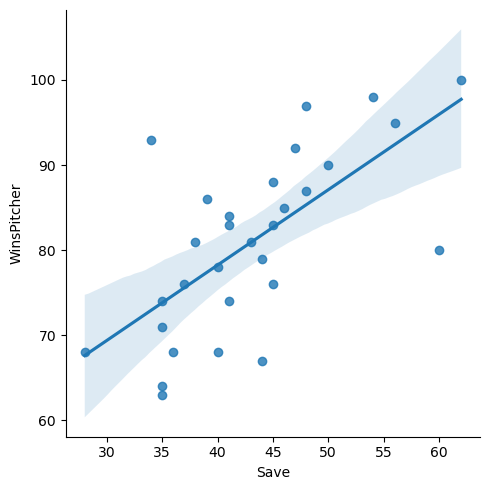

<Figure size 400x200 with 0 Axes>

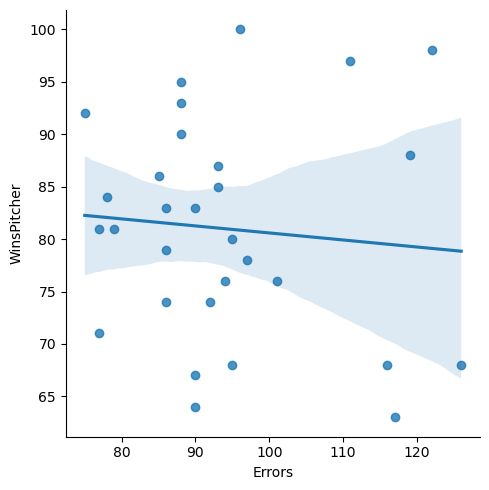

In [19]:
#Checking relationship b/w WinsPitcher with others
for i in  df.columns:
    plt.figure(figsize=(4,2),facecolor="white")
    sns.lmplot(x=i ,y="WinsPitcher", data=df, palette="colorblind")
    plt.xlabel(i)
    plt.ylabel("WinsPitcher")
plt.show()

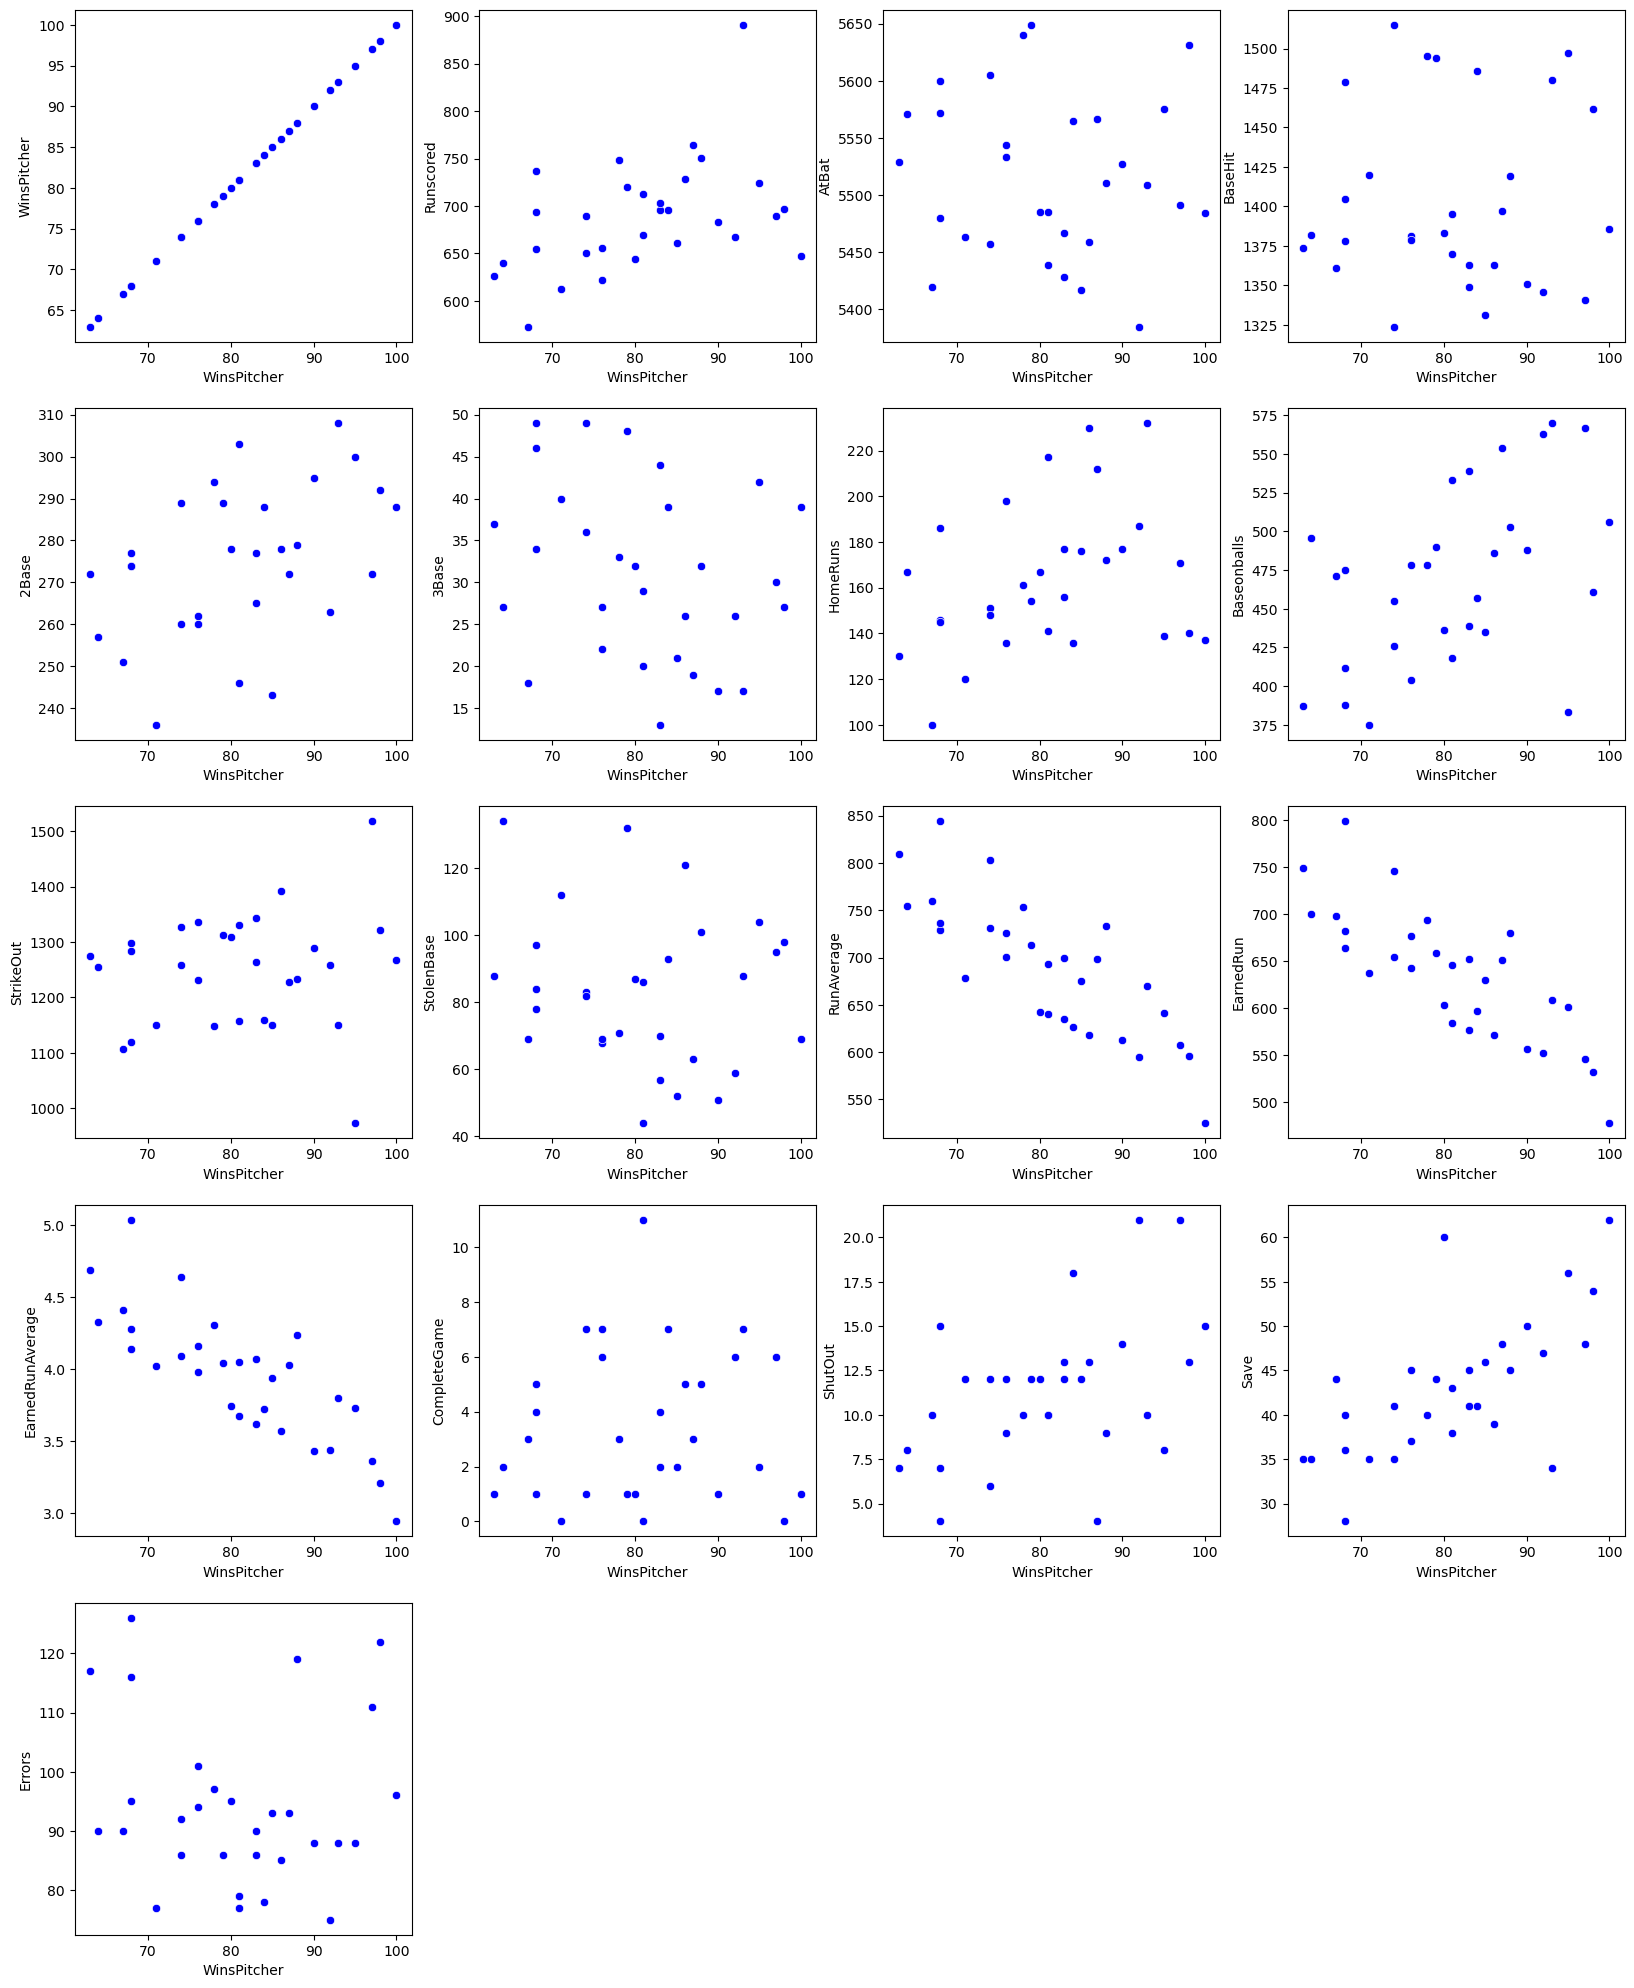

In [20]:
#Comparing WinsPitcher with other columns using scatter plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x="WinsPitcher",y=i, data =df,color='b')
        plt.xlabel("WinsPitcher")
        plt.ylabel(i)
    p+=1
plt.show()

Observation:
    
a)EarnedRunsAverage,EarnedRuns,Run Average have -ve relation with Winspitcher


b) Slightly Positive relation between WinsPitcher and Save

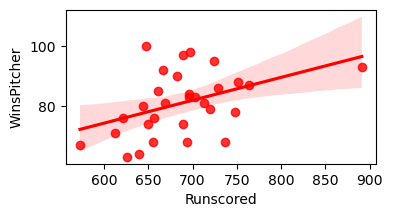

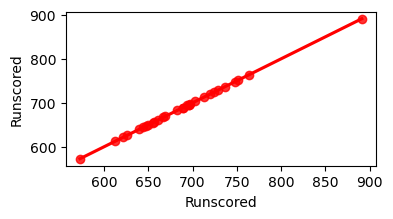

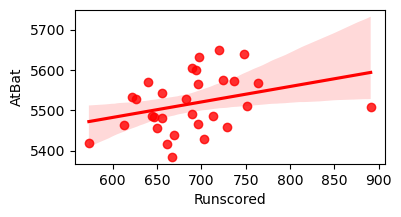

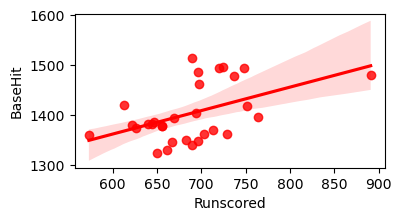

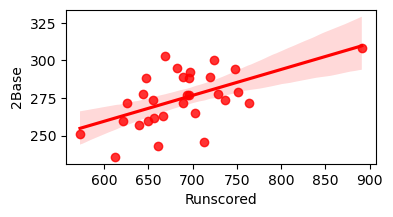

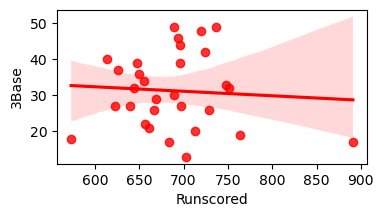

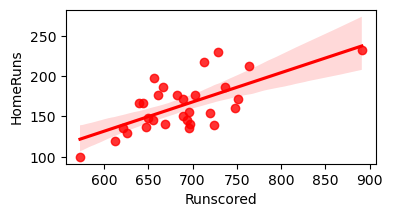

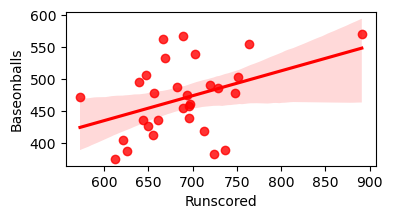

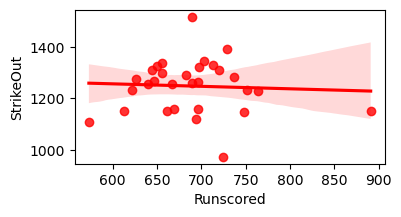

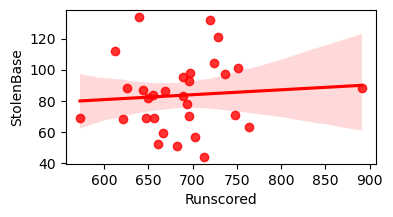

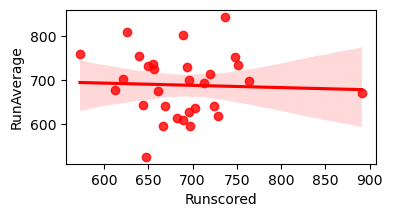

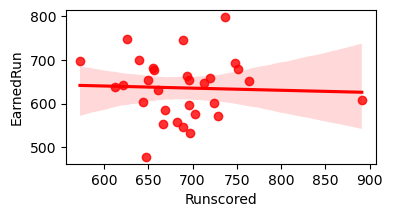

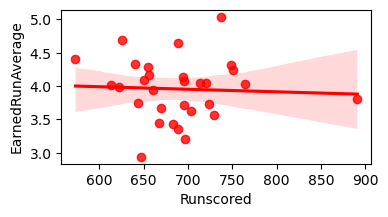

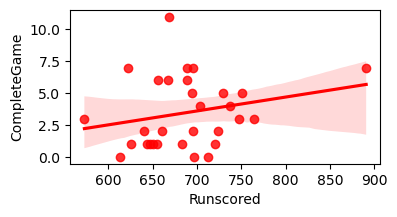

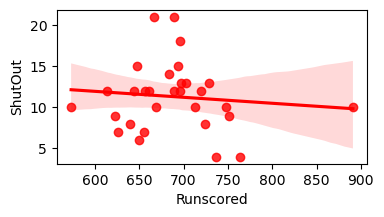

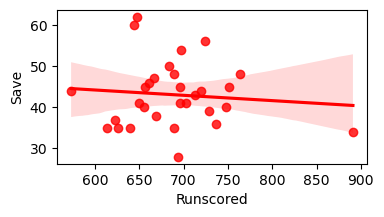

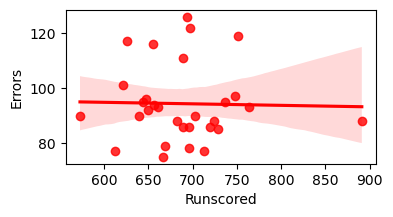

In [21]:
#Runscored with others
for i in df.columns:
    plt.figure(figsize=(4,2),facecolor="white")
    sns.regplot(x="Runscored" ,y=i, data=df, color="r")
    plt.xlabel("Runscored")
    plt.ylabel(i)
plt.show()

Observation: Runscored has slight positive corelation with AtBat, Baseonball, HomeRuns

<Figure size 300x200 with 0 Axes>

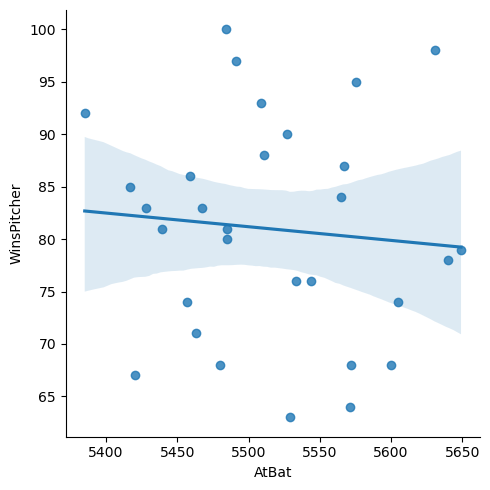

<Figure size 300x200 with 0 Axes>

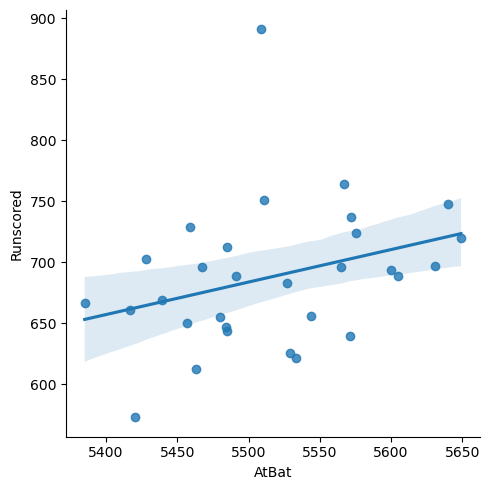

<Figure size 300x200 with 0 Axes>

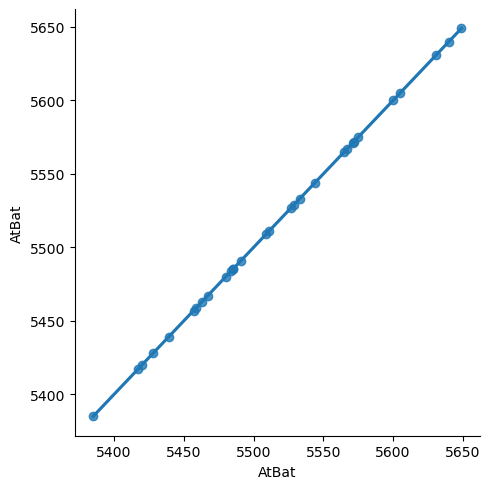

<Figure size 300x200 with 0 Axes>

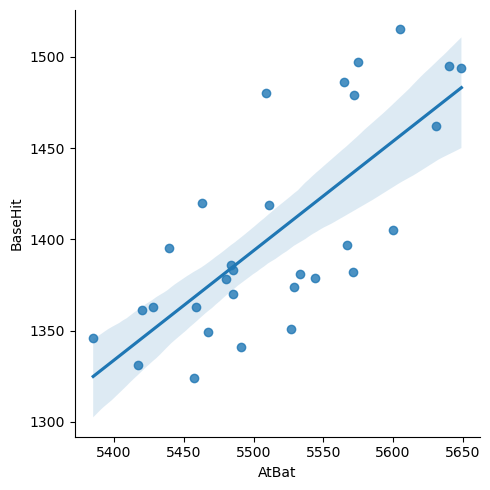

<Figure size 300x200 with 0 Axes>

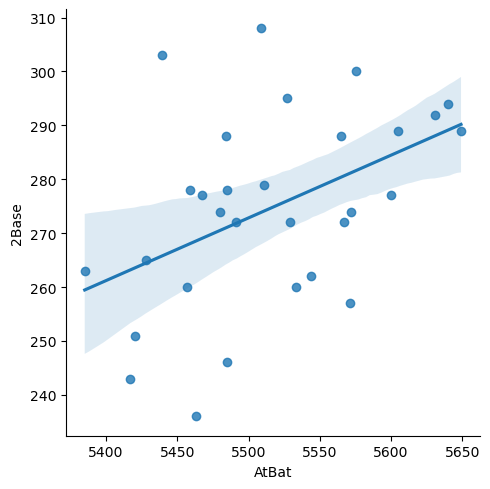

<Figure size 300x200 with 0 Axes>

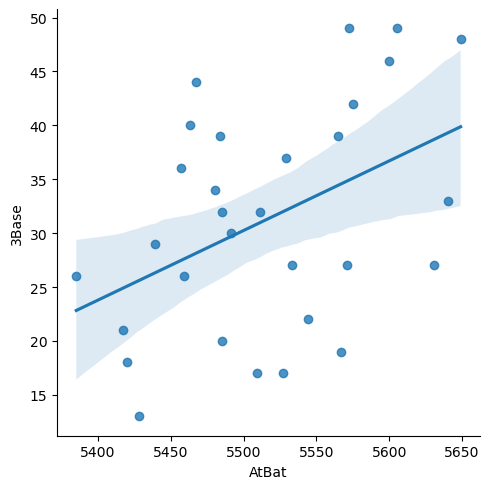

<Figure size 300x200 with 0 Axes>

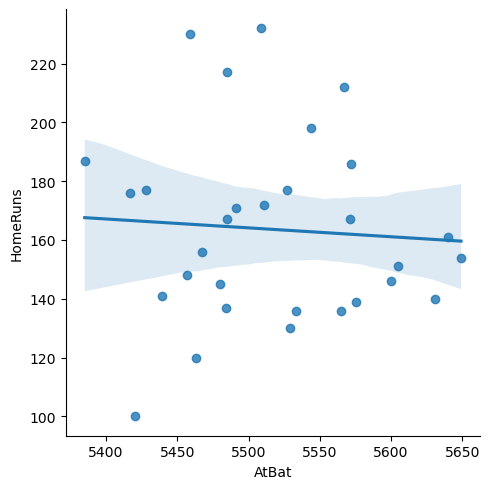

<Figure size 300x200 with 0 Axes>

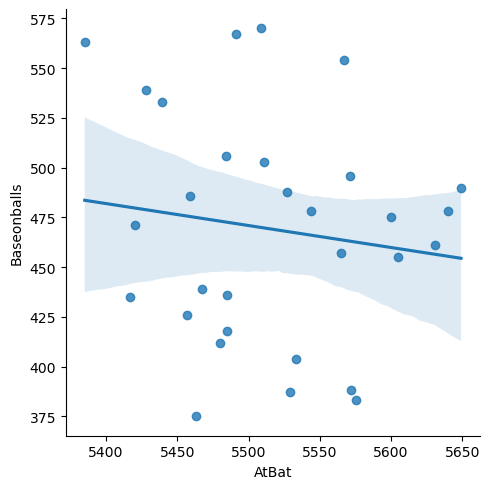

<Figure size 300x200 with 0 Axes>

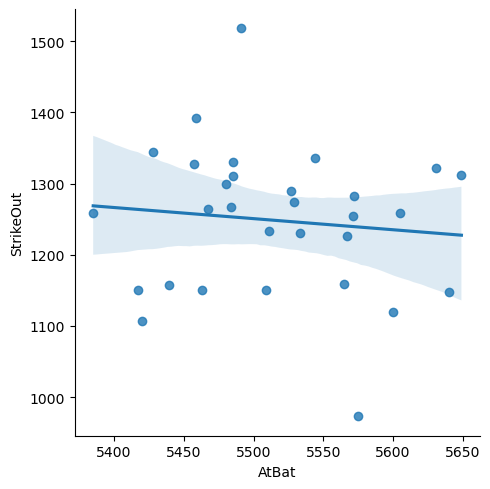

<Figure size 300x200 with 0 Axes>

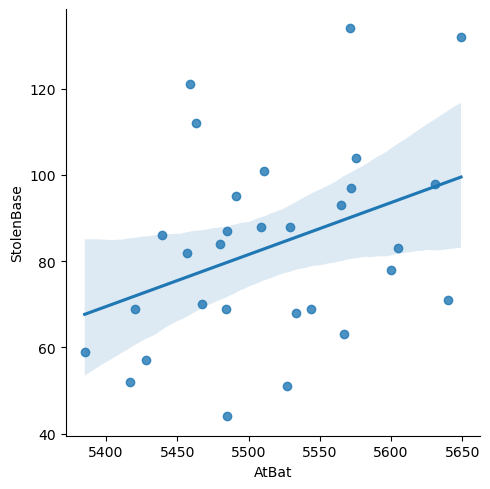

<Figure size 300x200 with 0 Axes>

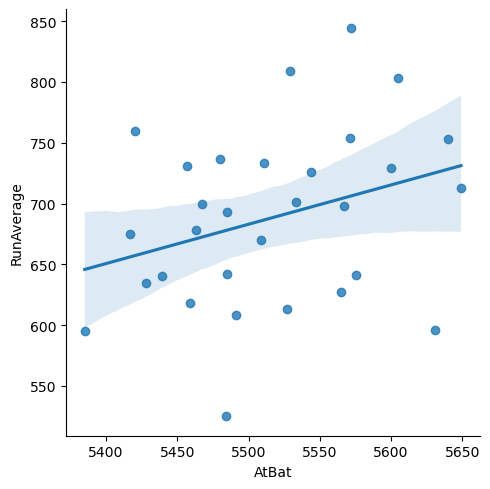

<Figure size 300x200 with 0 Axes>

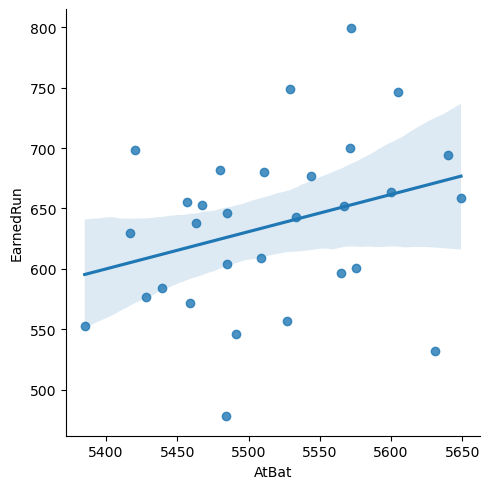

<Figure size 300x200 with 0 Axes>

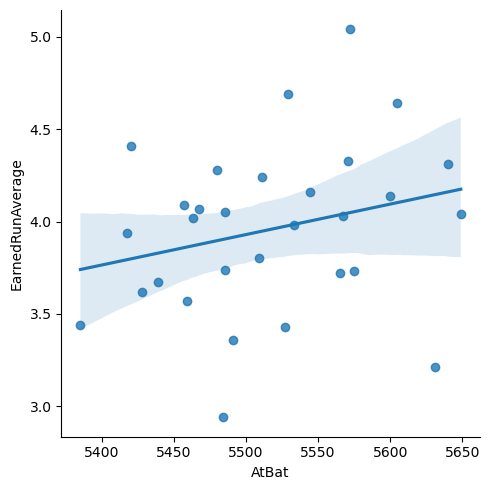

<Figure size 300x200 with 0 Axes>

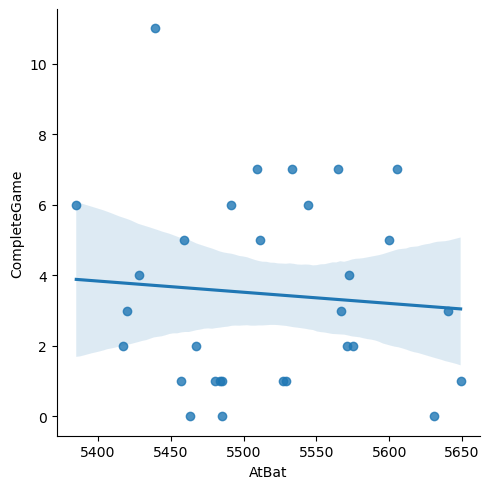

<Figure size 300x200 with 0 Axes>

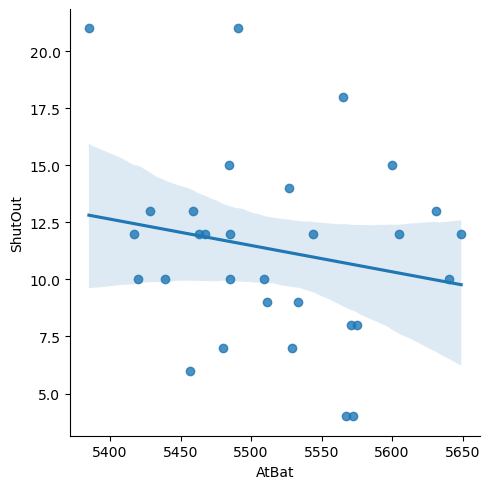

<Figure size 300x200 with 0 Axes>

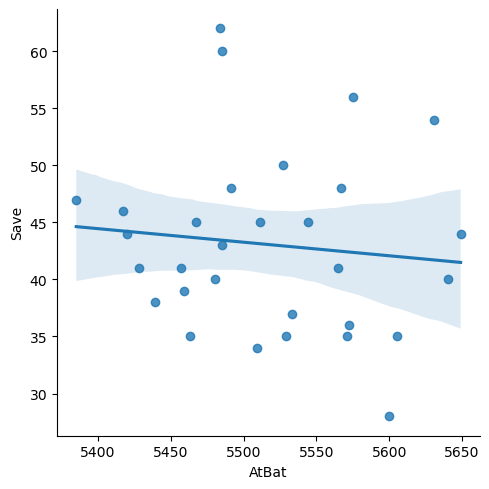

<Figure size 300x200 with 0 Axes>

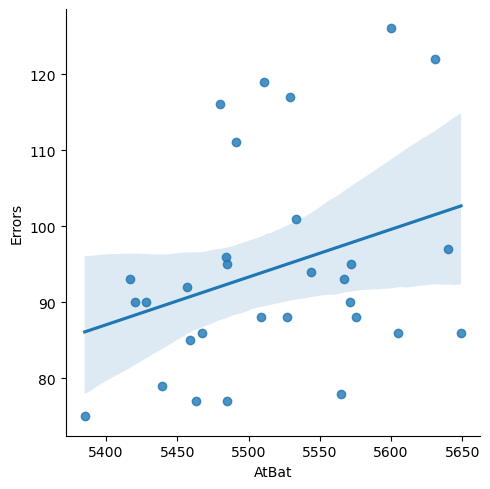

In [23]:
# Relation between AtBat and others
for i in  df.columns:
    plt.figure(figsize=(3,2),facecolor="white")
    sns.lmplot(x="AtBat" ,y=i, data=df, palette="colorblind")
    plt.xlabel("AtBat")
    plt.ylabel(i)
plt.show()

Observation: AtBat has no relation with other independent variable

<Figure size 300x200 with 0 Axes>

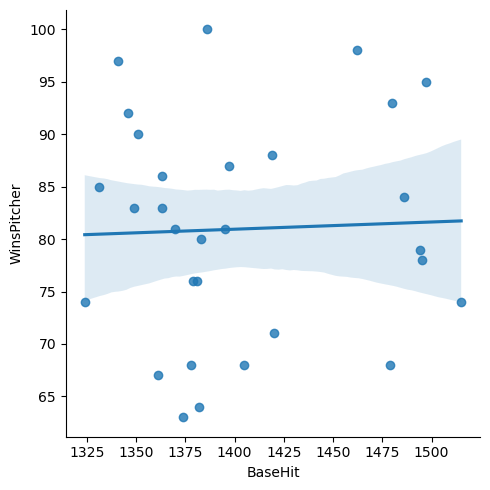

<Figure size 300x200 with 0 Axes>

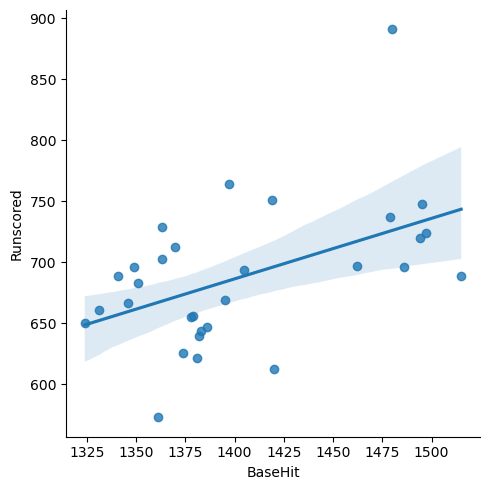

<Figure size 300x200 with 0 Axes>

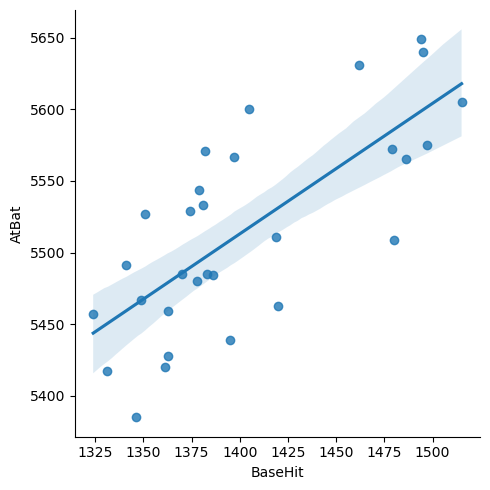

<Figure size 300x200 with 0 Axes>

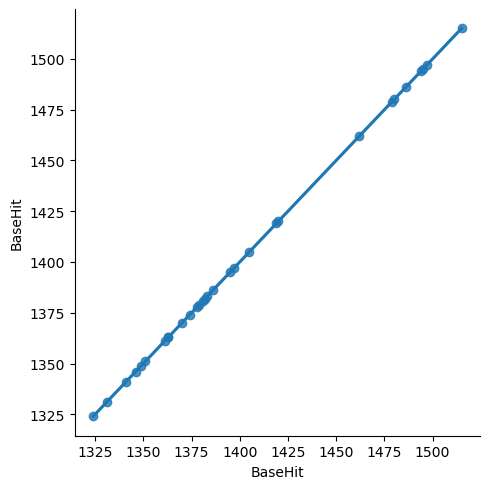

<Figure size 300x200 with 0 Axes>

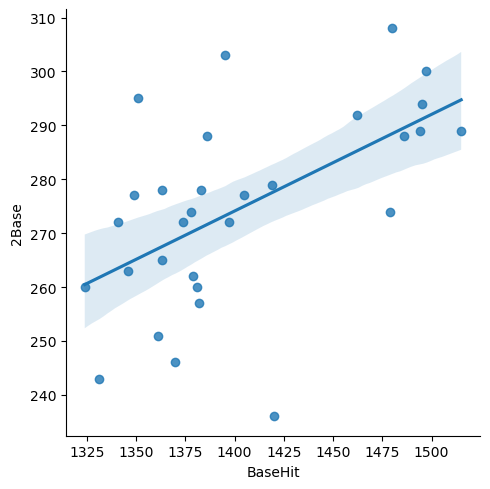

<Figure size 300x200 with 0 Axes>

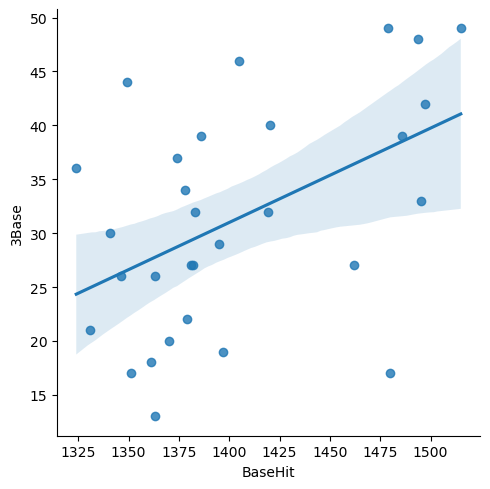

<Figure size 300x200 with 0 Axes>

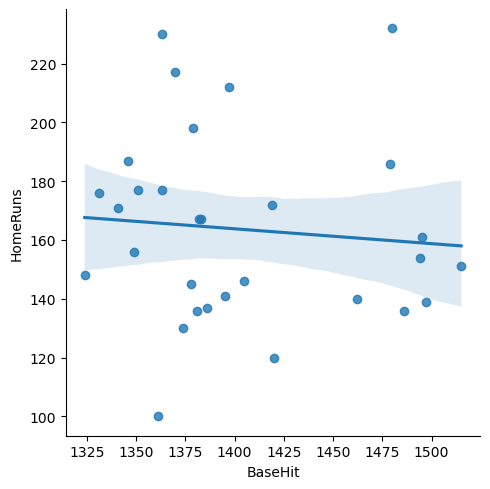

<Figure size 300x200 with 0 Axes>

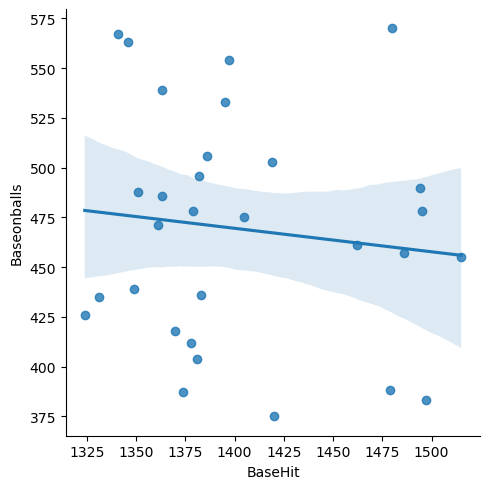

<Figure size 300x200 with 0 Axes>

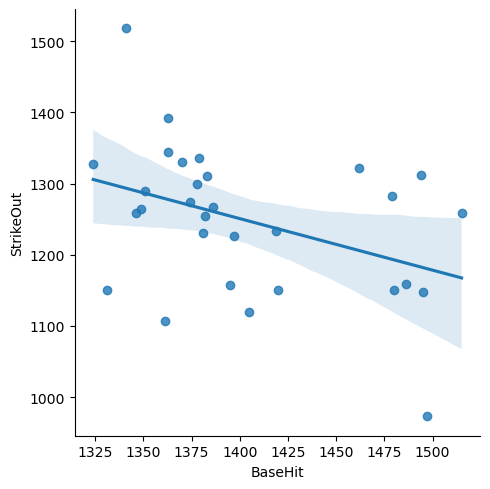

<Figure size 300x200 with 0 Axes>

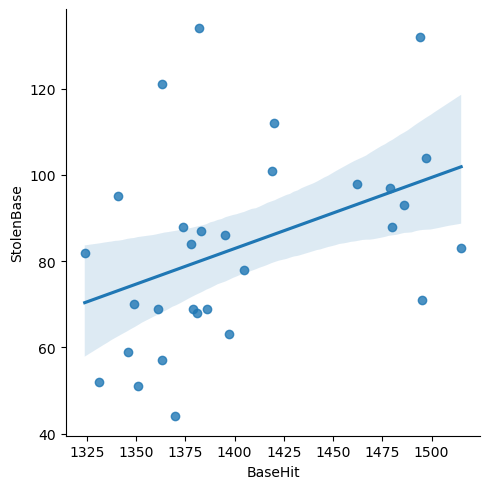

<Figure size 300x200 with 0 Axes>

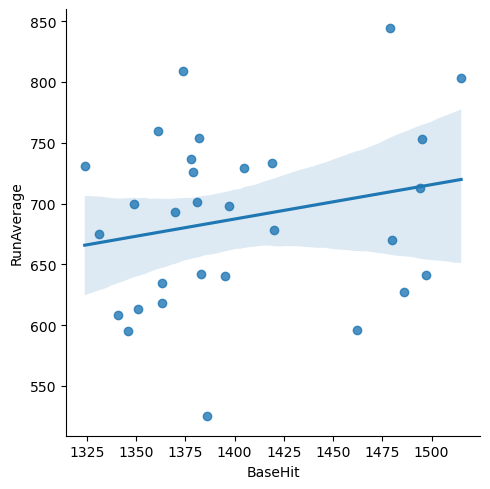

<Figure size 300x200 with 0 Axes>

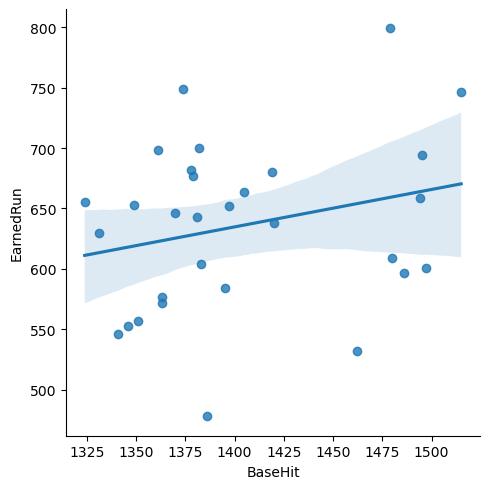

<Figure size 300x200 with 0 Axes>

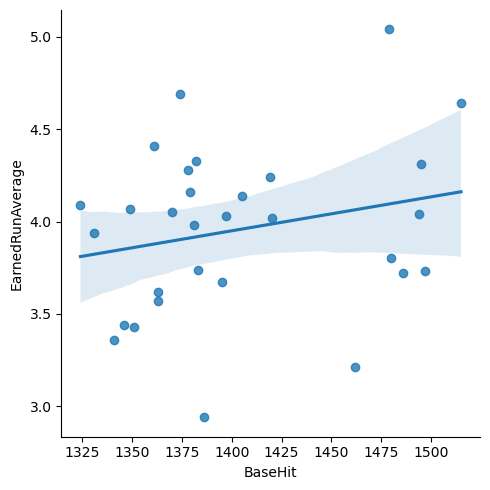

<Figure size 300x200 with 0 Axes>

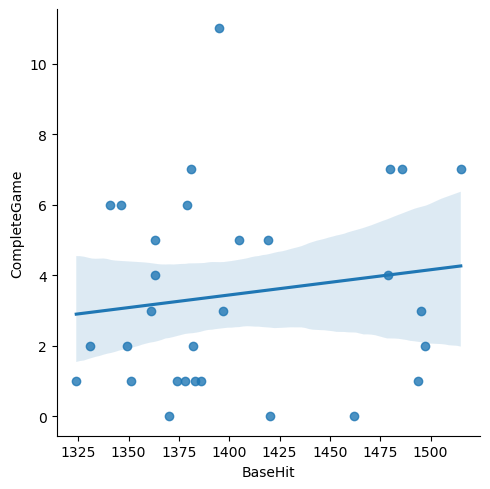

<Figure size 300x200 with 0 Axes>

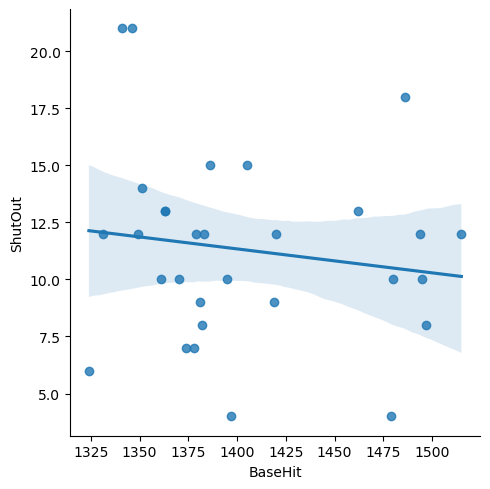

<Figure size 300x200 with 0 Axes>

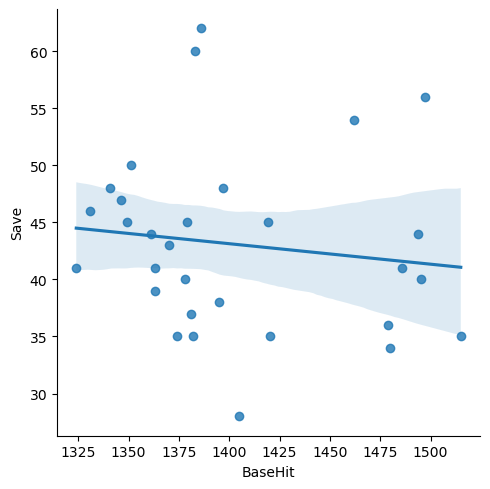

<Figure size 300x200 with 0 Axes>

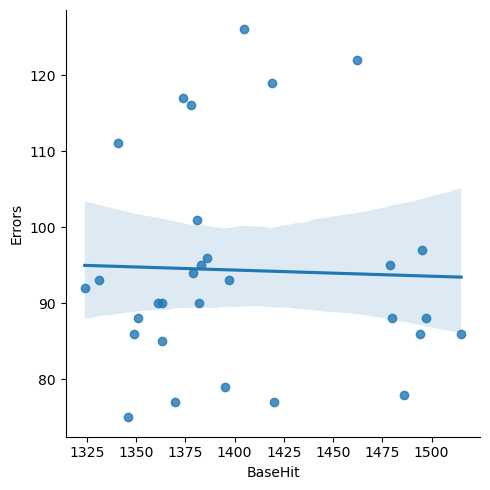

In [27]:
#Realtion between BaseHit and others
for i in  df.columns:
    plt.figure(figsize=(3,2),facecolor="white")
    sns.lmplot(x="BaseHit" ,y=i, data=df, palette="bright")
    plt.xlabel("BaseHit")
    plt.ylabel(i)

plt.tight_layout()
plt.show()

Obseravtion: No relation between BaseHit and others

<Figure size 300x200 with 0 Axes>

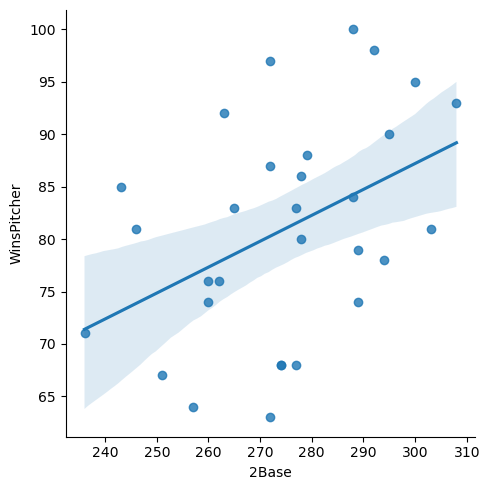

<Figure size 300x200 with 0 Axes>

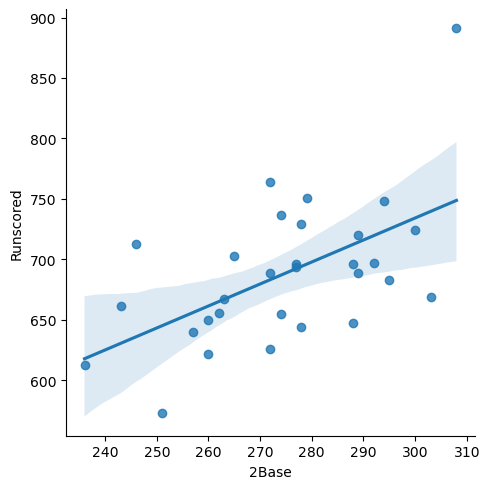

<Figure size 300x200 with 0 Axes>

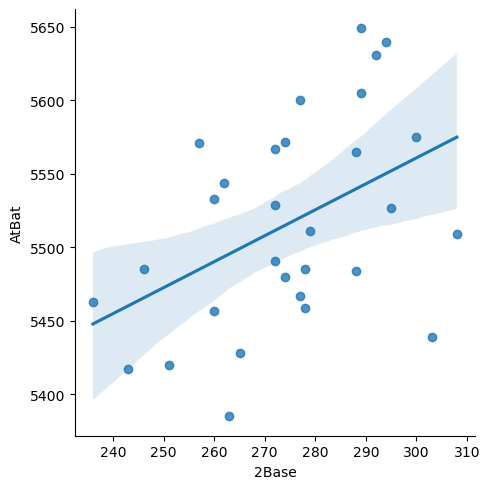

<Figure size 300x200 with 0 Axes>

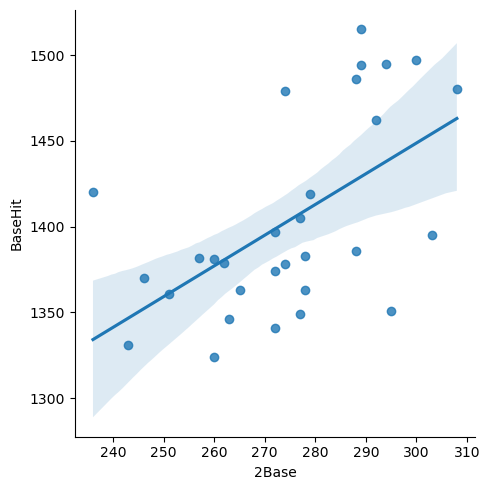

<Figure size 300x200 with 0 Axes>

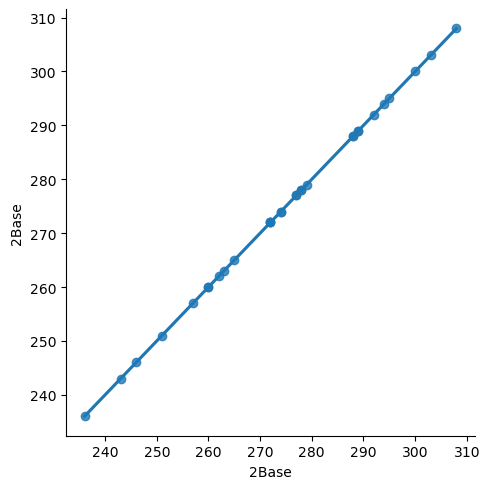

<Figure size 300x200 with 0 Axes>

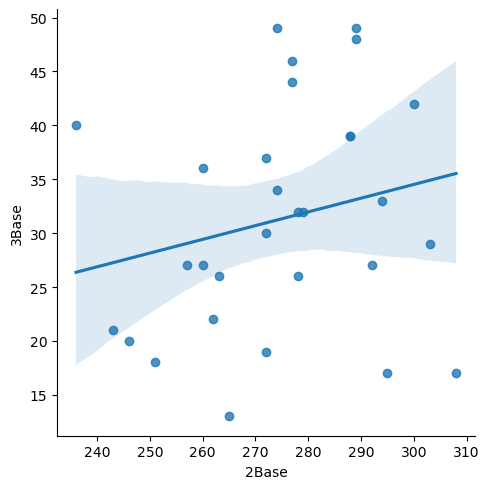

<Figure size 300x200 with 0 Axes>

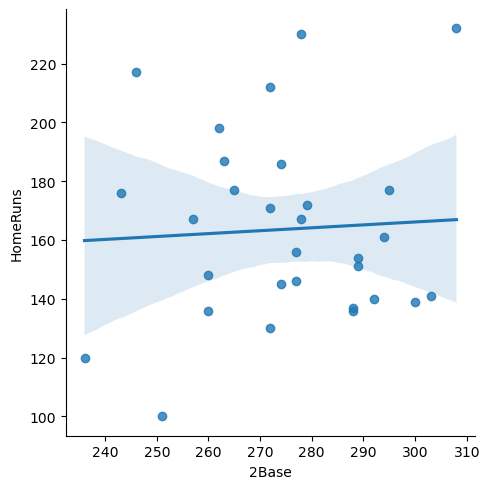

<Figure size 300x200 with 0 Axes>

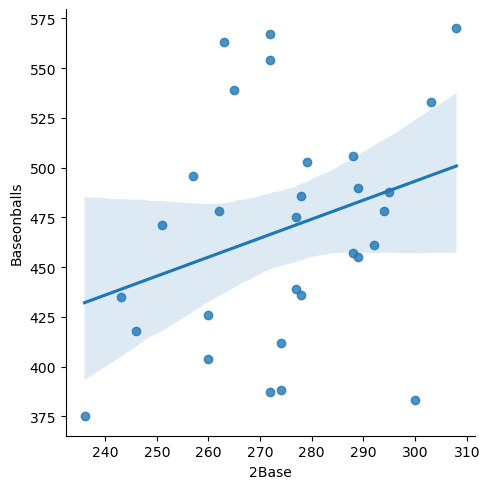

<Figure size 300x200 with 0 Axes>

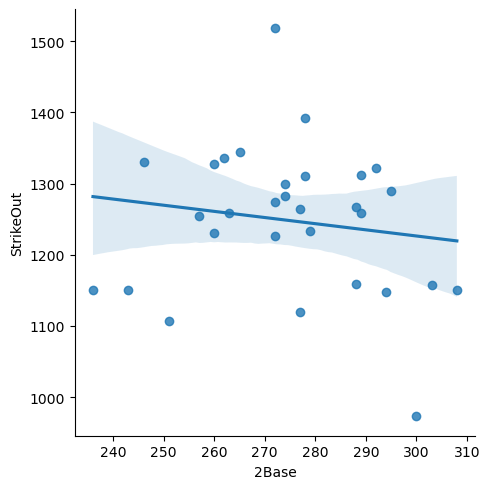

<Figure size 300x200 with 0 Axes>

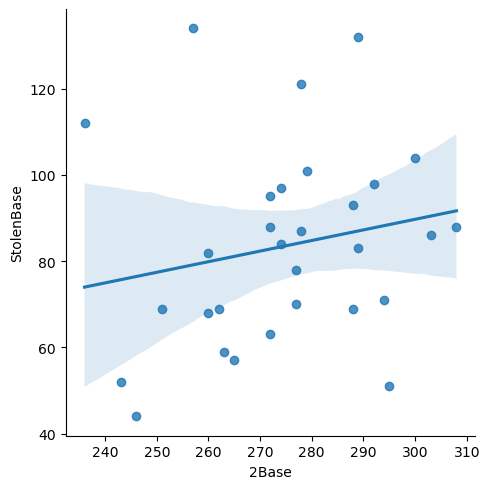

<Figure size 300x200 with 0 Axes>

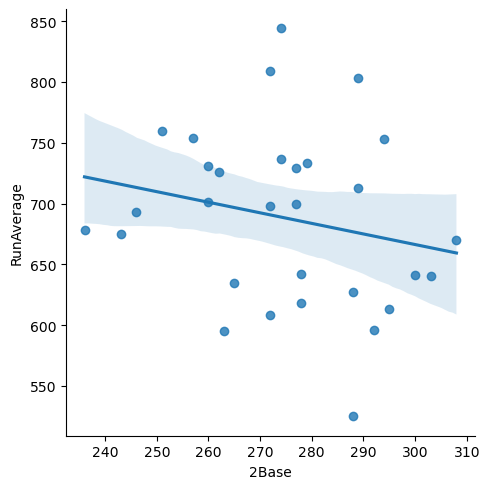

<Figure size 300x200 with 0 Axes>

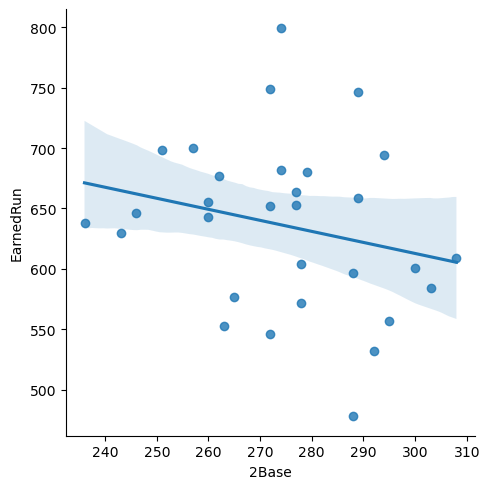

<Figure size 300x200 with 0 Axes>

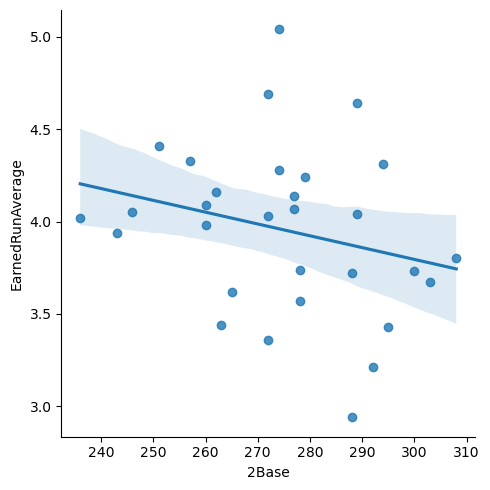

<Figure size 300x200 with 0 Axes>

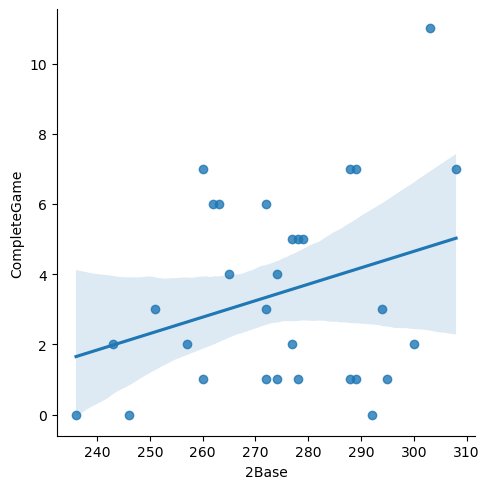

<Figure size 300x200 with 0 Axes>

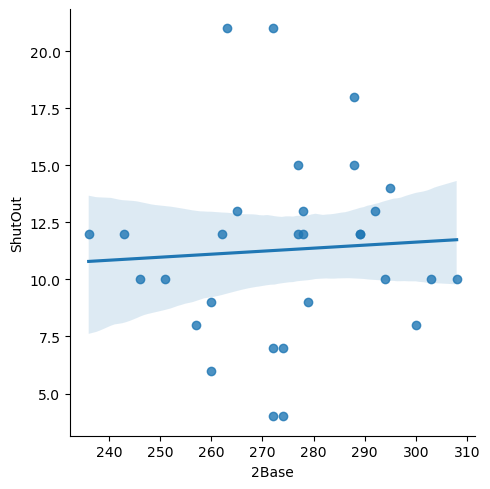

<Figure size 300x200 with 0 Axes>

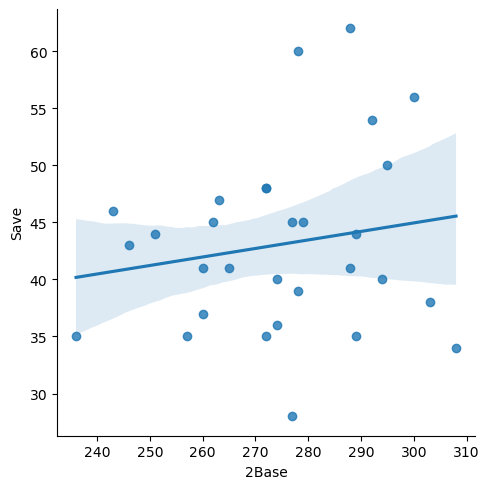

<Figure size 300x200 with 0 Axes>

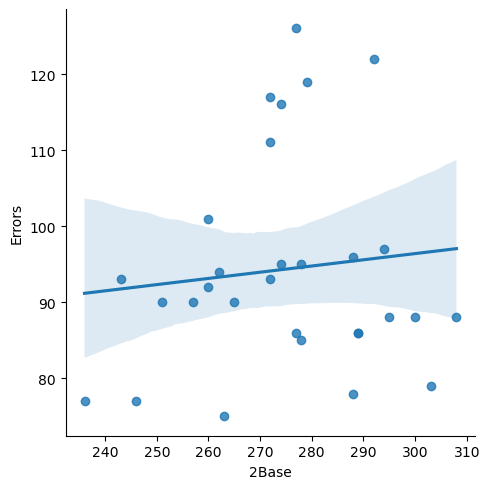

In [29]:
#Relation Between 2Base and others
for i in  df.columns:
    plt.figure(figsize=(3,2),facecolor="white")
    sns.lmplot(x="2Base" ,y=i, data=df, palette="bright")
    plt.xlabel("2Base")
    plt.ylabel(i)
plt.show()

Observation: No relation

<Figure size 300x200 with 0 Axes>

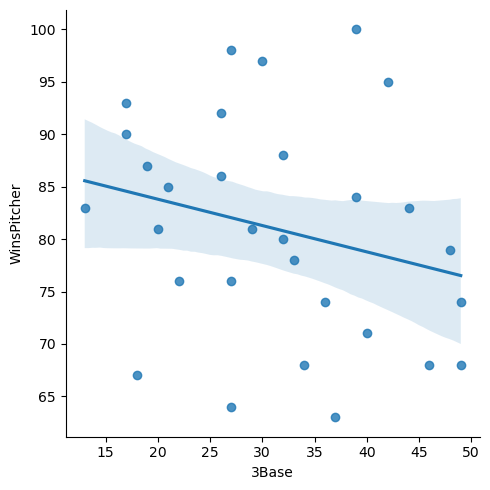

<Figure size 300x200 with 0 Axes>

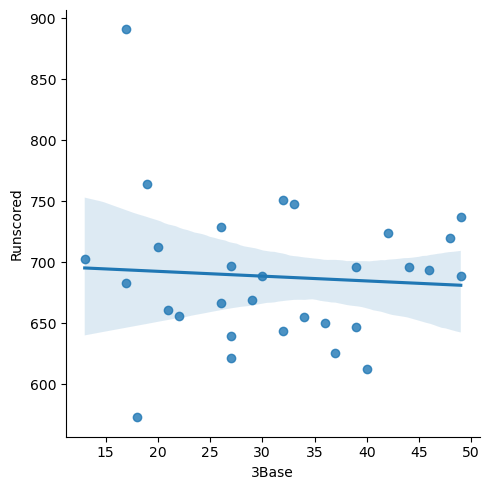

<Figure size 300x200 with 0 Axes>

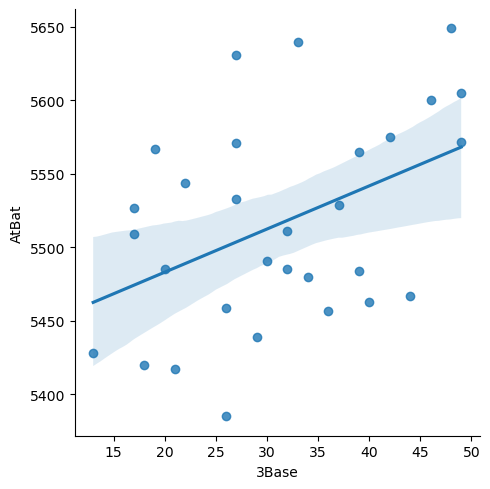

<Figure size 300x200 with 0 Axes>

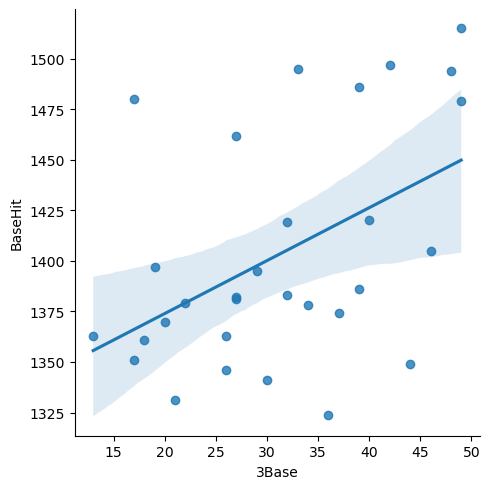

<Figure size 300x200 with 0 Axes>

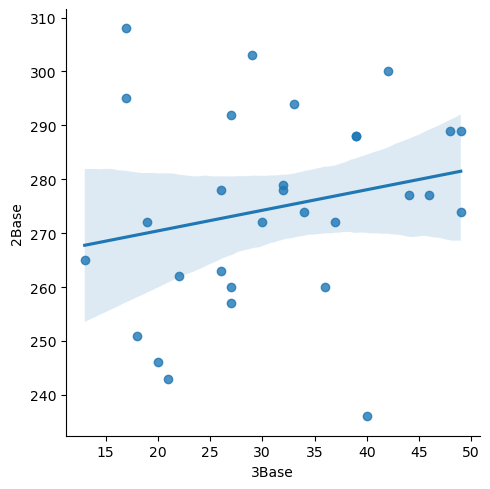

<Figure size 300x200 with 0 Axes>

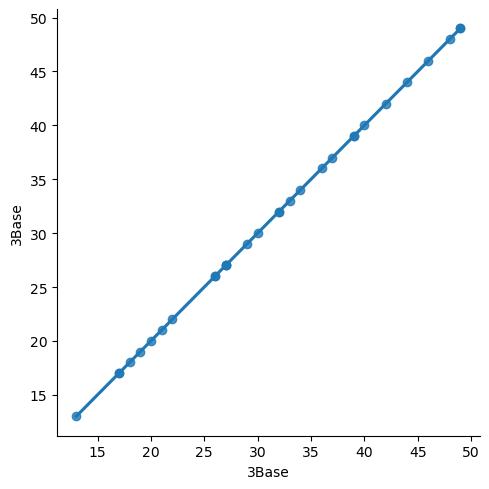

<Figure size 300x200 with 0 Axes>

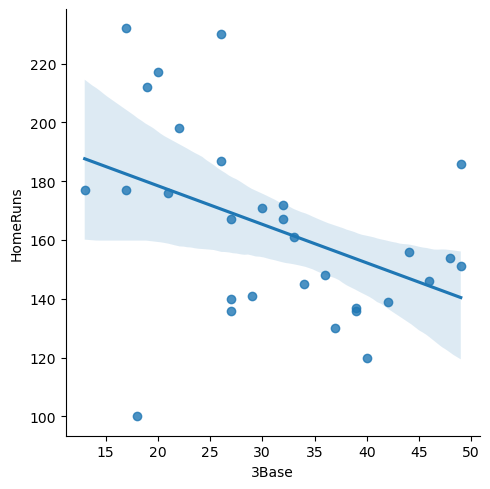

<Figure size 300x200 with 0 Axes>

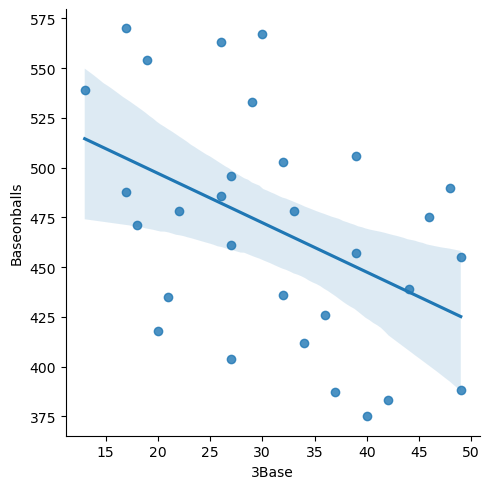

<Figure size 300x200 with 0 Axes>

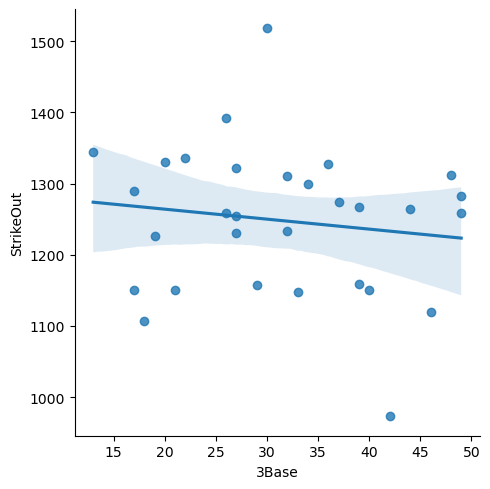

<Figure size 300x200 with 0 Axes>

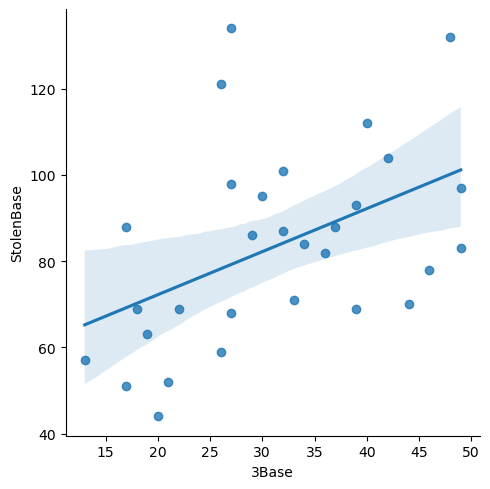

<Figure size 300x200 with 0 Axes>

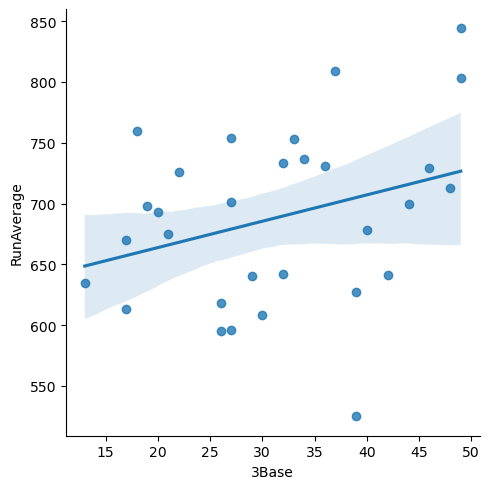

<Figure size 300x200 with 0 Axes>

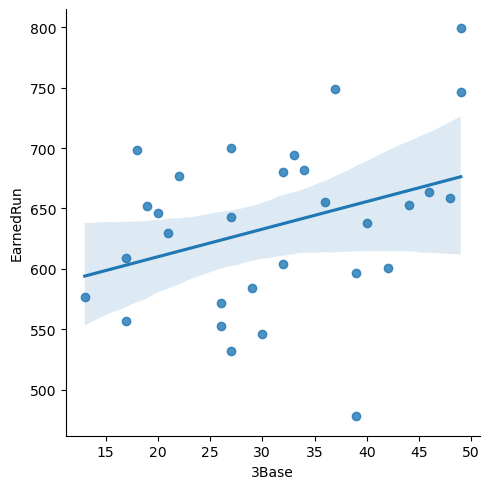

<Figure size 300x200 with 0 Axes>

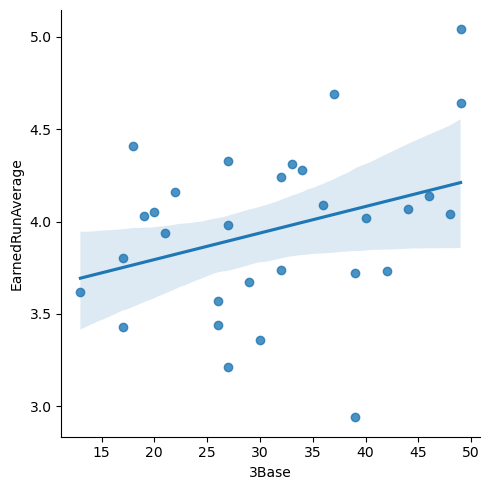

<Figure size 300x200 with 0 Axes>

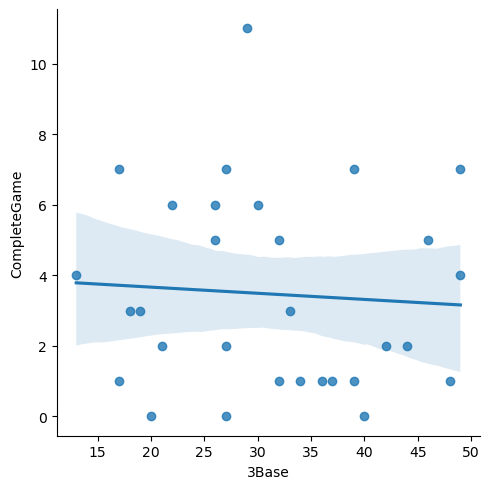

<Figure size 300x200 with 0 Axes>

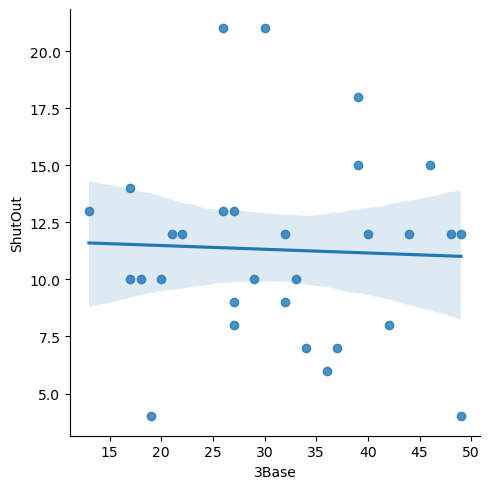

<Figure size 300x200 with 0 Axes>

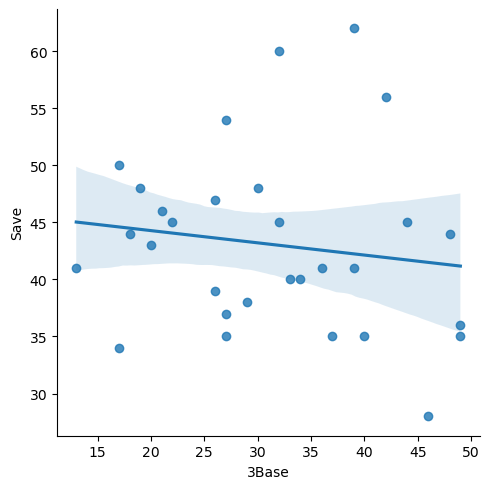

<Figure size 300x200 with 0 Axes>

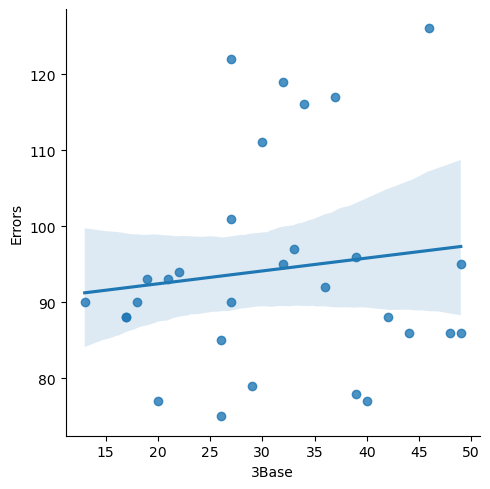

In [31]:
#Relation Between 3Base and others
for i in  df.columns:
    plt.figure(figsize=(3,2),facecolor="white")
    sns.lmplot(x="3Base" ,y=i, data=df, palette="bright")
    plt.xlabel("3Base")
    plt.ylabel(i)
plt.show()

Observation: No relation

<Figure size 300x200 with 0 Axes>

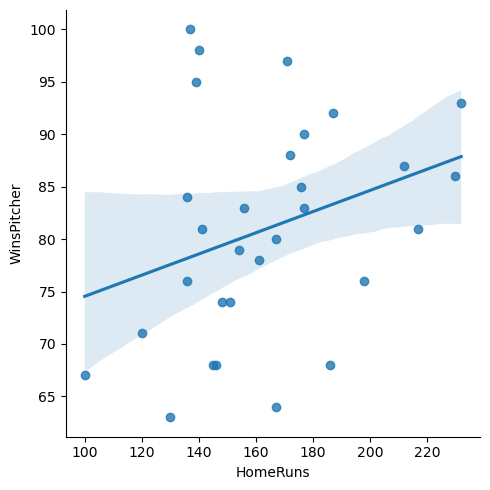

<Figure size 300x200 with 0 Axes>

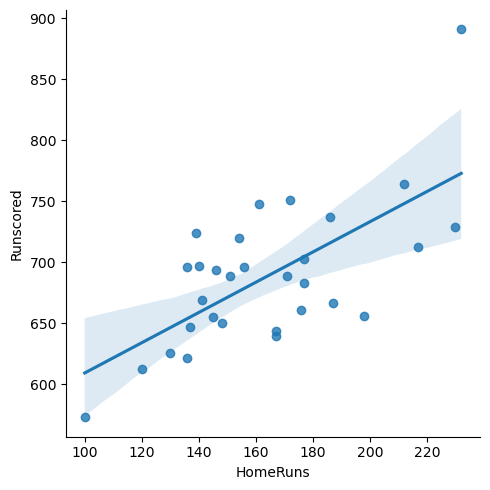

<Figure size 300x200 with 0 Axes>

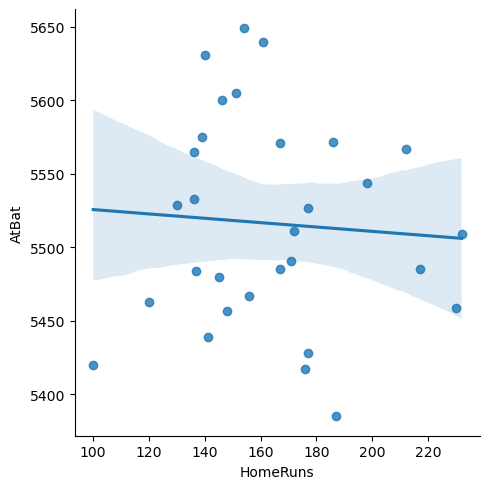

<Figure size 300x200 with 0 Axes>

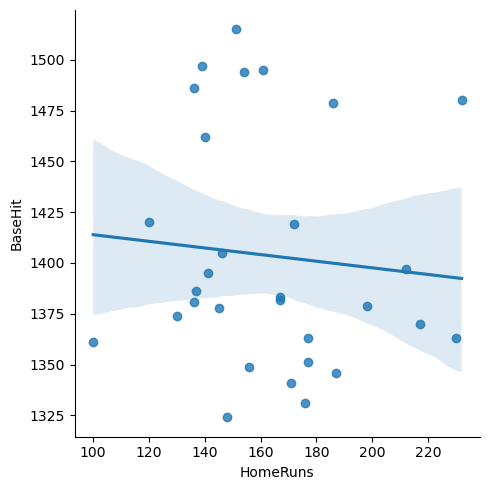

<Figure size 300x200 with 0 Axes>

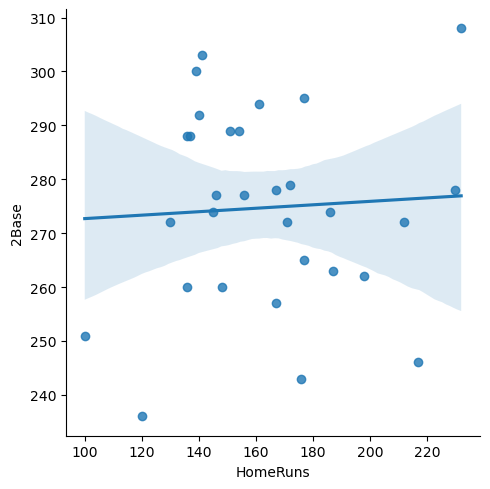

<Figure size 300x200 with 0 Axes>

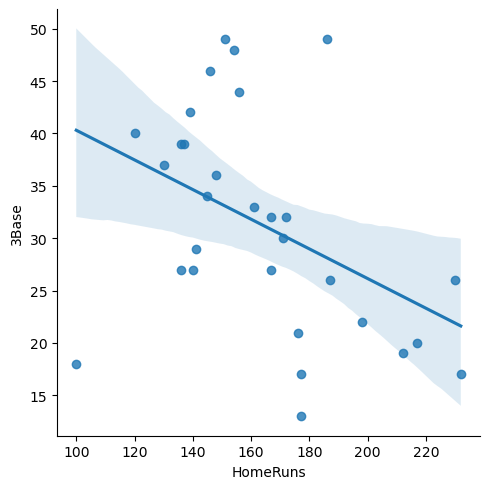

<Figure size 300x200 with 0 Axes>

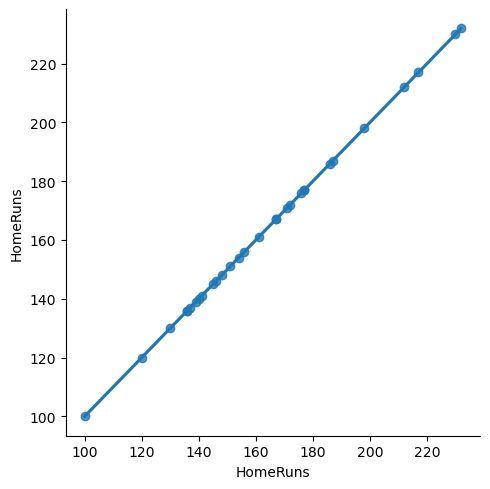

<Figure size 300x200 with 0 Axes>

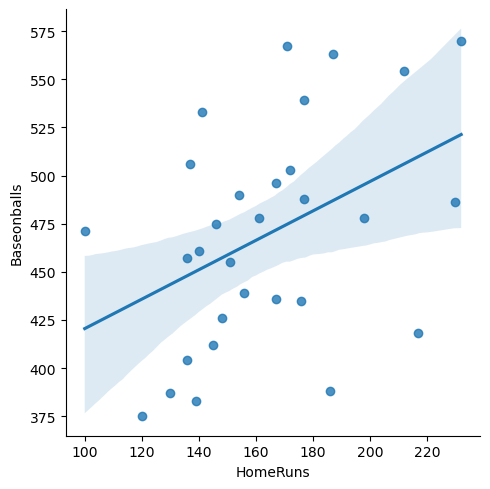

<Figure size 300x200 with 0 Axes>

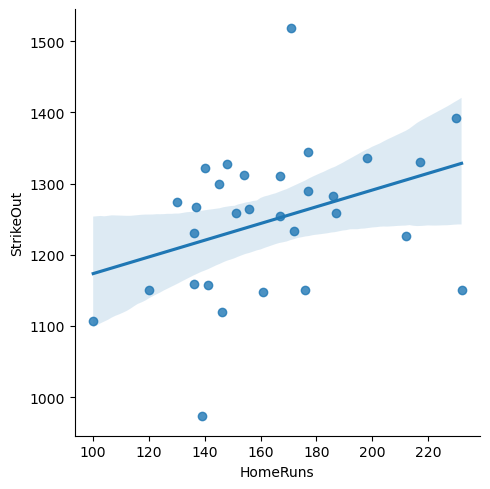

<Figure size 300x200 with 0 Axes>

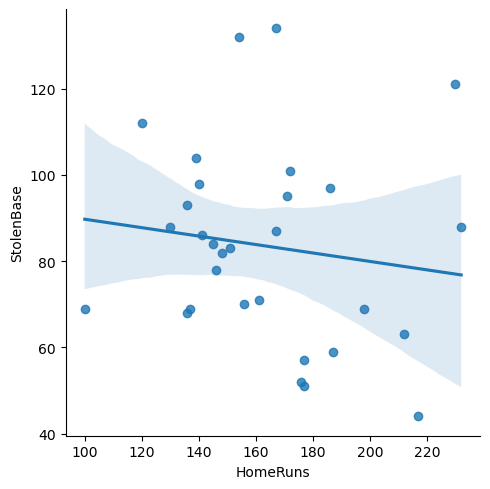

<Figure size 300x200 with 0 Axes>

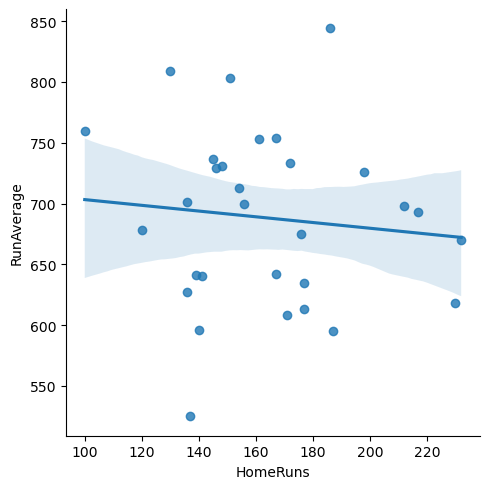

<Figure size 300x200 with 0 Axes>

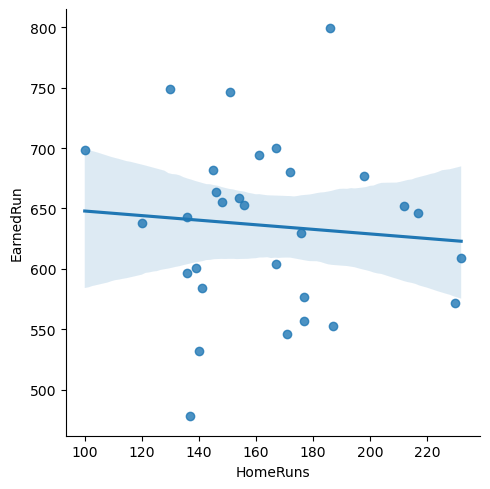

<Figure size 300x200 with 0 Axes>

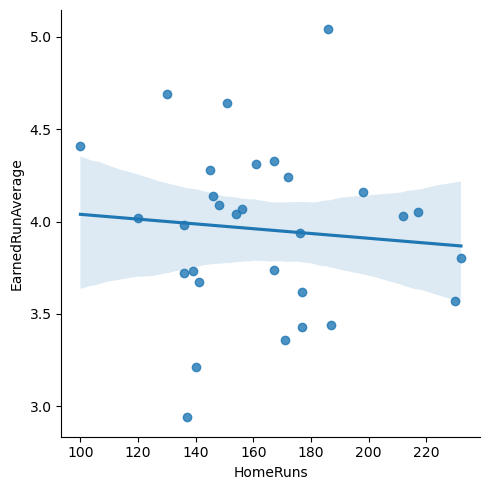

<Figure size 300x200 with 0 Axes>

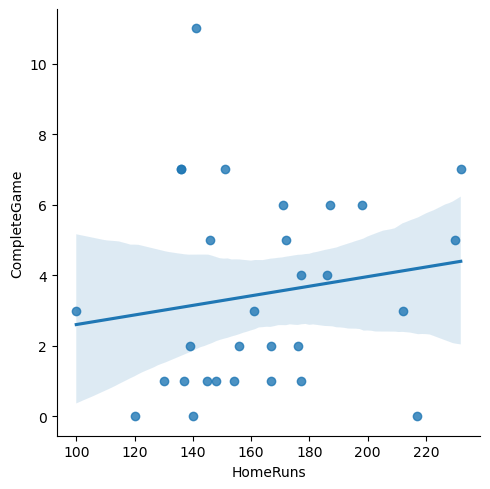

<Figure size 300x200 with 0 Axes>

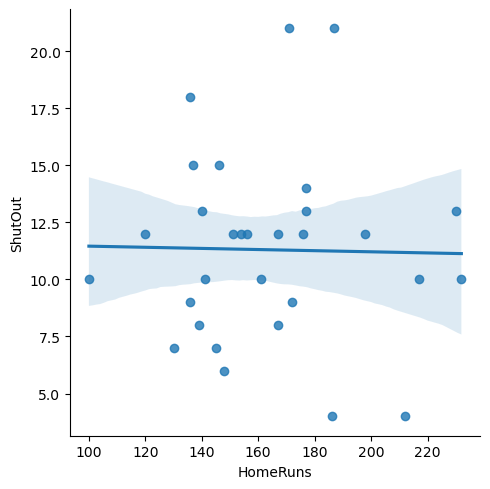

<Figure size 300x200 with 0 Axes>

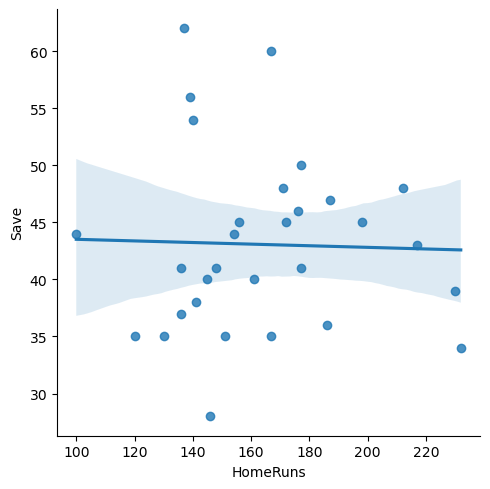

<Figure size 300x200 with 0 Axes>

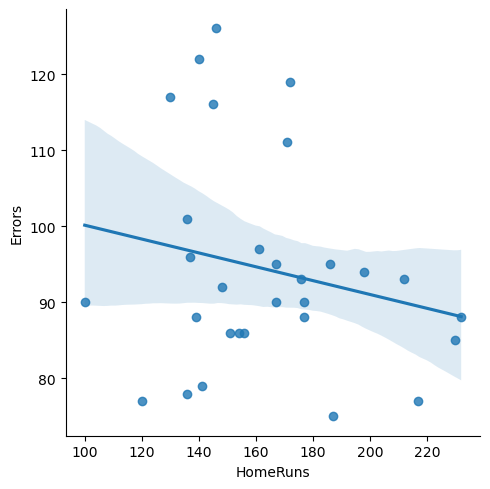

In [33]:
#Relation between HomeRuns
for i in  df.columns:
    plt.figure(figsize=(3,2),facecolor="white")
    sns.lmplot(x="HomeRuns" ,y=i, data=df, palette="bright")
    plt.xlabel("HomeRuns")
    plt.ylabel(i)
plt.show()


Observation: Relation between HomeRuns and Runscored

<Figure size 300x200 with 0 Axes>

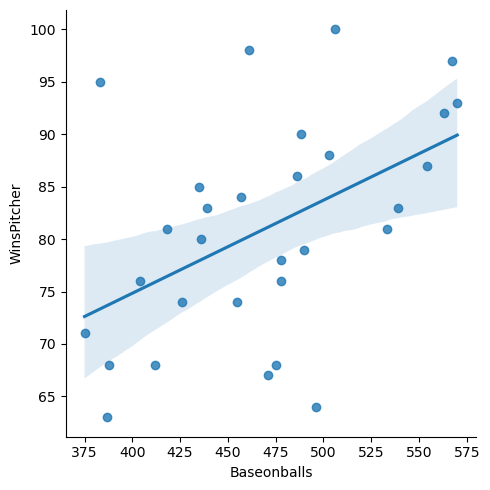

<Figure size 300x200 with 0 Axes>

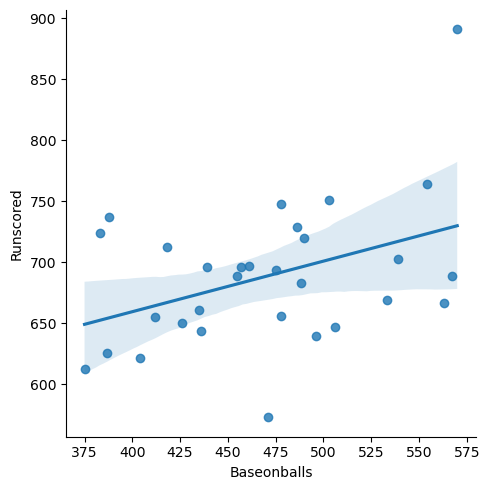

<Figure size 300x200 with 0 Axes>

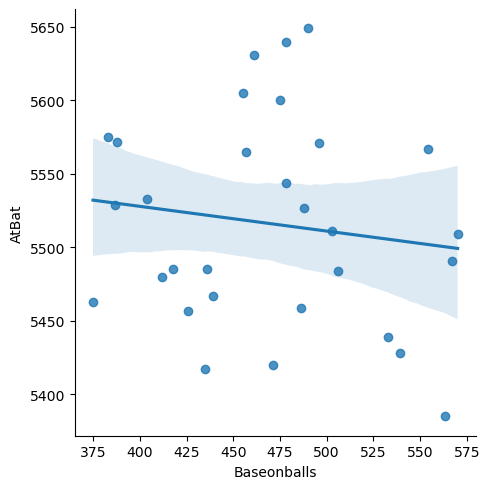

<Figure size 300x200 with 0 Axes>

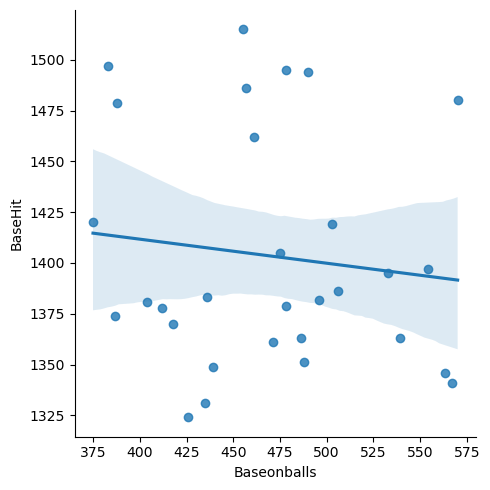

<Figure size 300x200 with 0 Axes>

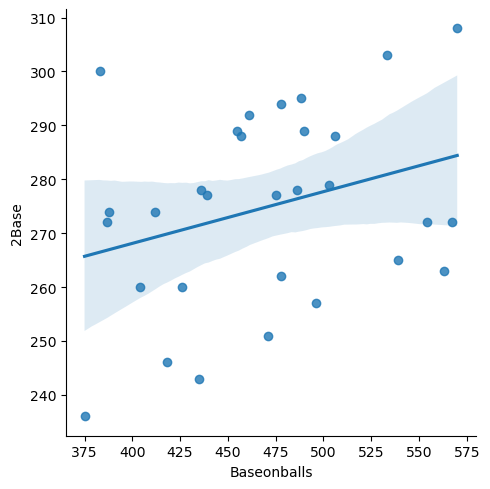

<Figure size 300x200 with 0 Axes>

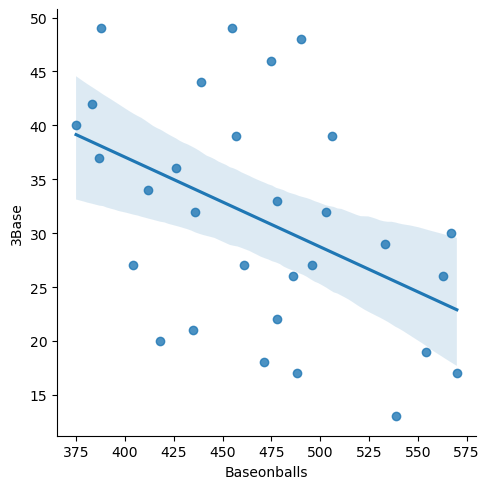

<Figure size 300x200 with 0 Axes>

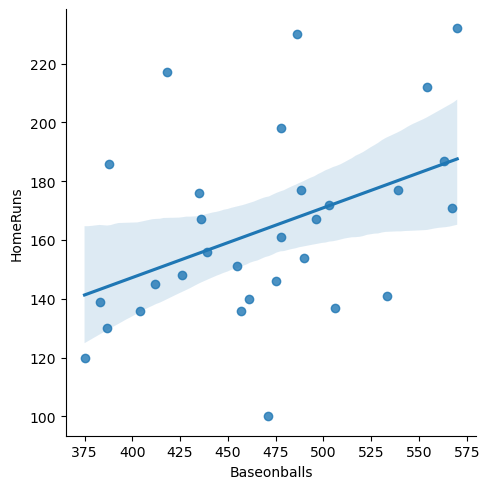

<Figure size 300x200 with 0 Axes>

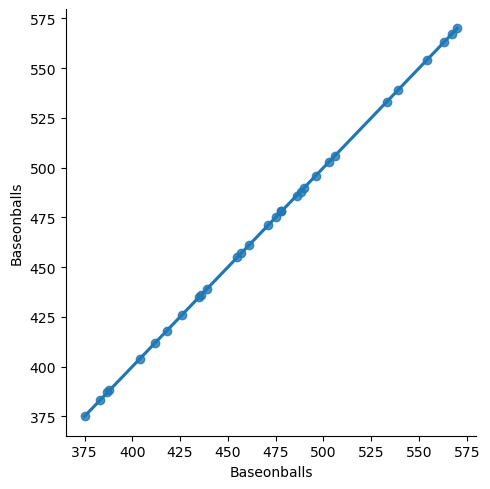

<Figure size 300x200 with 0 Axes>

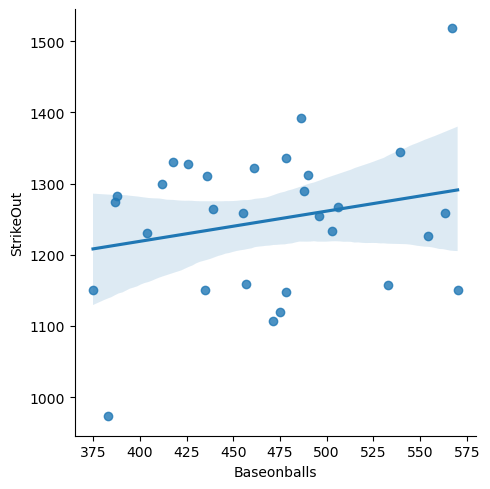

<Figure size 300x200 with 0 Axes>

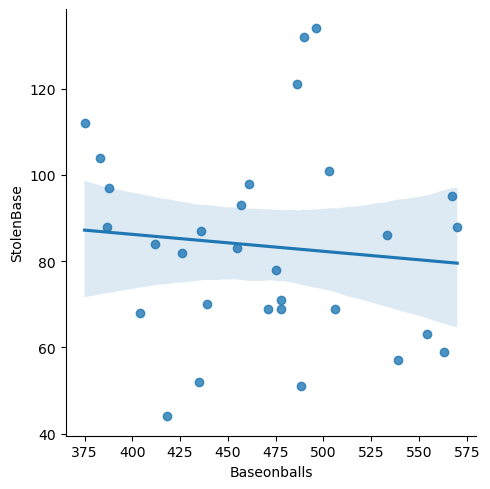

<Figure size 300x200 with 0 Axes>

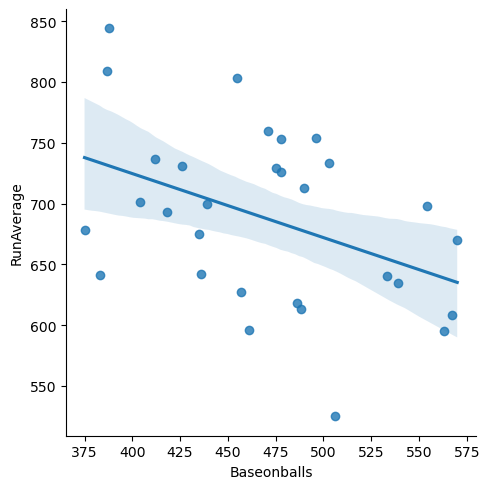

<Figure size 300x200 with 0 Axes>

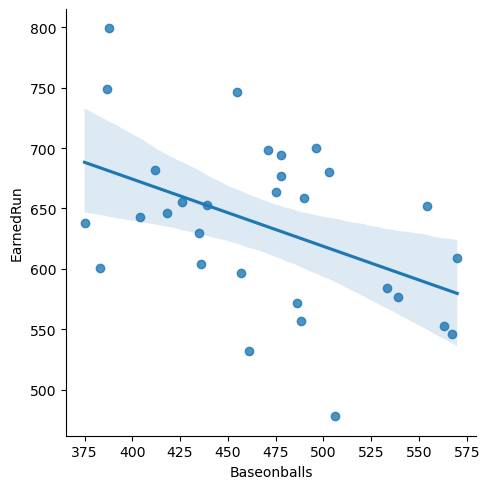

<Figure size 300x200 with 0 Axes>

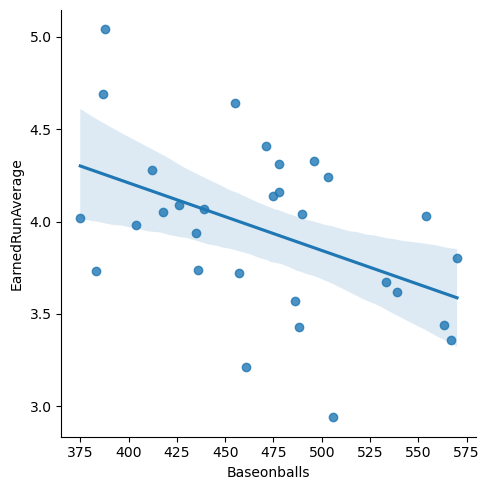

<Figure size 300x200 with 0 Axes>

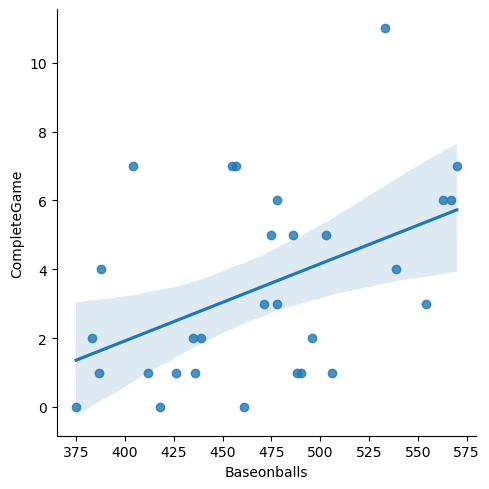

<Figure size 300x200 with 0 Axes>

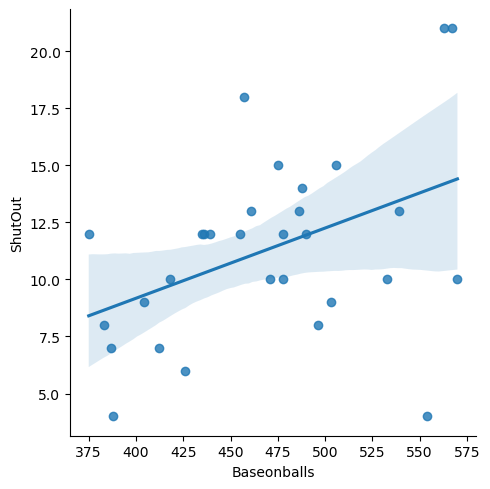

<Figure size 300x200 with 0 Axes>

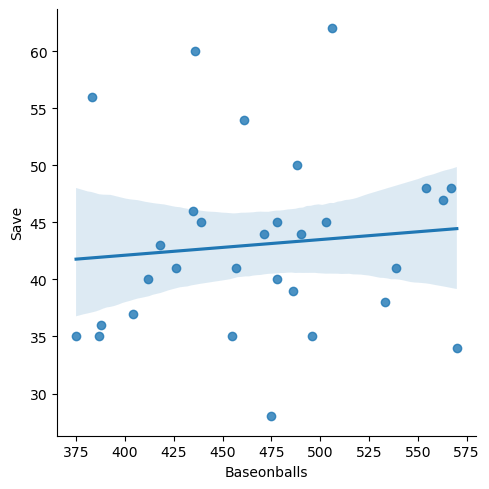

<Figure size 300x200 with 0 Axes>

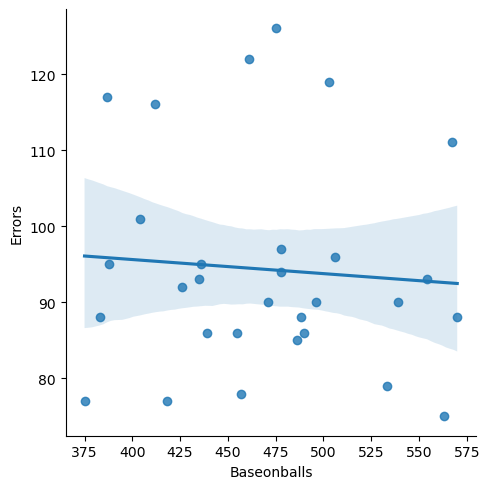

In [35]:
#Relation between Baseonballs
for i in  df.columns:
    plt.figure(figsize=(3,2),facecolor="white")
    sns.lmplot(x="Baseonballs" ,y=i, data=df, palette="bright")
    plt.xlabel("Baseonballs")
    plt.ylabel(i)
plt.show()


Observation: No relation

<Figure size 300x200 with 0 Axes>

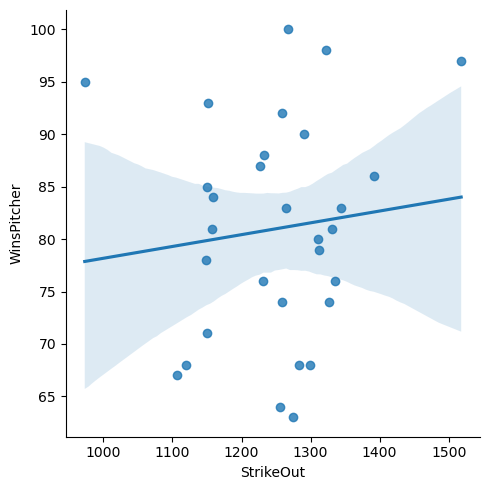

<Figure size 300x200 with 0 Axes>

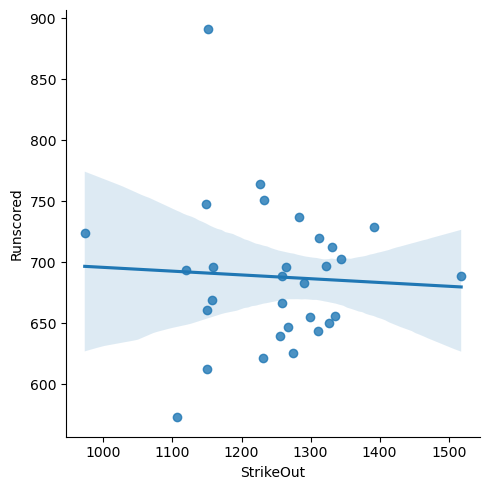

<Figure size 300x200 with 0 Axes>

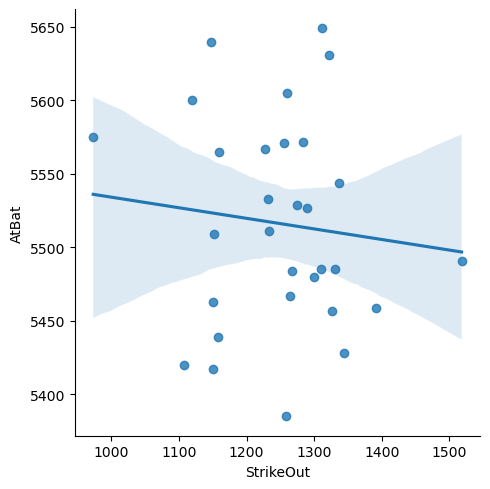

<Figure size 300x200 with 0 Axes>

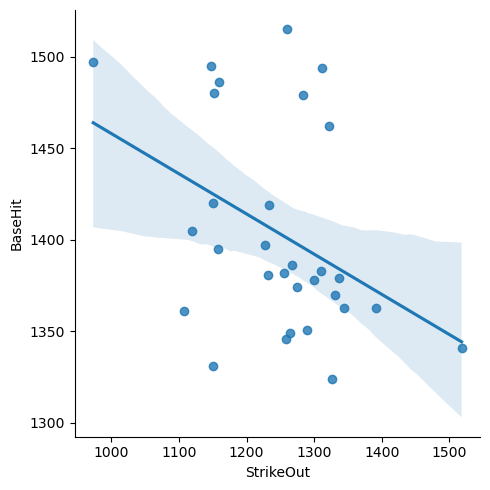

<Figure size 300x200 with 0 Axes>

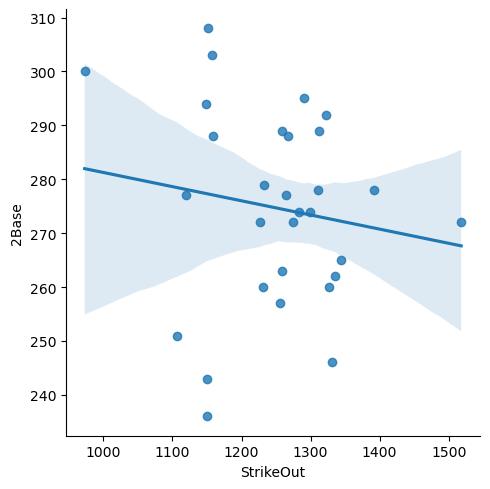

<Figure size 300x200 with 0 Axes>

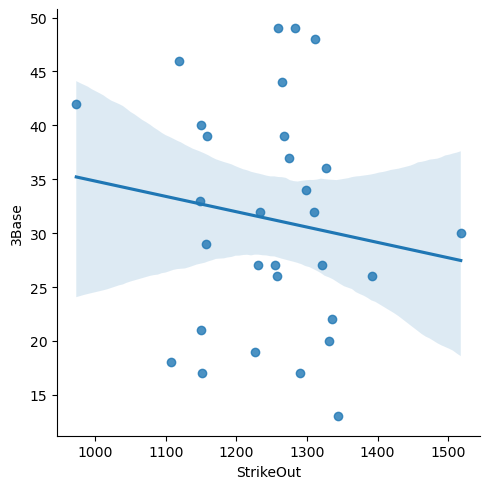

<Figure size 300x200 with 0 Axes>

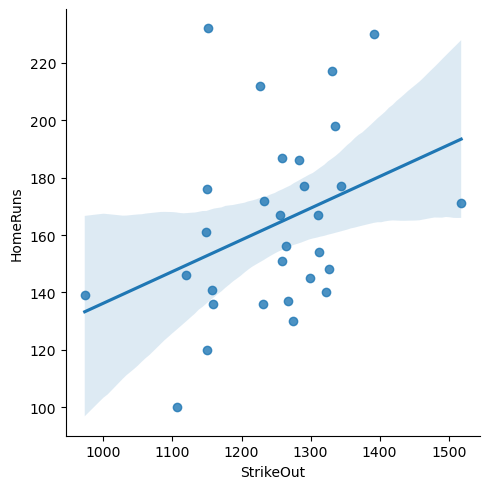

<Figure size 300x200 with 0 Axes>

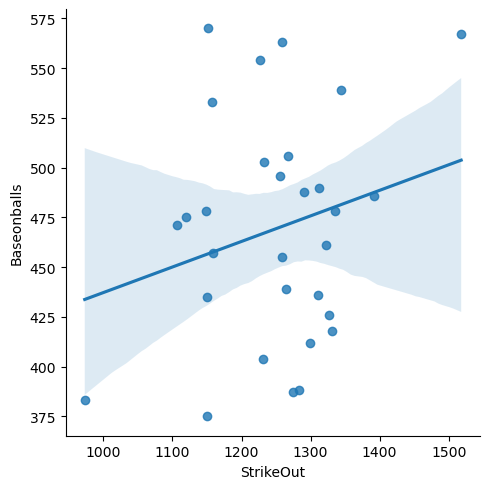

<Figure size 300x200 with 0 Axes>

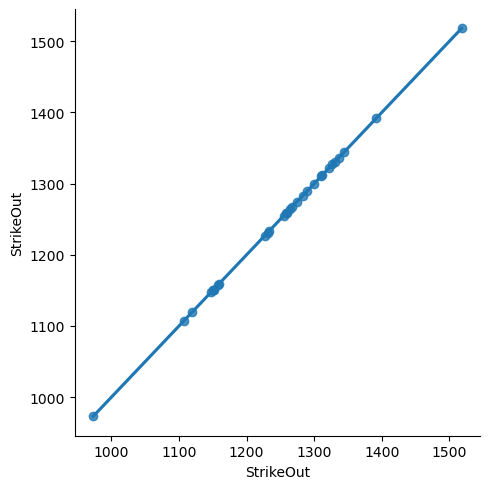

<Figure size 300x200 with 0 Axes>

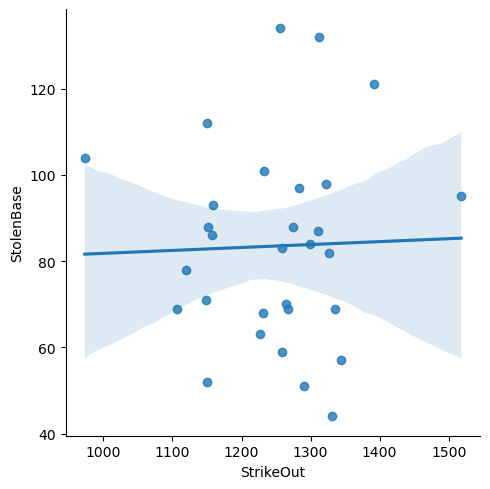

<Figure size 300x200 with 0 Axes>

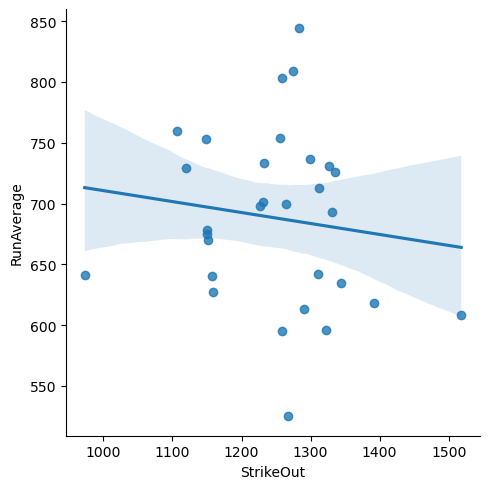

<Figure size 300x200 with 0 Axes>

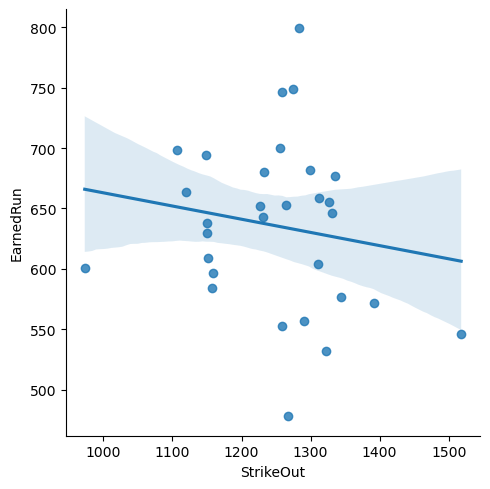

<Figure size 300x200 with 0 Axes>

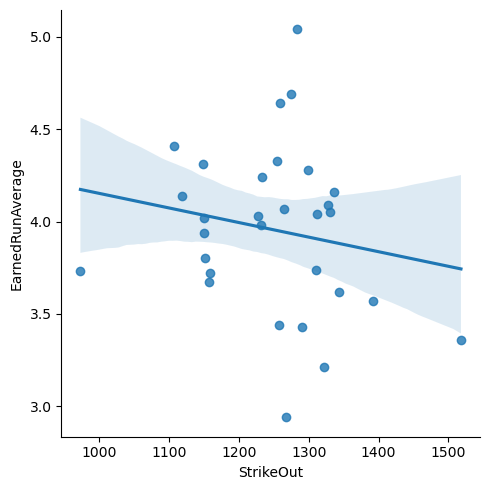

<Figure size 300x200 with 0 Axes>

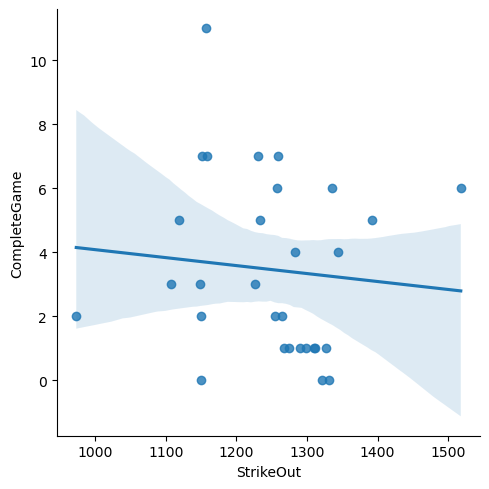

<Figure size 300x200 with 0 Axes>

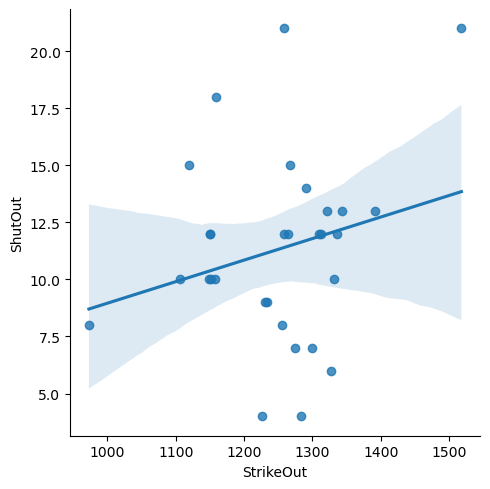

<Figure size 300x200 with 0 Axes>

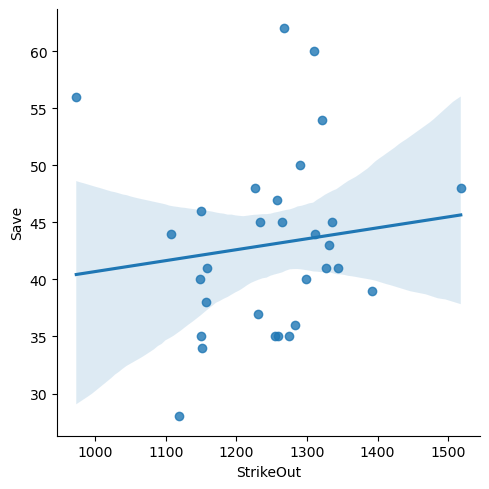

<Figure size 300x200 with 0 Axes>

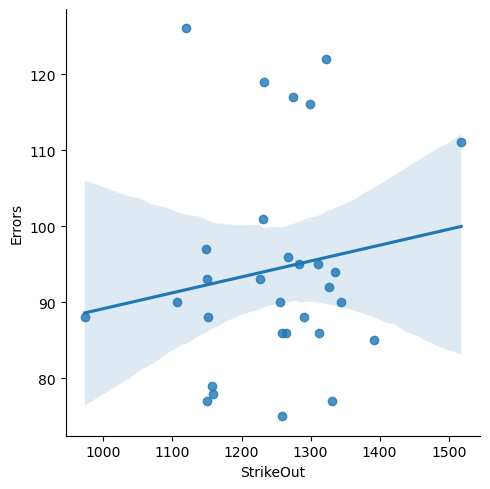

In [36]:
# Relation between StrikeOut and Others
for i in  df.columns:
    plt.figure(figsize=(3,2),facecolor="white")
    sns.lmplot(x="StrikeOut" ,y=i, data=df, palette="bright")
    plt.xlabel("StrikeOut")
    plt.ylabel(i)
plt.show()

Observation: No relation between StrikeOut and Others

<Figure size 300x200 with 0 Axes>

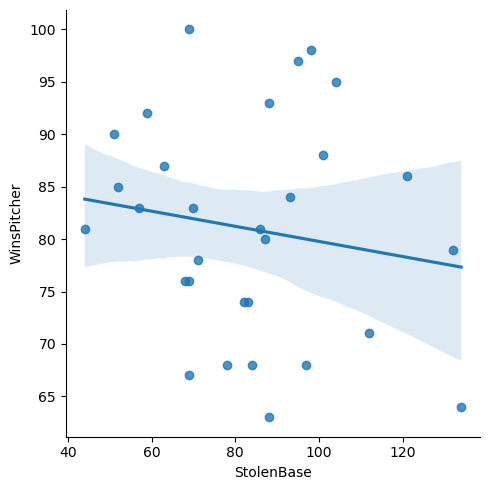

<Figure size 300x200 with 0 Axes>

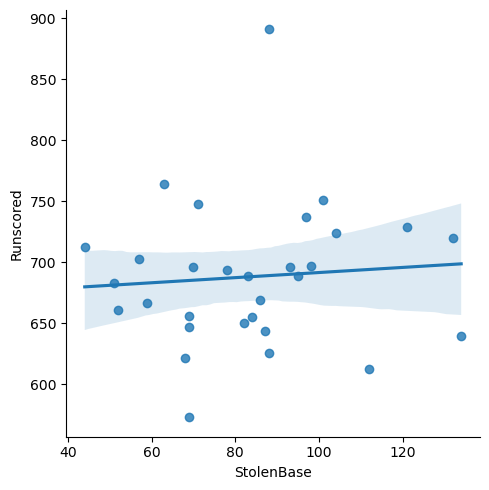

<Figure size 300x200 with 0 Axes>

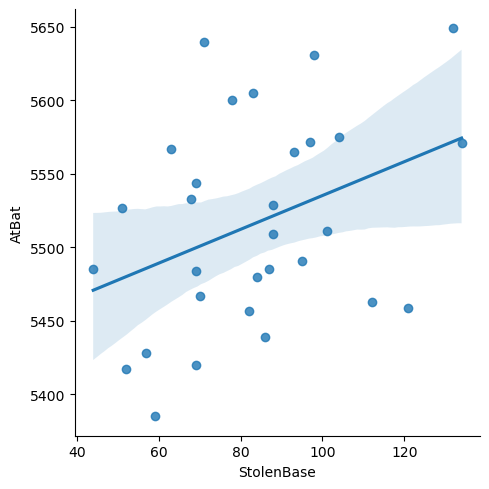

<Figure size 300x200 with 0 Axes>

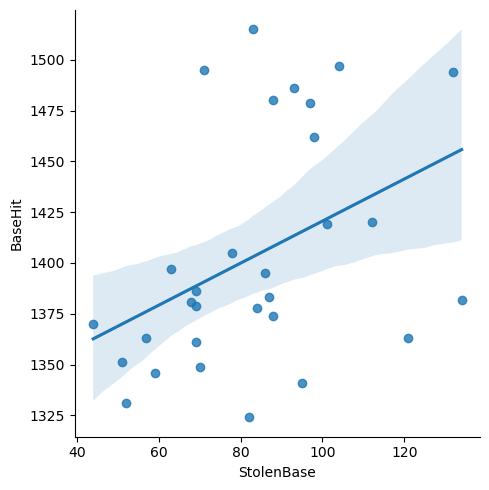

<Figure size 300x200 with 0 Axes>

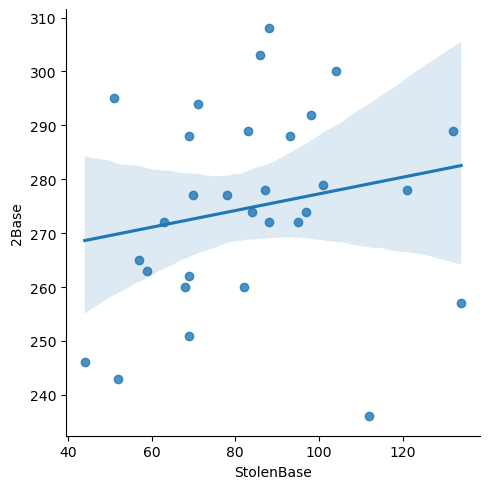

<Figure size 300x200 with 0 Axes>

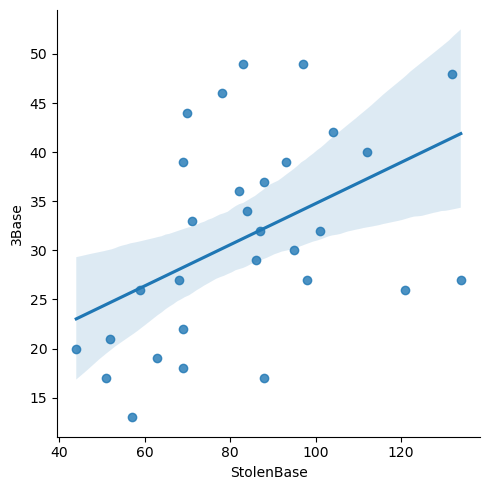

<Figure size 300x200 with 0 Axes>

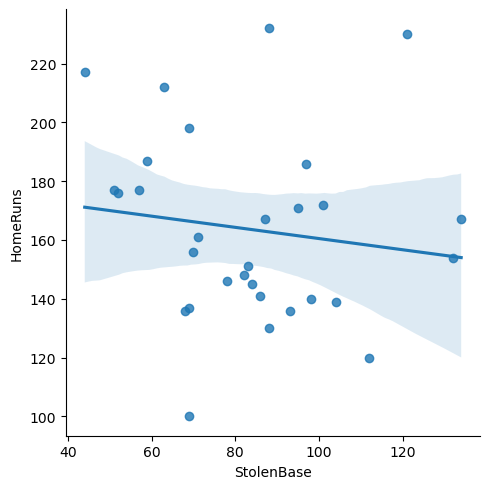

<Figure size 300x200 with 0 Axes>

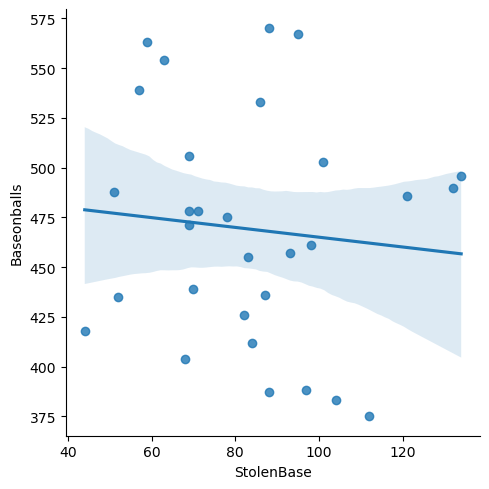

<Figure size 300x200 with 0 Axes>

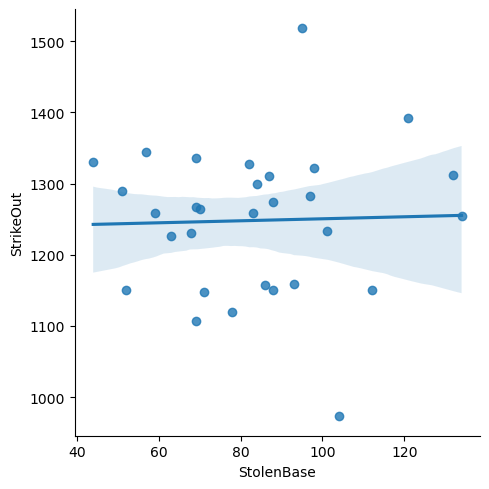

<Figure size 300x200 with 0 Axes>

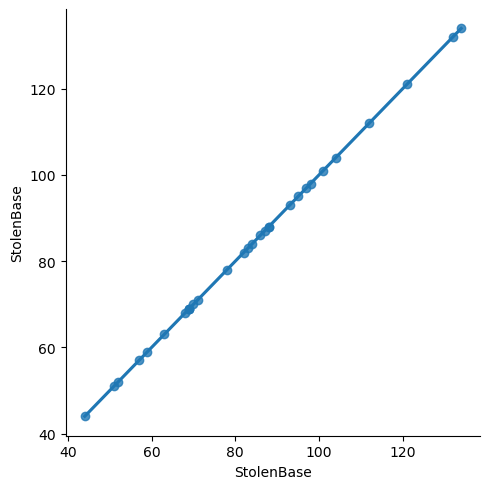

<Figure size 300x200 with 0 Axes>

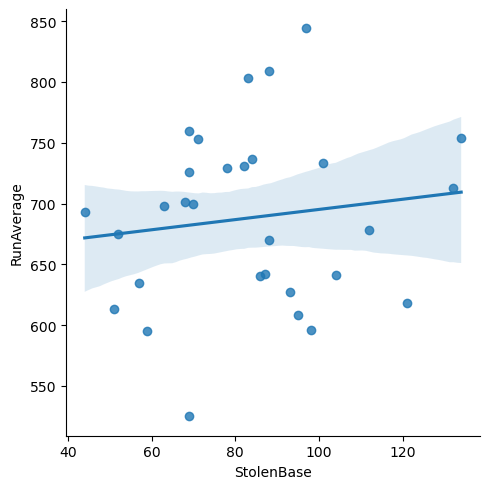

<Figure size 300x200 with 0 Axes>

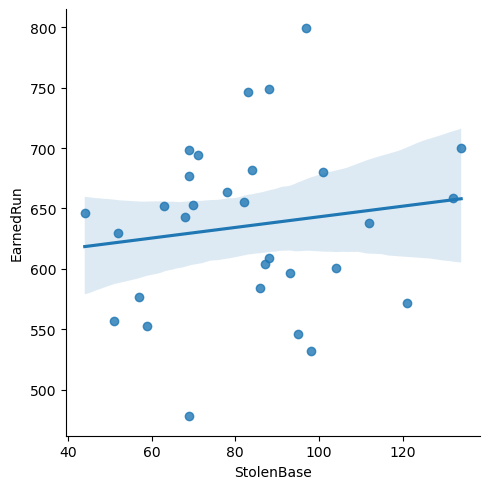

<Figure size 300x200 with 0 Axes>

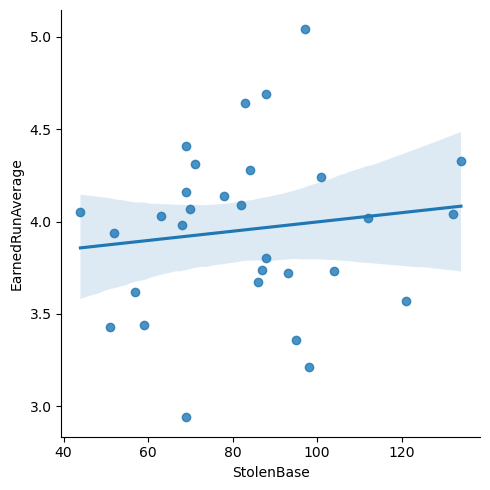

<Figure size 300x200 with 0 Axes>

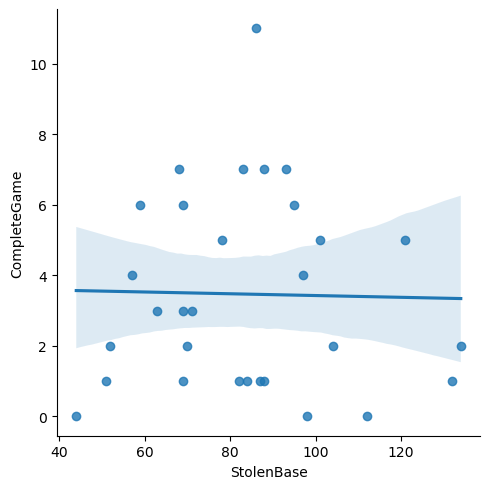

<Figure size 300x200 with 0 Axes>

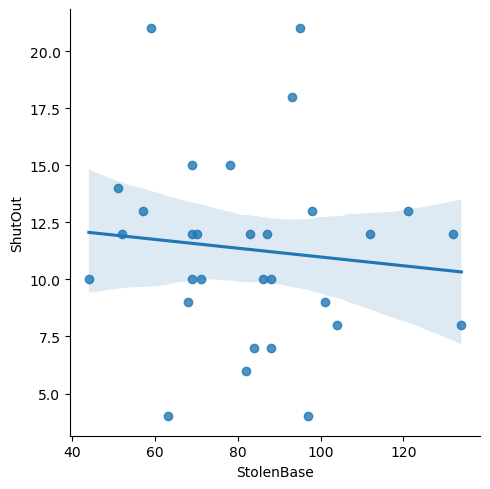

<Figure size 300x200 with 0 Axes>

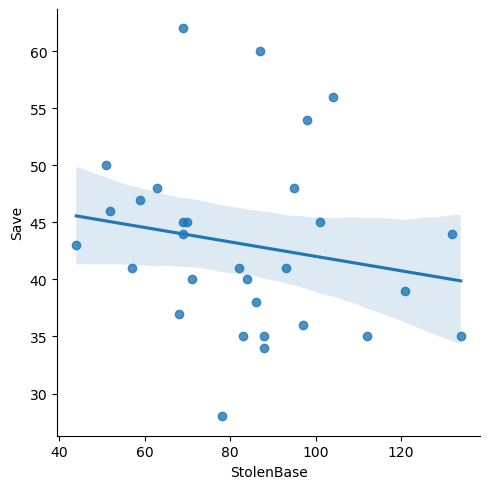

<Figure size 300x200 with 0 Axes>

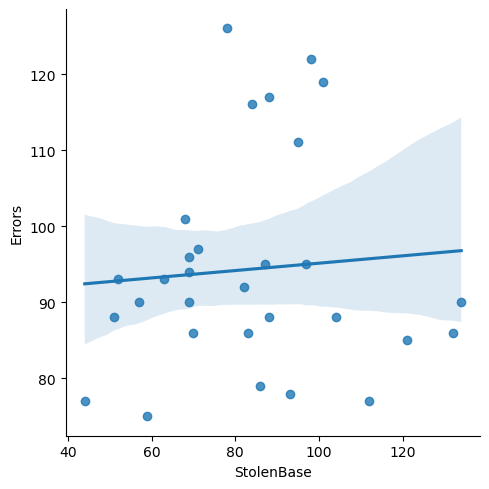

In [37]:
# Relation between StolenBase and Others
for i in  df.columns:
    plt.figure(figsize=(3,2),facecolor="white")
    sns.lmplot(x="StolenBase" ,y=i, data=df, palette="bright")
    plt.xlabel("StolenBase")
    plt.ylabel(i)
plt.show()

Obsevation: No relation between StolenBase and Others

# Multivariate analysis

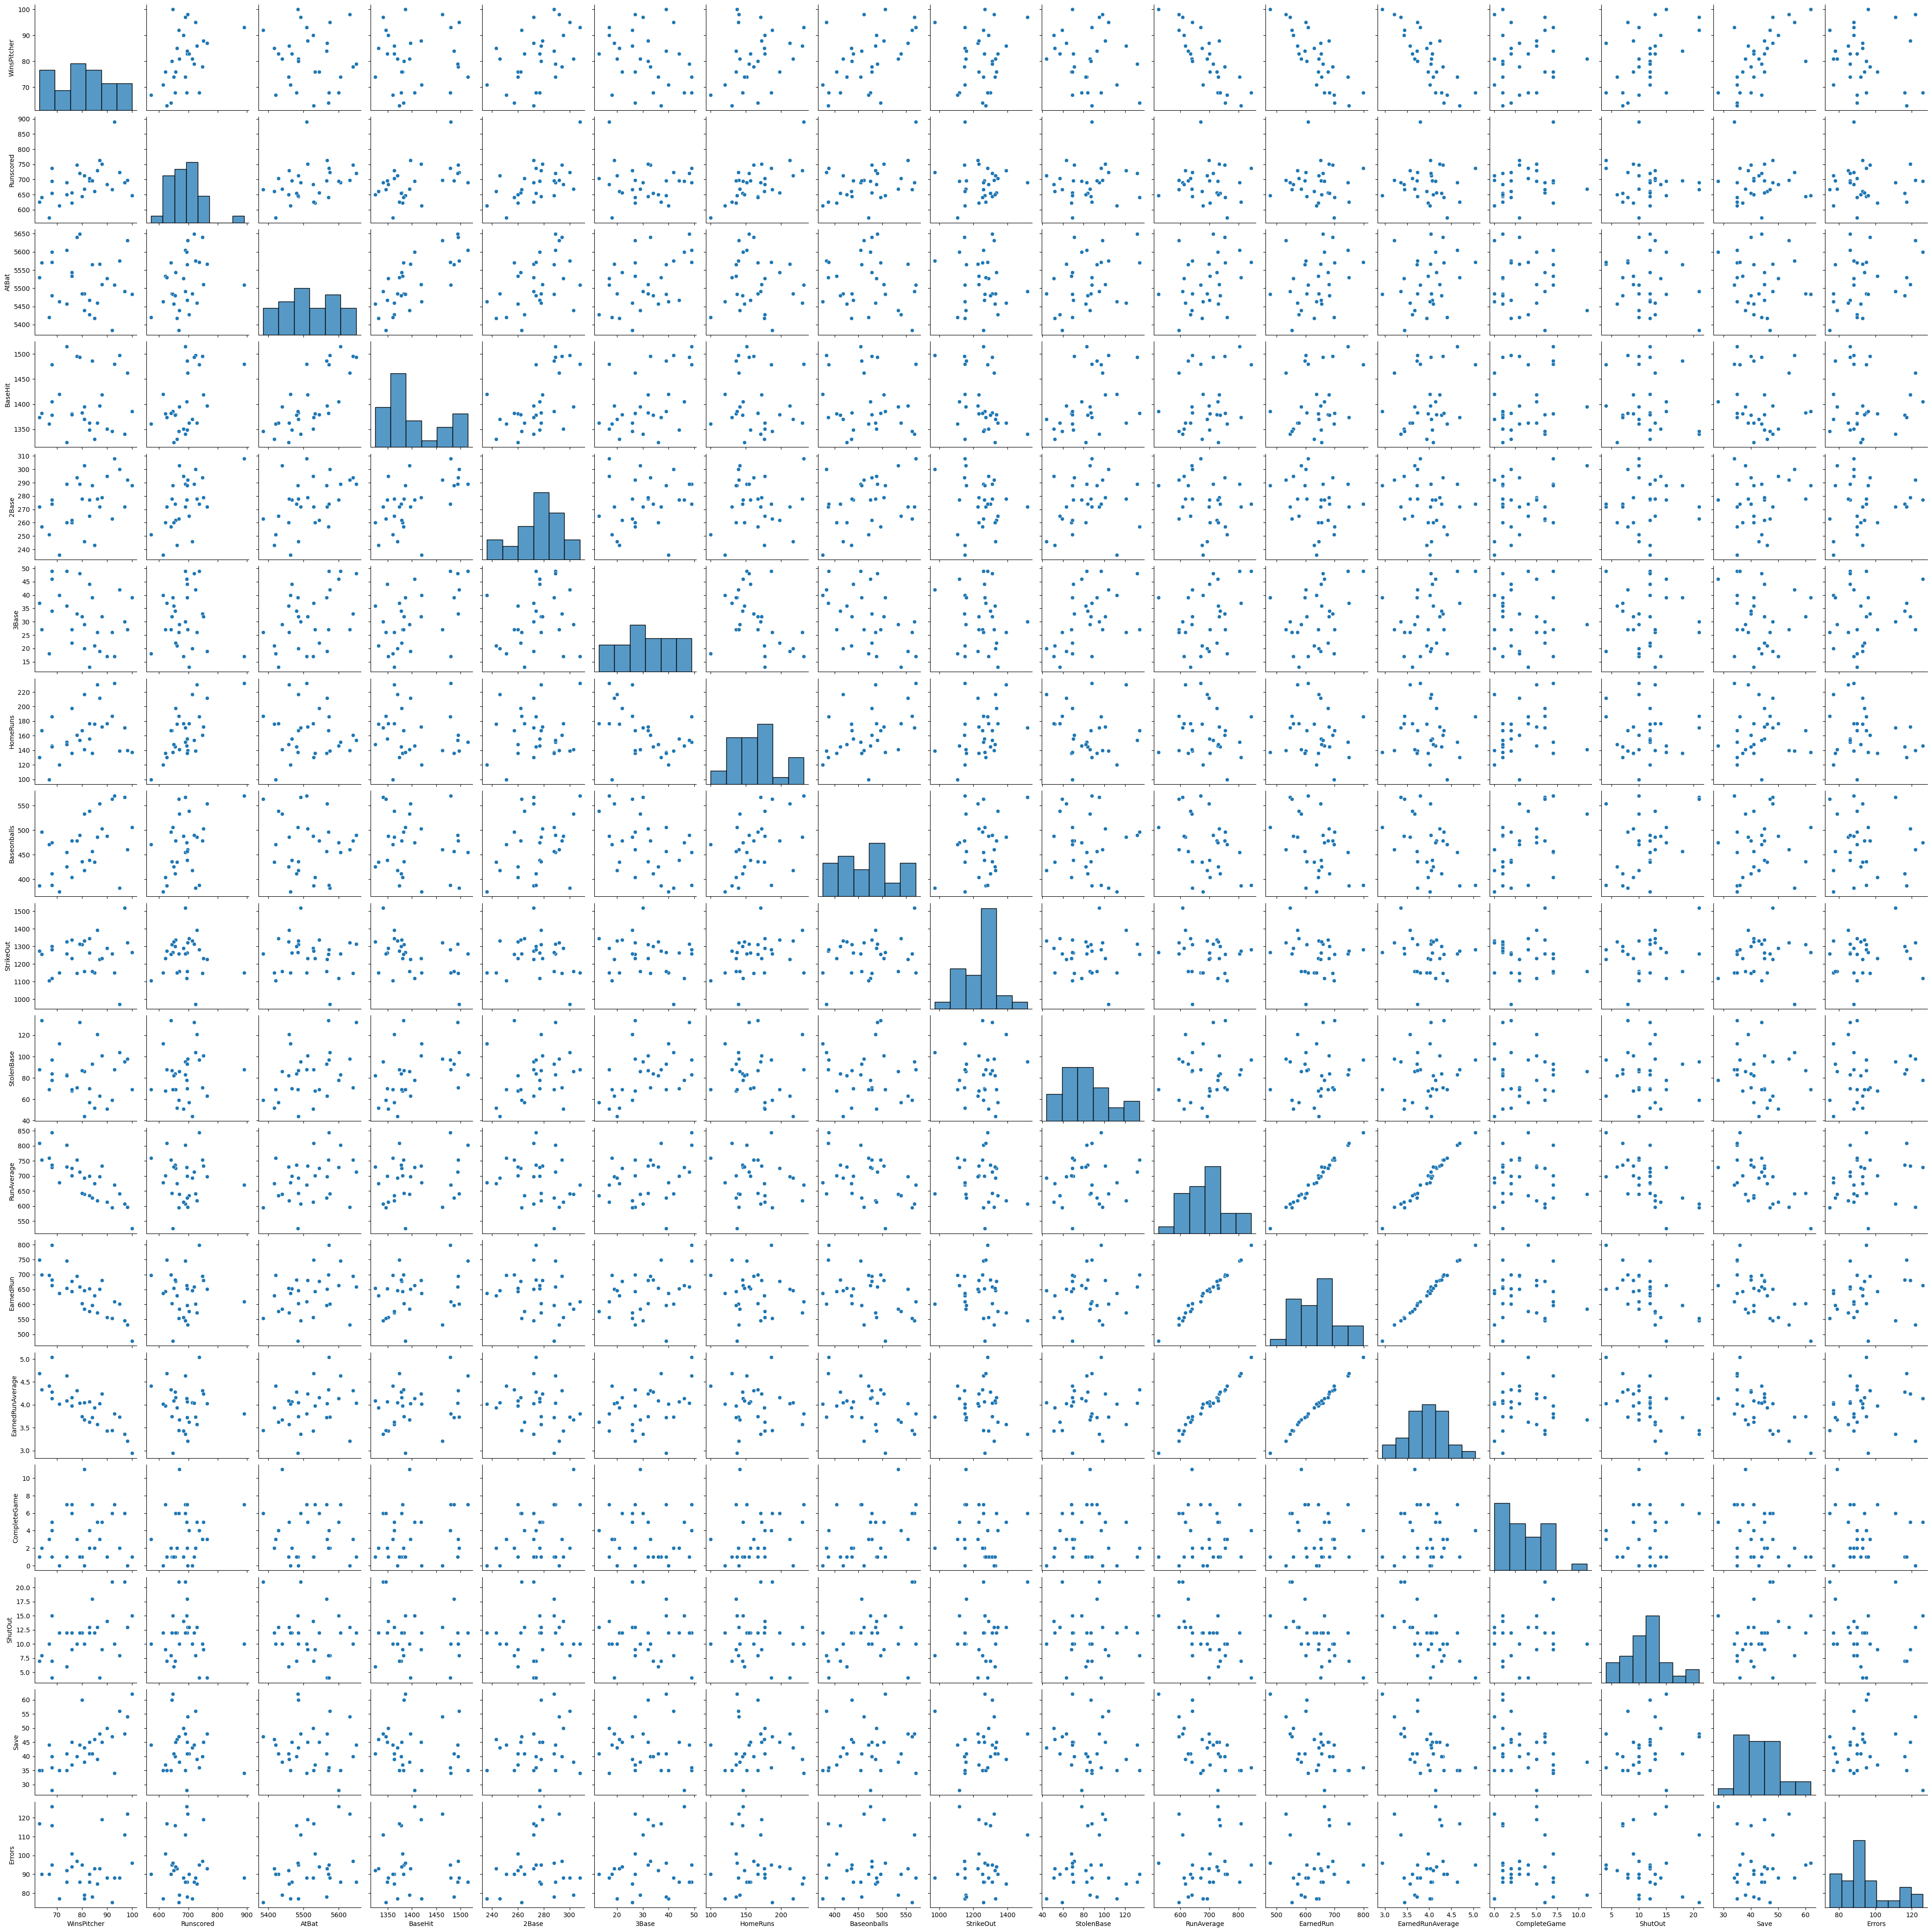

In [38]:
sns.pairplot(df)

# Checking for outliers

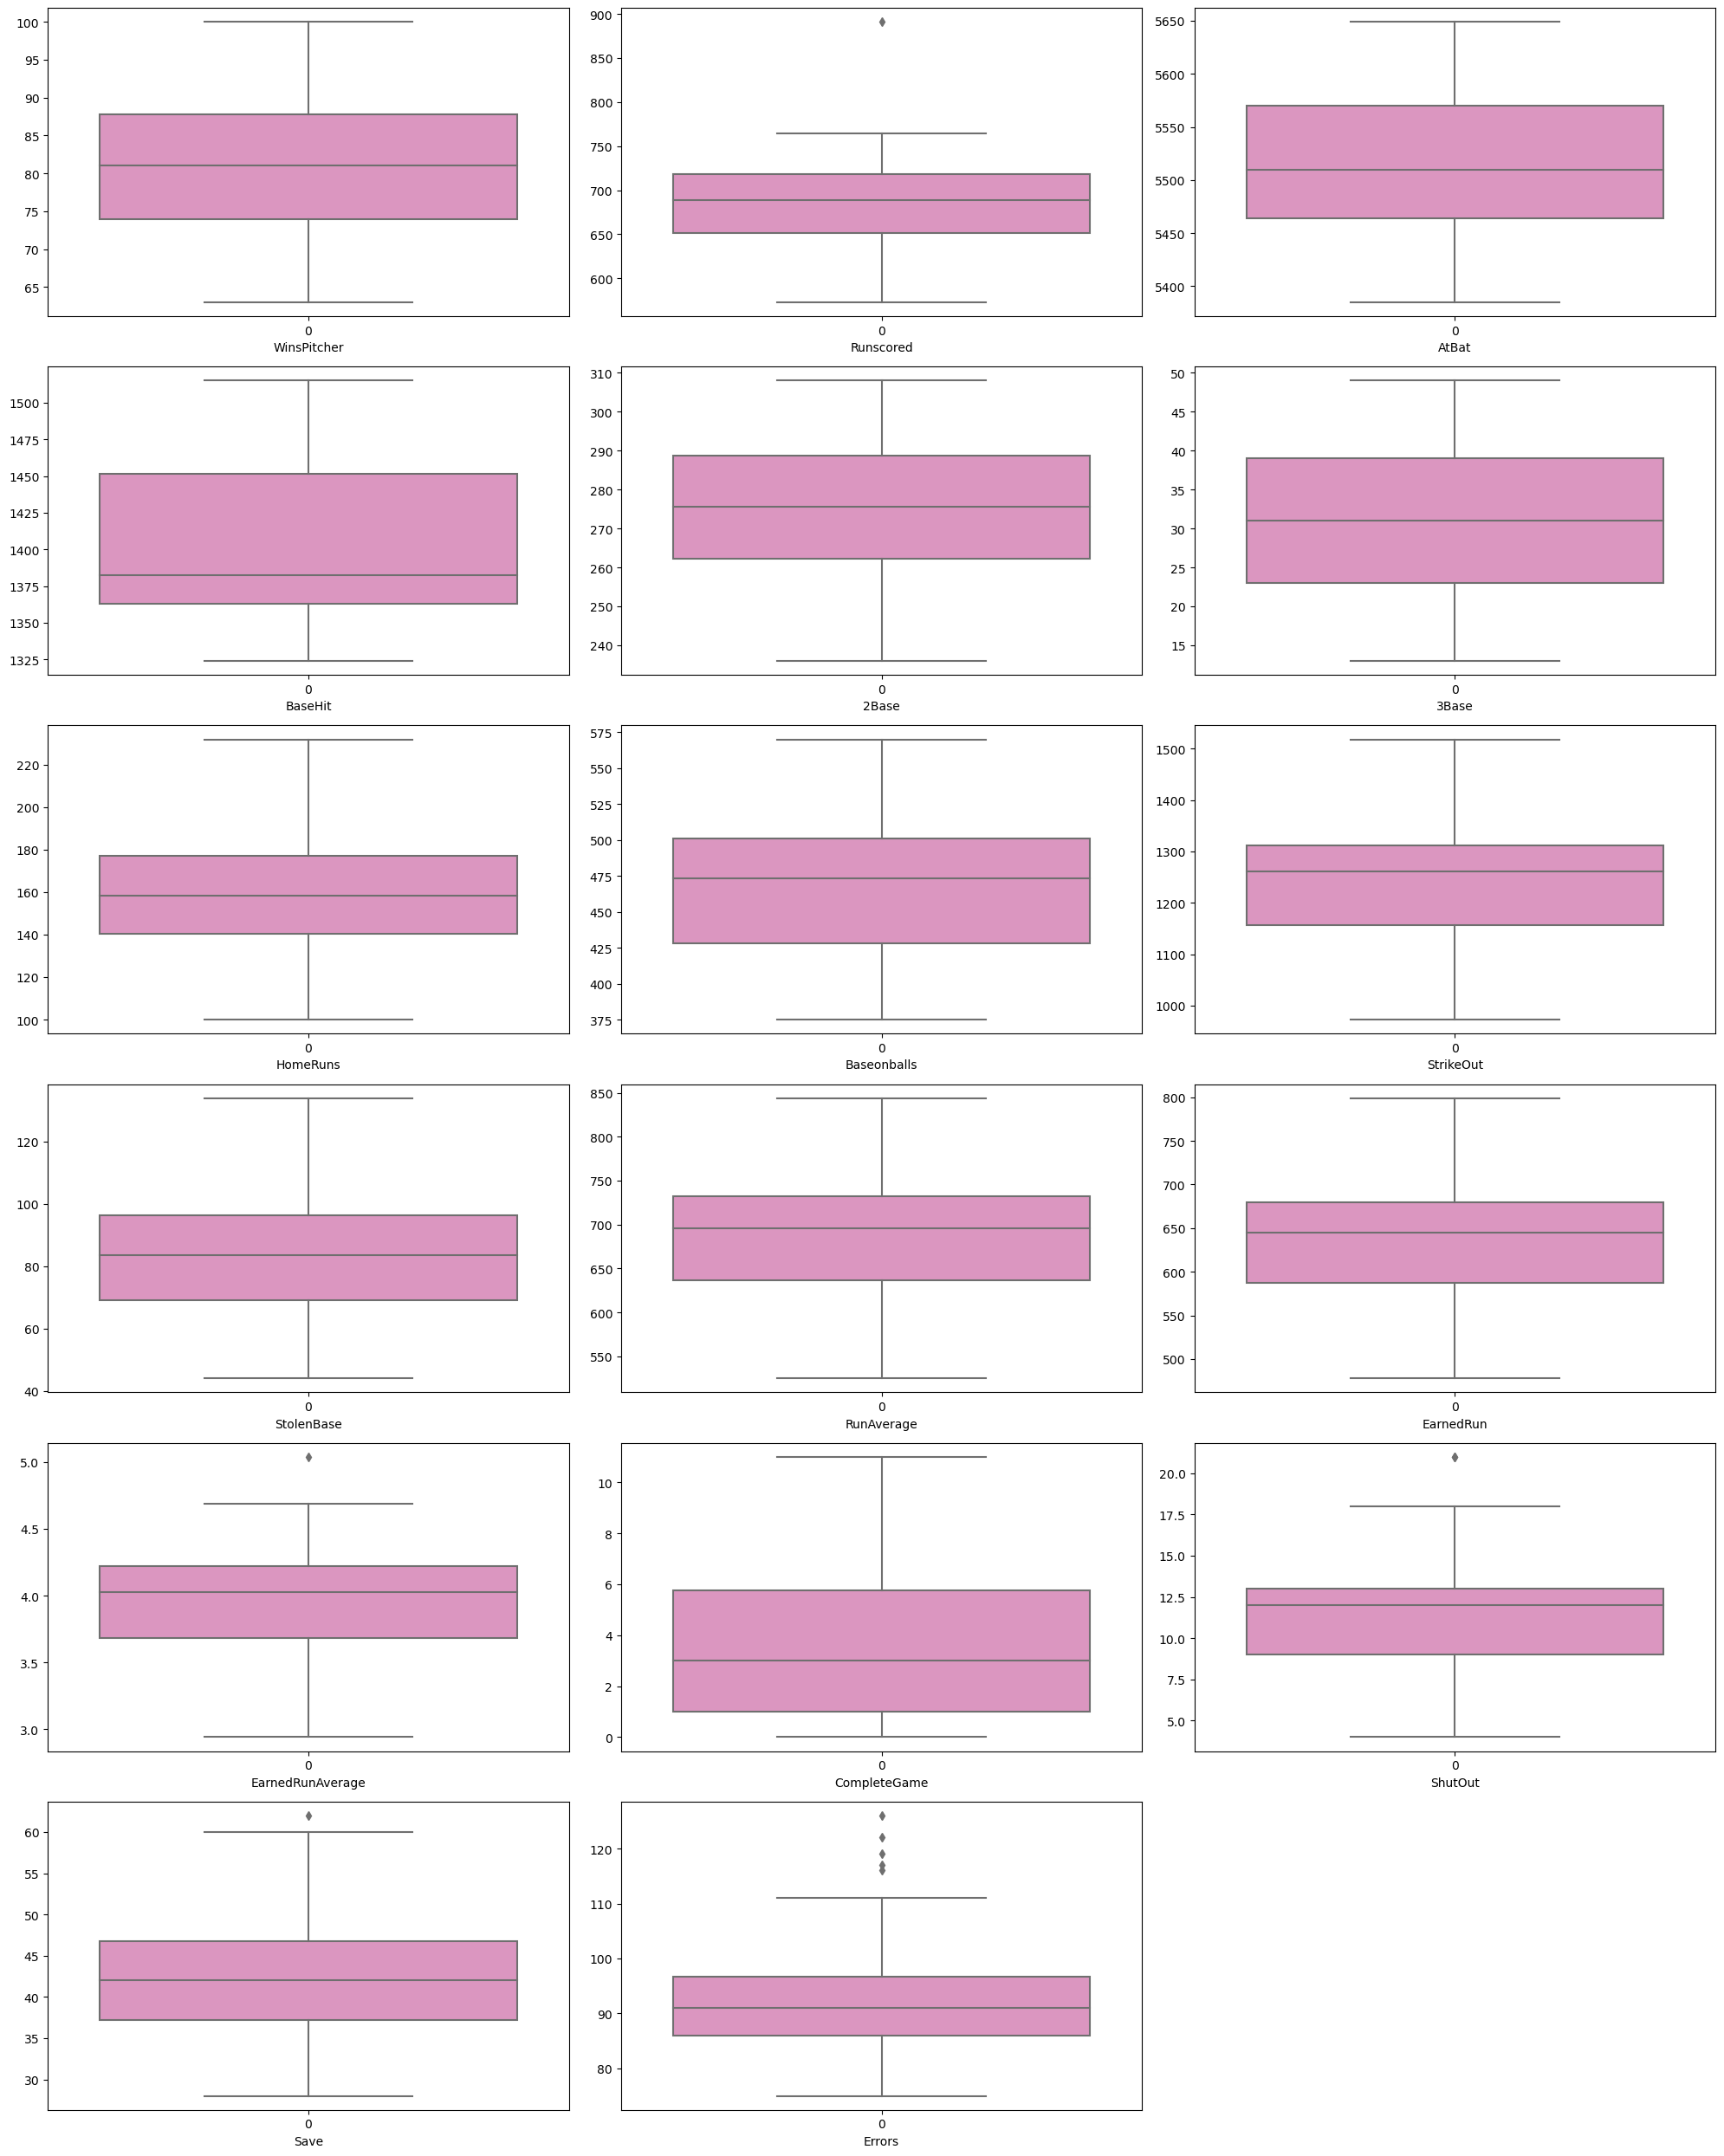

In [39]:
#Checking for Outliers using boxplot
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=17:
        plt.subplot(6,3,p)
        sns.boxplot(df[i],palette = "Set2_r")
        plt.xlabel(i)
    p+=1
    
plt.tight_layout()
plt.show()

In [40]:
# As we can seen there is outliers present in all columns except Mg

from scipy.stats import zscore
out_features=df.iloc[:,:]
z=np.abs(zscore(out_features))
z


WinsPitcher  Runscored     AtBat   BaseHit     2Base     3Base  HomeRuns  \
0      1.365409   0.619078  0.847731  1.663685  1.420173  1.041193  0.787299   
1      0.197838   0.134432  0.711094  0.970681  0.127403  1.235809  0.243967   
2      0.003243   0.332906  1.115233  0.151891  1.588795  0.223808  0.723377   
3      0.483244   1.146419  0.241522  0.401088  0.828122  0.418423  0.883181   
4      0.677839   0.013270  1.280738  1.984081  0.801892  1.722347  0.403770   
5      1.170814   3.509647  0.104884  1.361089  1.869832  1.391501  2.185047   
6      0.587028   1.311430  0.732263  0.116292  0.153633  1.196885  1.545833   
7      0.003243   0.428681  0.451289  0.596886  1.615025  1.099578  1.705636   
8      0.094054   0.765626  0.451289  0.365489  0.183611  0.068115  0.107601   
9      0.288649   1.034489  1.785913  1.628086  1.082929  0.165423  0.084163   
10     0.684326   1.086415  0.076017  0.275303  0.239818  0.068115  0.267405   
11     0.489731   0.705622  0.826562  0.721484  0.183611  0.515731  2.121125   
12     0.392433   0.471376  1.432772  1.291077  1.783647  1.002270  0.395247   
13     0.483244   0.557920  0.400291  0.436688  0.715707  0.904962  1.098383   
14     1.261625   0.099814  1.208570  0.026106  0.127403  1.430424  0.563574   
15     1.851896   0.713699  0.465723  0.312089  0.745685  0.749270  0.851220   
16     1.657301   0.151740  1.656011  1.040693  0.970514  0.418423  0.755338   
17     1.560004   0.013270  0.364688  1.113079  0.153633  0.126500  0.235444   
18     1.261625   0.575229  0.523457  0.454487  0.041219  0.262731  0.595534   
19     1.650815   0.834861  0.789997  0.383288  0.996744  0.418423  0.107601   
20     0.878921   0.090583  0.154920  0.935081  1.139136  1.391501  0.427208   
21     0.197838   0.255593  1.274002  0.721484  0.547085  1.780732  0.427208   
22     0.969732   1.302198  0.768828  0.293103  2.177099  0.846578  1.394552   
23     1.358922   1.994550  1.389471  0.757084  1.333988  1.294193  2.033766   
24     1.748112   1.077184  0.183787  0.525687  0.153633  0.554654  1.074945   
25     1.073516   0.367523  1.894646  1.024080  0.659500  0.515731  0.746815   
26     0.295136   0.134432  0.703396  1.467888  0.745685  0.749270  0.883181   
27     0.191352   0.549843  1.915815  1.610286  0.801892  1.625040  0.307888   
28     0.677839   0.661773  0.855429  1.415675  0.828122  0.457346  0.499652   
29     1.261625   0.844092  0.804431  1.343289  0.041219  1.722347  0.714854   

    Baseonballs  StrikeOut  StolenBase  RunAverage  EarnedRun  \
0      1.534902   2.697630    0.913883    0.666234   0.505110   
1      0.536592   0.154878    0.601826    0.165971   0.248930   
2      1.139144   0.893982    0.111449    0.680339   0.751623   
3      1.160536   0.168602    0.690985    0.180076   0.103922   
4      0.251360   0.105866    0.022290    1.618803   1.597501   
5      1.798742   0.952796    0.200609    0.257184   0.389104   
6      1.513510   0.207812    0.913883    0.137760   0.234429   
7      0.910958   0.811641    1.760897    0.067235   0.147424   
8      0.590073   0.605790    0.156029    0.652129   0.461608   
9      0.158660   0.982204    0.557246    0.913544   0.843461   
10     0.604334   0.148997    0.780144    0.631441   0.640451   
11     0.301276   1.409590    1.671738    0.990653   0.925632   
12     0.607900   0.962599    1.404260    0.186658   0.084588   
13     0.158660   0.860654    0.646405    0.532705   0.596948   
14     0.105179   1.266474    0.245188    0.575021   0.408438   
15     0.657815   0.184286    0.646405    2.302433   2.288705   
16     0.144398   0.723420    0.646405    1.300966   1.505663   
17     1.745261   2.644696    0.512666    1.131704   1.302652   
18     1.017920   0.497964    0.022290    0.687862   0.669452   
19     0.479546   0.066657    2.251273    0.927650   0.930466   
20     0.336930   0.409742    1.448839    1.061179   1.143144   
21     1.246105   0.939073    1.181361    0.750865   0.853129   
22     1.677518   0.962599  

In [41]:
#threshold z>3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [42]:
z.iloc[5,1]

3.5096470447193067

In [43]:
df1=df[(z<3).all(axis=1)]

In [44]:
df1.shape

(29, 17)

In [45]:
print("Old Data Frame:",df.shape[0])
print("New Data Frame:",df1.shape[0])

Old Data Frame: 30
New Data Frame: 29


In [46]:
print("The loss of data in percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

The loss of data in percentage 3.3333333333333335


# Checking for Skewness

In [47]:
df1.skew()

WinsPitcher         0.119013
Runscored          -0.215364
AtBat               0.169573
BaseHit             0.783772
2Base              -0.335304
3Base               0.090124
HomeRuns            0.450862
Baseonballs         0.151193
StrikeOut          -0.233815
StolenBase          0.494966
RunAverage          0.018155
EarnedRun           0.018461
EarnedRunAverage    0.016693
CompleteGame        0.854980
ShutOut             0.526943
Save                0.627480
Errors              0.840271
dtype: float64

As there is not much skewdness presents so data distribution ideal for model training as there is high variance and low biasness so it will overcome the overfitting  problem and underfitting can be check by setting model parameter 

# Correlation b/w target variable and independent variable

# Multicollinearity

In [48]:
cor=df1.corr()
cor

WinsPitcher  Runscored     AtBat   BaseHit     2Base  \
WinsPitcher          1.000000   0.390451 -0.085780 -0.018360  0.384886   
Runscored            0.390451   1.000000  0.438022  0.433525  0.469293   
AtBat               -0.085780   0.438022  1.000000  0.769159  0.490752   
BaseHit             -0.018360   0.433525  0.769159  1.000000  0.528016   
2Base                0.384886   0.469293  0.490752  0.528016  1.000000   
3Base               -0.206737   0.134204  0.445604  0.582024  0.342419   
HomeRuns             0.245697   0.586894 -0.064653 -0.218711 -0.098695   
Baseonballs          0.447513   0.258450 -0.137850 -0.222271  0.211243   
StrikeOut            0.156469   0.081158 -0.111243 -0.371861 -0.096772   
StolenBase          -0.169503   0.075323  0.373674  0.417877  0.194308   
RunAverage          -0.823176  -0.013858  0.315499  0.244606 -0.215196   
EarnedRun           -0.815308   0.007727  0.309146  0.280571 -0.224993   
EarnedRunAverage    -0.826952  -0.009122  0.254872  0.256458 -0.248212   
CompleteGame         0.029594   0.101438 -0.078511  0.092577  0.244856   
ShutOut              0.497526  -0.085108 -0.198872 -0.135116  0.084060   
Save                 0.749290   0.061381 -0.113342 -0.079814  0.269999   
Errors              -0.072858   0.043123  0.316297 -0.011945  0.145032   

                     3Base  HomeRuns  Baseonballs  StrikeOut  StolenBase  \
WinsPitcher      -0.206737  0.245697     0.447513   0.156469   -0.169503   
Runscored         0.134204  0.586894     0.258450   0.081158    0.075323   
AtBat             0.445604 -0.064653    -0.137850  -0.111243    0.373674   
BaseHit           0.582024 -0.218711    -0.222271  -0.371861    0.417877   
2Base             0.342419 -0.098695     0.211243  -0.096772    0.194308   
3Base             1.000000 -0.369299    -0.404852  -0.196586    0.483818   
HomeRuns         -0.369299  1.000000     0.336814   0.479914   -0.166072   
Baseonballs      -0.404852  0.336814     1.000000   0.315566   -0.117622   
StrikeOut        -0.196586  0.479914     0.315566   1.000000    0.038188   
StolenBase        0.483818 -0.166072    -0.117622   0.038188    1.000000   
RunAverage        0.312750 -0.092586    -0.425381  -0.140570    0.134315   
EarnedRun         0.333731 -0.062094    -0.455832  -0.177655    0.146243   
EarnedRunAverage  0.325883 -0.070756    -0.465794  -0.195362    0.128848   
CompleteGame     -0.003733  0.065978     0.417437  -0.053075   -0.030708   
ShutOut          -0.058896  0.005546     0.473922   0.231230   -0.104602   
Save             -0.210627  0.066984     0.187101   0.091394   -0.179741   
Errors            0.108610 -0.189790    -0.050114   0.142740    0.082702   

                  RunAverage  EarnedRun  EarnedRunAverage  CompleteGame  \
WinsPitcher        -0.823176  -0.815308         -0.826952      0.029594   
Runscored          -0.013858   0.007727         -0.009122      0.101438   
AtBat               0.315499   0.309146          0.254872     -0.078511   
BaseHit             0.244606   0.280571          0.256458      0.092577   
2Base              -0.215196  -0.224993         -0.248212      0.244856   
3Base               0.312750   0.333731          0.325883     -0.003733   
HomeRuns           -0.092586  -0.062094         -0.070756      0.065978   
Baseonballs        -0.425381  -0.455832         -0.465794      0.417437   
StrikeOut          -0.140570  -0.177655         -0.195362     -0.053075   
StolenBase          0.134315   0.146243          0.128848     -0.030708   
RunAverage          1.000000   0.991286          0.986781     -0.005288   
EarnedRun           0.991286   1.000000          0.997261     -0.002865   
EarnedRunAverage    0.986781   0.997261          1.000000      0.006038   
CompleteGame       -0.005288  -0.002865          0.006038      1.000000   
ShutOut            -0.641579  -0.637293         -0.637186      0.264346   
Save               -0.642734  -0.621875         -0.637755     -0.332806   
Errors              0.195846   0.131556  

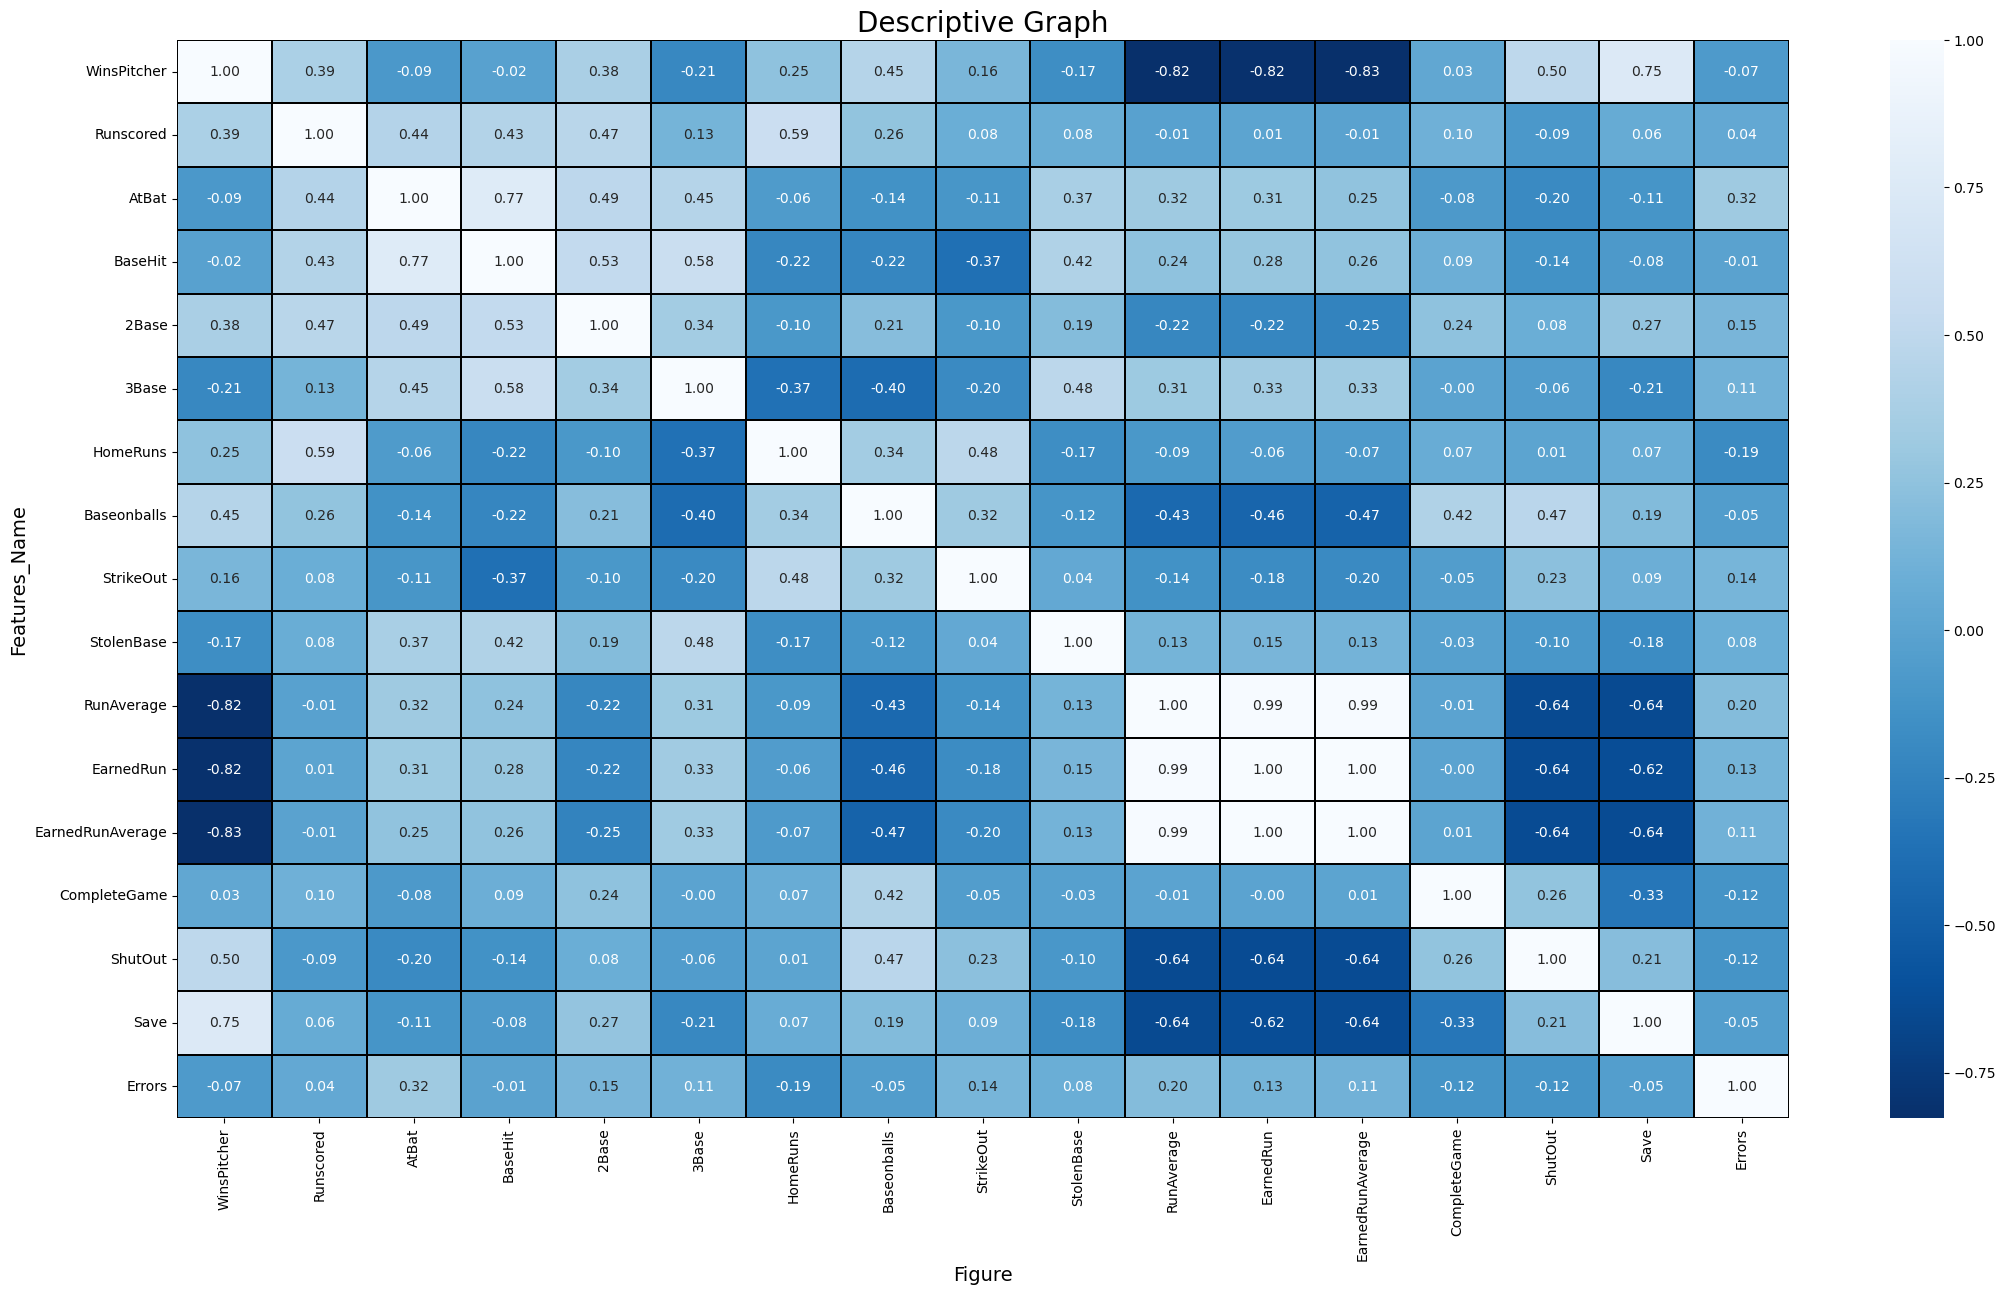

In [49]:
#Visualizing the correlation marix by using  heatmap

plt.figure(figsize=(26,14))
sns.heatmap(cor,annot=True,fmt="0.2f",linewidth = 0.2,linecolor="black", cmap="Blues_r")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

0 - no relation,0.3 to +0.3 less corelation, greater thab -0.5 to +0.5 moderate corelation, greater than -0.7 to +0.7 is high correlation

In [50]:
cor["WinsPitcher"].sort_values(ascending=False)

WinsPitcher         1.000000
Save                0.749290
ShutOut             0.497526
Baseonballs         0.447513
Runscored           0.390451
2Base               0.384886
HomeRuns            0.245697
StrikeOut           0.156469
CompleteGame        0.029594
BaseHit            -0.018360
Errors             -0.072858
AtBat              -0.085780
StolenBase         -0.169503
3Base              -0.206737
EarnedRun          -0.815308
RunAverage         -0.823176
EarnedRunAverage   -0.826952
Name: WinsPitcher, dtype: float64

# Visualizing the correlation between label and features using bar plot

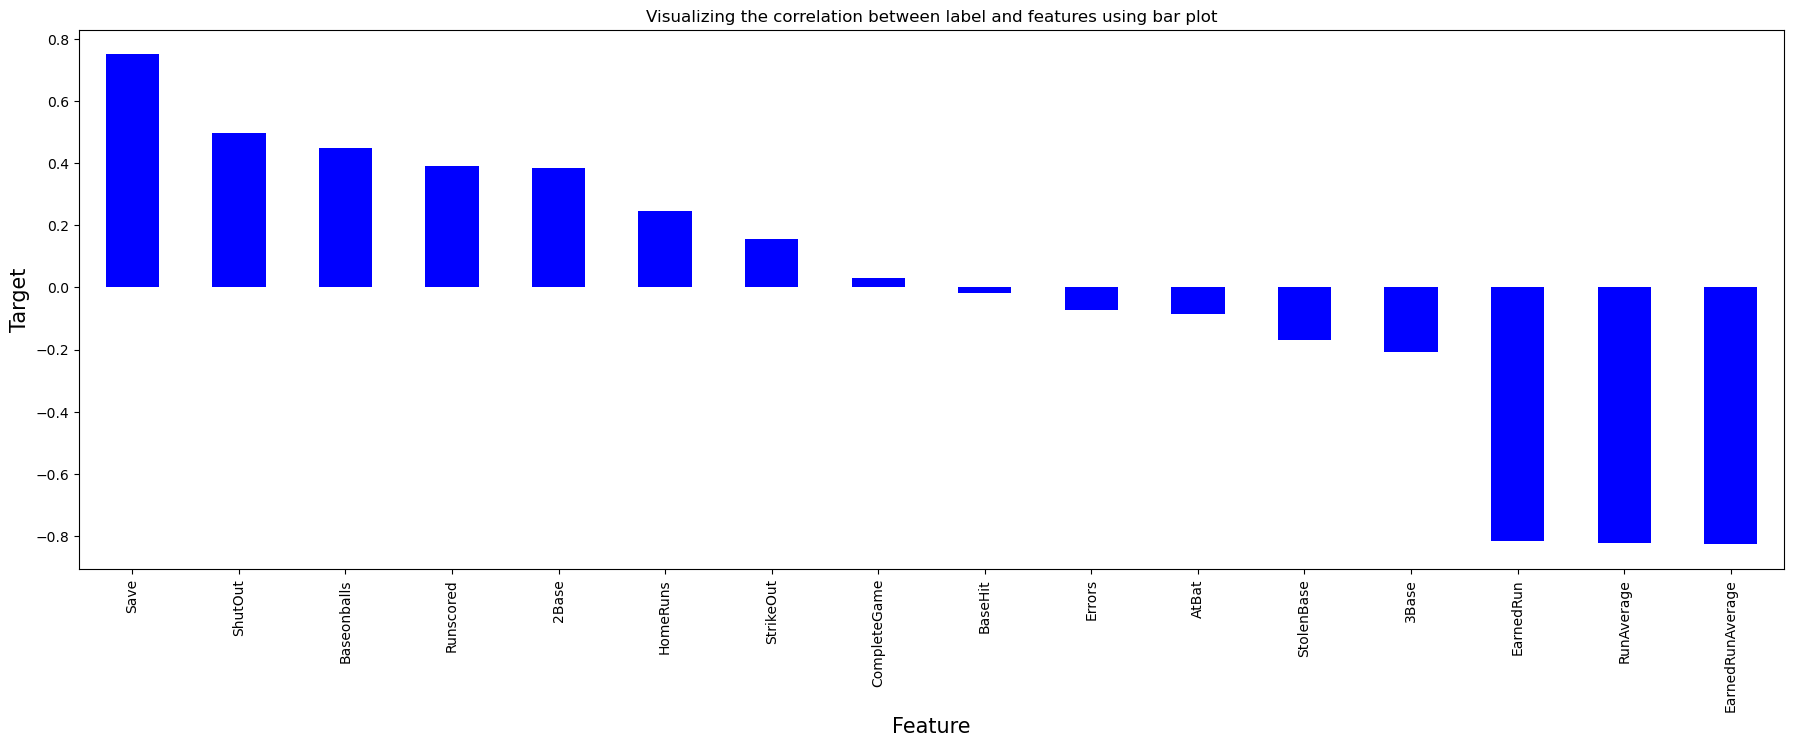

In [51]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
cor["WinsPitcher"].sort_values(ascending=False).drop(["WinsPitcher"]).plot(kind='bar',color='b')
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Visualizing the correlation between label and features using bar plot")
plt.show()


Observation Save, ShoutOut, Baseballs, Runscored, 2Base, HomeRuns, StrikeOut has +ve corelation with target other has -ve corelation

# Separating features and label

In [52]:
x= df1.iloc[:,1:17]
y=df1.iloc[:,0]

In [53]:
x

Runscored  AtBat  BaseHit  2Base  3Base  HomeRuns  Baseonballs  StrikeOut  \
0         724   5575     1497    300     42       139          383        973   
1         696   5467     1349    277     44       156          439       1264   
2         669   5439     1395    303     29       141          533       1157   
3         622   5533     1381    260     27       136          404       1231   
4         689   5605     1515    289     49       151          455       1259   
6         764   5567     1397    272     19       212          554       1227   
7         713   5485     1370    246     20       217          418       1331   
8         644   5485     1383    278     32       167          436       1310   
9         748   5640     1495    294     33       161          478       1148   
10        751   5511     1419    279     32       172          503       1233   
11        729   5459     1363    278     26       230          486       1392   
12        661   5417     1331    243     21       176          435       1150   
13        656   5544     1379    262     22       198          478       1336   
14        694   5600     1405    277     46       146          475       1119   
15        647   5484     1386    288     39       137          506       1267   
16        697   5631     1462    292     27       140          461       1322   
17        689   5491     1341    272     30       171          567       1518   
18        655   5480     1378    274     34       145          412       1299   
19        640   5571     1382    257     27       167          496       1255   
20        683   5527     1351    295     17       177          488       1290   
21        703   5428     1363    265     13       177          539       1344   
22        613   5463     1420    236     40       120          375       1150   
23        573   5420     1361    251     18       100          471       1107   
24        626   5529     1374    272     37       130          387       1274   
25        667   5385     1346    263     26       187          563       1258   
26        696   5565     1486    288     39       136          457       1159   
27        720   5649     1494    289     48       154          490       1312   
28        650   5457     1324    260     36       148          426       1327   
29        737   5572     1479    274     49       186          388       1283   

    StolenBase  RunAverage  EarnedRun  EarnedRunAverage  CompleteGame  \
0          104         641        601              3.73             2   
1           70         700        653              4.07             2   
2           86         640        584              3.67            11   
3           68         701        643              3.98             7   
4           83         803        746              4.64             7   
6           63         698        652              4.03             3   
7           44         693        646              4.05             0   
8           87         642        604              3.74             1   
9           71         753        694              4.31             3   
10         101         733        680              4.24             5   
11         121         618        572              3.57             5   
12          52         675        630              3.94             2   
13          69         726        677              4.16             6   
14          78         729        664              4.14             5   
15          69         525        478              2.94             1   
16          98         596        532              3.21             0   
17          95         608        546              3.36             6   
18          84         737        682              4.28             1   
19         134         754        700              4.33             2   
20          51         613        557              3.43             1   
21          57         635        577   

In [54]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: WinsPitcher, dtype: int64

# Checking Variance Inflation Factor(VIF)

In [55]:
# Finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values          Features
0    1684.071804         Runscored
1    4386.435411             AtBat
2    4542.383497           BaseHit
3     874.293076             2Base
4      35.695117             3Base
5     267.423009          HomeRuns
6     260.583556       Baseonballs
7     399.764153         StrikeOut
8      28.928494        StolenBase
9   17975.314054        RunAverage
10  50845.193939         EarnedRun
11  23146.472801  EarnedRunAverage
12      6.207366      CompleteGame
13     30.820866           ShutOut
14    117.346095              Save
15     92.554014            Errors

In [56]:
x.drop(["EarnedRun"],axis=1,inplace=True)
x

Runscored  AtBat  BaseHit  2Base  3Base  HomeRuns  Baseonballs  StrikeOut  \
0         724   5575     1497    300     42       139          383        973   
1         696   5467     1349    277     44       156          439       1264   
2         669   5439     1395    303     29       141          533       1157   
3         622   5533     1381    260     27       136          404       1231   
4         689   5605     1515    289     49       151          455       1259   
6         764   5567     1397    272     19       212          554       1227   
7         713   5485     1370    246     20       217          418       1331   
8         644   5485     1383    278     32       167          436       1310   
9         748   5640     1495    294     33       161          478       1148   
10        751   5511     1419    279     32       172          503       1233   
11        729   5459     1363    278     26       230          486       1392   
12        661   5417     1331    243     21       176          435       1150   
13        656   5544     1379    262     22       198          478       1336   
14        694   5600     1405    277     46       146          475       1119   
15        647   5484     1386    288     39       137          506       1267   
16        697   5631     1462    292     27       140          461       1322   
17        689   5491     1341    272     30       171          567       1518   
18        655   5480     1378    274     34       145          412       1299   
19        640   5571     1382    257     27       167          496       1255   
20        683   5527     1351    295     17       177          488       1290   
21        703   5428     1363    265     13       177          539       1344   
22        613   5463     1420    236     40       120          375       1150   
23        573   5420     1361    251     18       100          471       1107   
24        626   5529     1374    272     37       130          387       1274   
25        667   5385     1346    263     26       187          563       1258   
26        696   5565     1486    288     39       136          457       1159   
27        720   5649     1494    289     48       154          490       1312   
28        650   5457     1324    260     36       148          426       1327   
29        737   5572     1479    274     49       186          388       1283   

    StolenBase  RunAverage  EarnedRunAverage  CompleteGame  ShutOut  Save  \
0          104         641              3.73             2        8    56   
1           70         700              4.07             2       12    45   
2           86         640              3.67            11       10    38   
3           68         701              3.98             7        9    37   
4           83         803              4.64             7       12    35   
6           63         698              4.03             3        4    48   
7           44         693              4.05             0       10    43   
8           87         642              3.74             1       12    60   
9           71         753              4.31             3       10    40   
10         101         733              4.24             5        9    45   
11         121         618              3.57             5       13    39   
12          52         675              3.94             2       12    46   
13          69         726              4.16             6       12    45   
14          78         729              4.14             5       15    28   
15          69         525              2.94             1       15    62   
16          98         596              3.21             0       13    54   
17          95         608              3.36             6       21    48   
18          84         737              4.28             1        7    40   
19         134         754              4.33             2        8    35   
20          51         613       

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values          Features
0   1524.034796         Runscored
1   3866.227846             AtBat
2   3837.698035           BaseHit
3    872.030633             2Base
4     34.688953             3Base
5    189.887960          HomeRuns
6    259.185350       Baseonballs
7    355.180078         StrikeOut
8     27.256806        StolenBase
9   8368.983387        RunAverage
10  6508.282192  EarnedRunAverage
11     6.207194      CompleteGame
12    30.080344           ShutOut
13   100.329726              Save
14    91.496825            Errors

Variance inflation factor isarranged in  high to low as given in Earned run average  RA Run average ERA then Earned run ER, H  Hits ,AB At Bats  

As the dataset is limited we donot drop any columns as all variable are having reference with target variable win

# Feature Preprocessing

In [43]:
#Feature Scaling using Standard Scalarization

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Runscored     AtBat   BaseHit     2Base     3Base  HomeRuns  Baseonballs  \
0    0.959398  0.830084  1.738306  1.556538  1.010845 -0.765863    -1.536359   
1    0.331147 -0.702831 -0.938698  0.201171  1.208917 -0.181389    -0.495021   
2   -0.274666 -1.100253 -0.106656  1.733325 -0.276617 -0.697101     1.252941   
3   -1.329231  0.233951 -0.359886 -0.800621 -0.474688 -0.869006    -1.145857   
4    0.174084  1.255894  2.063888  0.908319  1.704094 -0.353293    -0.197495   
5    1.856900  0.716535 -0.070480 -0.093474 -1.266972  1.743939     1.643442   
6    0.712585 -0.447345 -0.558853 -1.625627 -1.167936  1.915843    -0.885522   
7   -0.835605 -0.447345 -0.323710  0.260100  0.020490  0.196801    -0.550807   
8    1.497899  1.752672  1.702131  1.202964  0.119526 -0.009484     0.230197   
9    1.565212 -0.078310  0.327453  0.319029  0.020490  0.368705     0.695081   
10   1.071586 -0.816380 -0.685468  0.260100 -0.573723  2.362794     0.378960   
11  -0.454167 -1.412514 -1.264279 -1.802414 -1.068901  0.506228    -0.569402   
12  -0.566355  0.390081 -0.396062 -0.682763 -0.969865  1.262607     0.230197   
13   0.286272  1.184926  0.074223  0.201171  1.406988 -0.525197     0.174411   
14  -0.768292 -0.461539 -0.269447  0.849390  0.713739 -0.834625     0.750867   
15   0.353585  1.624929  1.105231  1.085106 -0.474688 -0.731482    -0.085923   
16   0.174084 -0.362183 -1.083401 -0.093474 -0.177581  0.334324     1.885182   
17  -0.588792 -0.518313 -0.414150  0.024384  0.218561 -0.559578    -0.997094   
18  -0.925355  0.773310 -0.341798 -0.977408 -0.474688  0.196801     0.564913   
19   0.039459  0.148789 -0.902522  1.261893 -1.465043  0.540609     0.416151   
20   0.488210 -1.256383 -0.685468 -0.505976 -1.861185  0.540609     1.364512   
21  -1.531169 -0.759605  0.345541 -2.214917  0.812774 -1.419099    -1.685122   
22  -2.428670 -1.369933 -0.721643 -1.330982 -1.366007 -2.106716     0.100030   
23  -1.239481  0.177176 -0.486501 -0.093474  0.515668 -1.075291    -1.461978   
24  -0.319542 -1.866711 -0.992961 -0.623834 -0.573723  0.884418     1.810800   
25   0.331147  0.688148  1.539340  0.849390  0.713739 -0.869006    -0.160305   
26   0.869648  1.880415  1.684043  0.908319  1.605059 -0.250150     0.453341   
27  -0.700980 -0.844767 -1.390895 -0.800621  0.416632 -0.456435    -0.736760   
28   1.251086  0.787503  1.412725  0.024384  1.704094  0.850037    -1.443382   

    StrikeOut  StolenBase  RunAverage  EarnedRunAverage  CompleteGame  \
0   -2.727623    0.905953   -0.664514         -0.511388     -0.501486   
1    0.121896   -0.585315    0.154638          0.238952     -0.501486   
2   -0.925866    0.116458   -0.678397         -0.643801      2.854612   
3   -0.201246   -0.673037    0.168522          0.040333      1.363013   
4    0.072935   -0.015124    1.584683          1.496876      1.363013   
5   -0.240414   -0.892341    0.126870          0.150677     -0.128586   
6    0.777970   -1.725697    0.057451          0.194815     -1.247285   
7    0.572335    0.160319   -0.650630         -0.489319     -0.874386   
8   -1.013995   -0.541454    0.890486          0.768604     -0.128586   
9   -0.181661    0.774370    0.612808          0.614123      0.617213   
10   1.375292    1.651587   -0.983844         -0.864490      0.617213   
11  -0.994411   -1.374810   -0.192460         -0.047943     -0.501486   
12   0.826931   -0.629176    0.515620          0.437572      0.990113   
13  -1.297968   -0.234429    0.557272          0.393434      0.617213   
14   0.151272   -0.629176   -2.275049         -2.254827     -0.874386   
15   0.689841    0.642788   -1.289290         -1.658968     -1.247285   
16   2.609104    0.511205   -1.122683         -1.327935      0.990113   
17   0.464621    0.028736    0.668344          0.702398     -0.874386   
18   0.033766    2.221778    0.904370          0.812742     -0.501486   
19   0.376492   -1.418671   -1.053264         -1.173453     -0.874386   
20   0.905268   -1.155506   -0.747817         -0.754146      0.244314 

# Modelling Training

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

In [61]:
# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Extra Tree', ExtraTreesRegressor()),
    ('Bagging', BaggingRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ("svr", SVR())]

# Variables to store the best results
best_random_states = []
best_accuracies = []

# Evaluate each model
for model_name, model in models:
    maxAcc = 0
    maxRs = 0
    for i in range(1, 100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        acc = r2_score(y_test, pred)
        if acc > maxAcc:
            maxAcc = acc
            maxRs = i
    best_random_states.append((model_name, maxRs))
    best_accuracies.append((model_name, maxAcc))
    print("Max r2 score for ",model_name, "is:", maxAcc, "on Random State", maxRs)

# Print summary of results
print("\nSummary of best random states and accuracies for each model:")
for i in range(len(models)):
    model_name = models[i][0]
    print("Maximum r2 score is", best_accuracies[i][1], "on Random_state", best_random_states[i][1])


Max r2 score for Linear Regression is: 0.9441099619422767 on Random State 3
Max r2 score for Gradient Boosting is: 0.9276338460402324 on Random State 11
Max r2 score for Random Forest is: 0.837358178963893 on Random State 4
Max r2 score for Lasso is: 0.9615863647970094 on Random State 82
Max r2 score for Ridge is: 0.9673386376128246 on Random State 75
Max r2 score for Decision Tree is: 0.8591931730023274 on Random State 30
Max r2 score for KNN is: 0.7518676122931442 on Random State 57
Max r2 score for Extra Tree is: 0.8813409105180532 on Random State 4
Max r2 score for Bagging is: 0.9028871630881682 on Random State 46
Max r2 score for AdaBoost is: 0.8022267899965743 on Random State 75
Max r2 score for svr is: 0.22527803752449582 on Random State 54

Summary of best random states and accuracies for each model:
Maximum r2 score is 0.9441099619422767 on Random_state 3
Maximum r2 score is 0.9276338460402324 on Random_state 11
Maximum r2 score is 0.837358178963893 on Random_state 4
Maximum r

# a) Linear Regression

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=3)

In [63]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_lr))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_score:  0.9441099619422767
R2 score on training data:  0.9367619600027088
Mean Absolute Error:  2.5955268352132825
Mean Squared Error:  9.58824652901387
Root Mean Squared Error:  3.0964893878413133


In [64]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_lr)-(score.mean()))*100)

[ 0.73056558 -0.75692765  0.66920854  0.23185557 -0.4912745 ]
0.07668550883239164
Difference between R2 Score and Cross Validation Score:  86.7424453109885


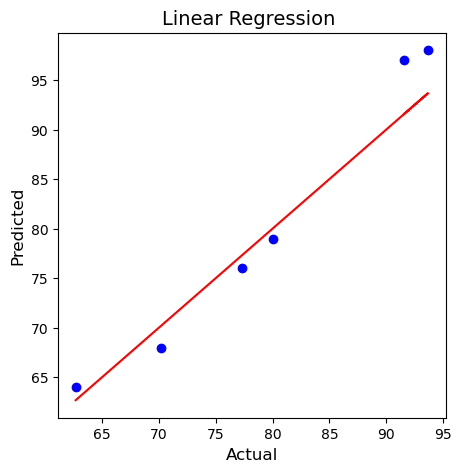

In [65]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_lr, y= y_test, color = 'b')
plt.plot(pred_lr,pred_lr,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Linear Regression ', fontsize = 14)
plt.show() 

# b) Gradient Boosting Regressor  

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=11)

In [69]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
pred_train = gbr.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_gbr))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_score:  0.9040627092181176
R2 score on training data:  0.999999949669274
Mean Absolute Error:  1.969985506309662
Mean Squared Error:  5.16195922901406
Root Mean Squared Error:  2.2719945486321174


In [70]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_gbr)-(score.mean()))*100) 

[ 0.10004753 -8.67071566  0.52709474  0.61992157  0.74426692]
-1.3358769793498984
Difference between R2 Score and Cross Validation Score:  223.99396885680162


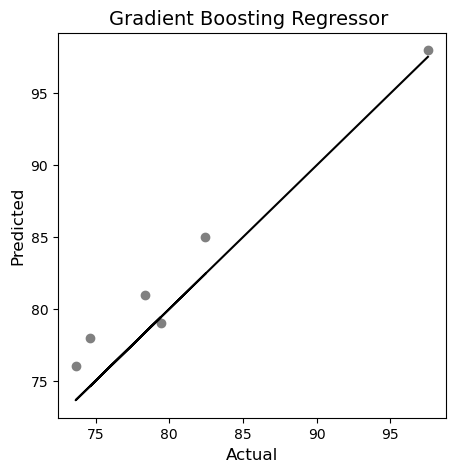

In [71]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_gbr, y= y_test, color = 'grey')
plt.plot(pred_gbr,pred_gbr,color='black')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Gradient Boosting Regressor ', fontsize = 14)
plt.show()

# c) Random Forest Regressor

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=4)

In [75]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_RFR))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:  0.7807081946624805
R2 score on training data:  0.9219700549152787
Mean Absolute Error:  3.633333333333333
Mean Squared Error:  19.401233333333323
Root Mean Squared Error:  4.404683113838421


In [76]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_RFR)-(score.mean()))*100)

[ 0.30398261 -4.8074      0.45157917  0.48318754  0.95261232]
-0.5232076700744435
Difference between R2 Score and Cross Validation Score:  130.3915864736924


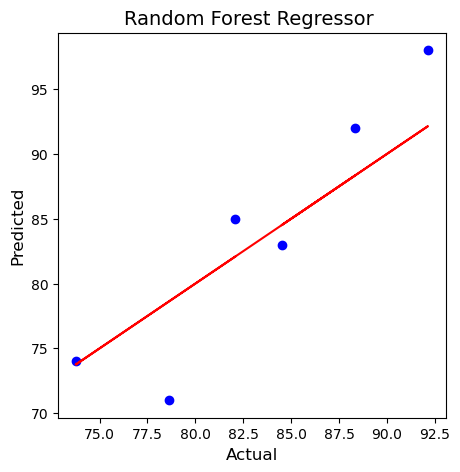

In [77]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_RFR, y= y_test, color = 'b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Random Forest Regressor ', fontsize = 14)
plt.show()

# d) Lasso Regression

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=82)

In [79]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_lasso))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score:  0.9615863647970094
R2 score on training data:  0.8720194352785824
Mean Absolute Error:  1.497152805018338
Mean Squared Error:  2.80953059692984
Root Mean Squared Error:  1.6761654443788776


In [80]:
score = cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_lasso)-(score.mean()))*100)

[ 0.747097   -1.06631408  0.74048566  0.78190142  0.8772403 ]
0.41608205922244307
Difference between R2 Score and Cross Validation Score:  54.55043055745663


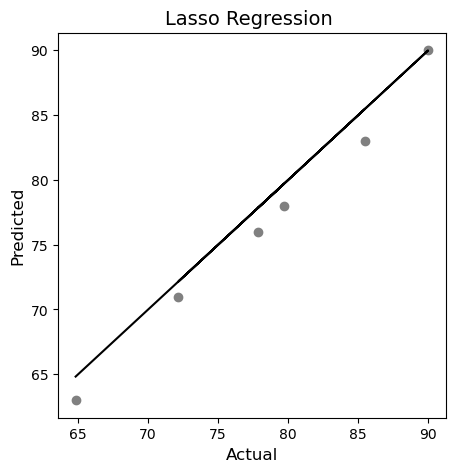

In [81]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_lasso, y= y_test, color = 'grey')
plt.plot(pred_lasso,pred_lasso,color='black')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Lasso Regression ', fontsize = 14)
plt.show()

# e) Ridge Regression

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=75)

In [83]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_rd))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score:  0.9673386376128246
R2 score on training data:  0.9145449665456711
Mean Absolute Error:  1.8371559398883808
Mean Squared Error:  4.413820222600228
Root Mean Squared Error:  2.100909379911525


In [84]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_rd)-(score.mean()))*100)

[ 0.59724763 -1.34676973  0.6636984   0.89350045  0.85095229]
0.331725805282529
Difference between R2 Score and Cross Validation Score:  63.56128323302956


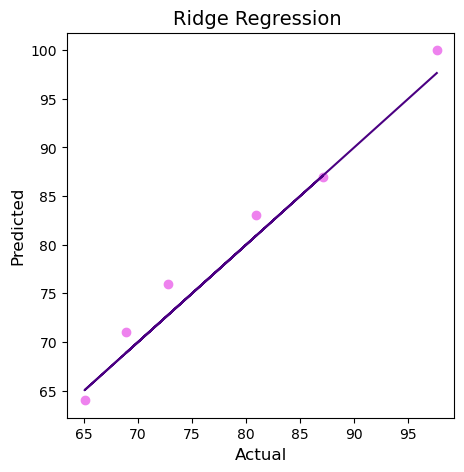

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_rd, y= y_test, color = 'violet')
plt.plot(pred_rd,pred_rd,color='indigo')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Ridge Regression ', fontsize = 14)
plt.show()

# f)Decision Tree Regressor

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30)

In [87]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_dtr))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score:  0.7114041892940264
R2 score on training data:  1.0
Mean Absolute Error:  6.333333333333333
Mean Squared Error:  41.333333333333336
Root Mean Squared Error:  6.429100507328637


In [88]:
score = cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_dtr)-(score.mean()))*100)

[ -1.71022727 -11.61842105   0.36930155   0.21967213   0.46639151]
-2.4546566274615342
Difference between R2 Score and Cross Validation Score:  316.6060816755561


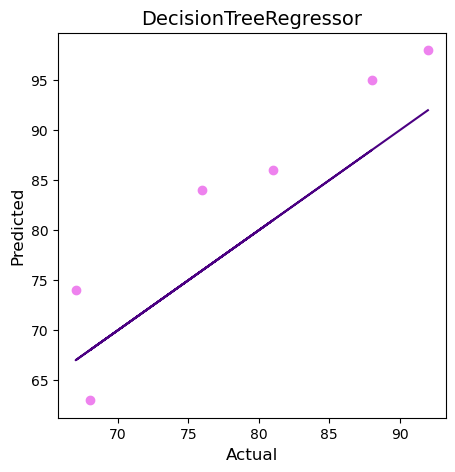

In [89]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_dtr, y= y_test, color = 'violet')
plt.plot(pred_dtr,pred_dtr,color='indigo')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('DecisionTreeRegressor', fontsize = 14)
plt.show()

# g) Kneighbour Regressor

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=57)

In [96]:
KNN = knn()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_KNN))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score:  0.7518676122931442
R2 score on training data:  0.6223775320797353
Mean Absolute Error:  4.8666666666666645
Mean Squared Error:  34.98666666666666
Root Mean Squared Error:  5.914952803418355


In [97]:
score = cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_KNN)-(score.mean()))*100)

[ 0.24045455 -1.62684211  0.39887913  0.27718033  0.7692217 ]
0.011778719248910075
Difference between R2 Score and Cross Validation Score:  74.00888930442342


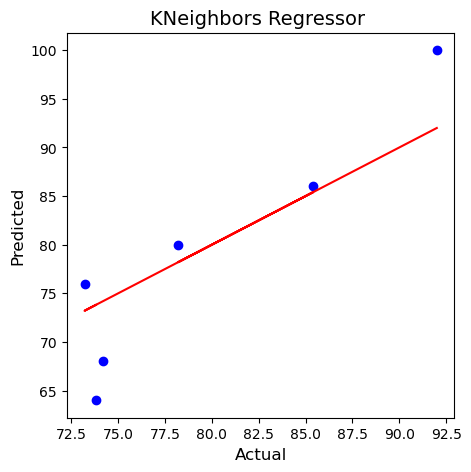

In [98]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_KNN, y= y_test, color = 'b')
plt.plot(pred_KNN,pred_KNN,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('KNeighbors Regressor ', fontsize = 14)
plt.show()

# h) Extra Trees Regressor

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=4)

In [100]:
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
pred_ET= ET.predict(x_test)
pred_train=ET.predict(x_train)
print("R2_score:",r2_score(y_test,pred_ET))
print("R2 score on Training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ET))
print("Mean Squared Error:",mean_squared_error(y_test,pred_ET))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_ET)))

R2_score: 0.8773373940345367
R2 score on Training data: 100.0
Mean Absolute Error: 3.1033333333333366
Mean Squared Error: 10.852233333333354
Root Mean Squared Error: 3.294272807970426


In [101]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_ET)-(score.mean()))*100)

[ 0.12629705 -4.62548158  0.57579297  0.43483049  0.84155277]
-0.529401659362388
Difference between R2 Score and Cross Validation Score:  140.67390533969245


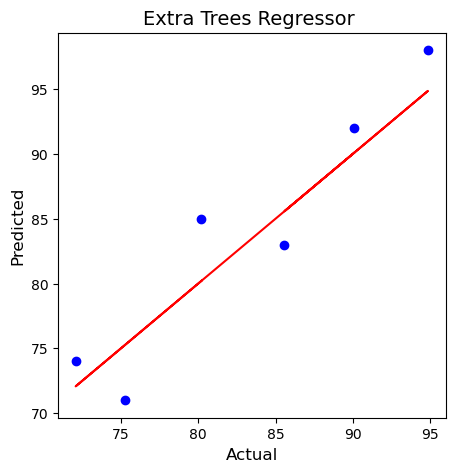

In [102]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_ET, y= y_test, color = 'b')
plt.plot(pred_ET,pred_ET,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Extra Trees Regressor ', fontsize = 14)
plt.show()

# i) Bagging Regressor

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state= 46)

In [112]:
BR=BaggingRegressor()
BR.fit(x_train,y_train)
predBR= BR.predict(x_test)
predtrain=BR.predict(x_train)
print("R2_score:",r2_score(y_test,predBR))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predBR))
print("Mean Squared Error:",mean_squared_error(y_test,predBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predBR)))

R2_score: 0.5715577889447234
R2 score on Training data: 90.52697299423178
Mean Absolute Error: 3.9833333333333343
Mean Squared Error: 26.05166666666668
Root Mean Squared Error: 5.104083332653051


In [113]:
score = cross_val_score(BR,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,predBR)-(score.mean()))*100)

[ 0.04715909 -3.32328947  0.46790464  0.41019672  0.75990566]
-0.3276246717354504
Difference between R2 Score and Cross Validation Score:  89.91824606801738


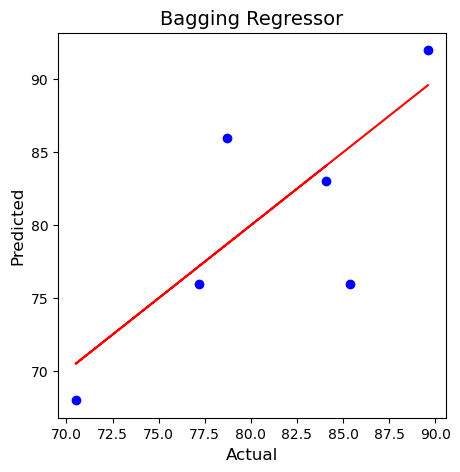

In [114]:
plt.figure(figsize=(5,5))
plt.scatter(x=predBR, y= y_test, color = 'b')
plt.plot(predBR,predBR,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Bagging Regressor', fontsize = 14)
plt.show()

# j)AdaBoost Regressor

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=75)

In [124]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_abr= abr.predict(x_test)
predtrain_abr=abr.predict(x_train)
print("R2_score:",r2_score(y_test,pred_abr))
print("R2 score on Training data:",r2_score(y_train,predtrain_abr)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_abr))
print("Mean Squared Error:",mean_squared_error(y_test,pred_abr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_abr)))

R2_score: 0.7568687906817402
R2 score on Training data: 98.66528373873606
Mean Absolute Error: 4.63888888888889
Mean Squared Error: 32.85648148148149
Root Mean Squared Error: 5.732057351552014


In [125]:
score = cross_val_score(abr,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_abr)-(score.mean()))*100)

[ 0.15151302 -5.55417562  0.39418464  0.39295751  0.8478446 ]
-0.7535351696315838
Difference between R2 Score and Cross Validation Score:  151.04039603133242


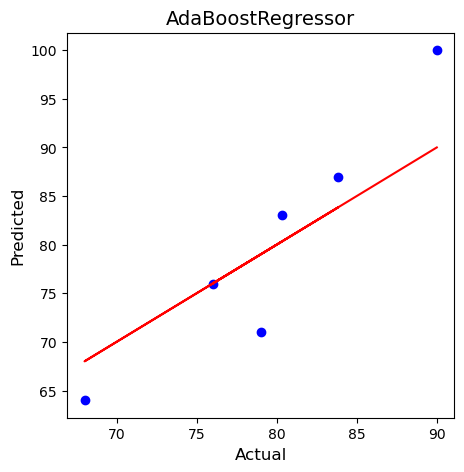

In [126]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_abr, y= y_test, color = 'b')
plt.plot(pred_abr,pred_abr,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('AdaBoostRegressor', fontsize = 14)
plt.show()

Observation: Since the amount of data is very less hence the model is not able to be trained propoerly. As per the data available the best modelling technique would be lasso regression with R2 score 0.96 and difference between R2score and Cross Validation Score as 54.

# Applying Grid Search CV

In [129]:
from sklearn.model_selection import GridSearchCV
param = {'fit_intercept':[True,False],
         'copy_X':[True,False],
         'max_iter':[100,200,500,1000],
         'random_state':[1,4,20],
         'positive':[True,False],
         'selection':['cyclic', 'random']}


In [130]:
GCV=GridSearchCV(Lasso(),param,cv=5)


In [131]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 500, 1000],
                         'positive': [True, False], 'random_state': [1, 4, 20],
                         'selection': ['cyclic', 'random']})

In [132]:
GCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'max_iter': 100,
 'positive': False,
 'random_state': 4,
 'selection': 'random'}

In [133]:
Model = Lasso(copy_X= True,fit_intercept= True,max_iter = 100,positive = False,random_state = 4, selection= 'random')
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('R2 Score: ',r2_score(y_test,pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score:  0.9244175506243812
Mean Absolute Error:  2.697817901090365
Mean Squared Error:  10.214128228121806
Root Mean Squared Error:  3.1959549790511455


In [134]:
import joblib
joblib.dump(Model,'baseball_case_study.pki')

['baseball_case_study.pki']

In [135]:
model = joblib.load('baseball_case_study.pki')
prediction = model.predict(x_test)
prediction

array([80.88579893, 72.71542372, 74.10378356, 85.73263408, 70.38686819,
       97.19316793])

In [136]:
conclusion = pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

In [137]:
conclusion

0          1          2          3          4           5
Predicted  80.885799  72.715424  74.103784  85.732634  70.386868   97.193168
Original   83.000000  71.000000  76.000000  87.000000  64.000000  100.000000